In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os


### fixed variables
VOLUME_PER_IMAGE = 50 * (3.5)**2 * np.pi  # in cubic centimeters
VOLUME_PER_IMAGE_LITERS = VOLUME_PER_IMAGE / 1000  # convert to liters
IMAGE_SIZE = 2560

In [2]:
#get validated profiles

ViT_validated_CTD50_df = pd.read_csv('/home/fanny/Profiles/export__TSV_17668_20250818_1533_CTD-50/ecotaxa_export__TSV_17668_20250818_1533.tsv', sep='\t')
ViT_fully_predicted_df = pd.read_csv('/home/fanny/Profiles/export__TSV_17785_20250818_1537__M181_PISCO2_deconv_fully_ViT_predicted/ecotaxa_export__TSV_17785_20250818_1537.tsv', sep='\t')

ViT_validated_CTD37_df = ViT_fully_predicted_df[ViT_fully_predicted_df['sample_id'] == 'M181-112-1_CTD-037_00Â°00S-008Â°00W_20220504-1758']
ViT_validated_CTD60_df = ViT_fully_predicted_df[ViT_fully_predicted_df['sample_id'] == 'M181-227-1_CTD-060_00Â°00S-027Â°00W_20220512-1748']
ViT_validated_CTD75_df = ViT_fully_predicted_df[ViT_fully_predicted_df['sample_id'] == 'M181-285-1_CTD-075_00Â°00S-039Â°00W_20220517-2024']
ViT_validated_CTD81_df = ViT_fully_predicted_df[ViT_fully_predicted_df['sample_id'] == 'M181-297-1_CTD-081_00Â°00S-041Â°50W_20220519-0218']

df_five_profiles = pd.concat([ViT_validated_CTD50_df, ViT_validated_CTD37_df, ViT_validated_CTD60_df, ViT_validated_CTD75_df, ViT_validated_CTD81_df], ignore_index=True)

/tmp/ipykernel_10906/749648970.py:4: DtypeWarning: Columns (9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  ViT_fully_predicted_df = pd.read_csv('/home/fanny/Profiles/export__TSV_17785_20250818_1537__M181_PISCO2_deconv_fully_ViT_predicted/ecotaxa_export__TSV_17785_20250818_1537.tsv', sep='\t')


In [3]:
#prepare data set
def collect_metadata_csvs(base_folder):
    all_dfs = []
    for profile_folder in os.listdir(base_folder):
        profile_path = os.path.join(base_folder, profile_folder)
        if os.path.isdir(profile_path):
            eco_folder = os.path.join(profile_path, "EcoTaxa")
            if os.path.isdir(eco_folder):
                csv_filename_1 = f"{profile_folder}_crops_metadata.csv"
                csv_filename_2 = f"{profile_folder}_crops_metadata_ET.csv"
                csv_path_1 = os.path.join(eco_folder, csv_filename_1)
                csv_path_2 = os.path.join(eco_folder, csv_filename_2)

                if os.path.isfile(csv_path_1):
                    csv_path = csv_path_1
                elif os.path.isfile(csv_path_2):
                    csv_path = csv_path_2
                else:
                    print(f"Warning: File not found: {csv_path_1} or {csv_path_2}")
                    continue

                df = pd.read_csv(csv_path)
                # Check if the second row is a type marker row
                if len(df) > 1:
                    type_row = df.iloc[1]
                    if type_row.apply(lambda x: str(x).strip() in ['[t]', '[f]', '[other]']).all():
                        df = df.drop(index=1).reset_index(drop=True)
                #df['profile_folder'] = profile_folder  # Optionally add profile info
                all_dfs.append(df)
            else:
                print(f"Warning: File not found: {csv_path}")
    if all_dfs:
        combined_df = pd.concat(all_dfs, ignore_index=True)
    else:
        combined_df = pd.DataFrame()
    return combined_df


base_folder = "/home/fanny/M181_Predictions/M181"
M181_combined_df = collect_metadata_csvs(base_folder)
print(f"Combined metadata shape: {M181_combined_df.shape}")


/tmp/ipykernel_10906/4165931647.py:22: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,43,44,45,46,47,49,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)
/tmp/ipykernel_10906/4165931647.py:22: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,43,44,45,46,47,49,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)
/tmp/ipykernel_10906/4165931647.py:22: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,43,44,45,46,47,49,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)
/tmp/ipykernel_10906/4165931647.py:22: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18

Combined metadata shape: (3296606, 85)


In [4]:
# Update object_annotation_status in M181_combined_df using validated object_ids from df_five_profiles
validated_ids = df_five_profiles[df_five_profiles['object_annotation_status'] == 'validated']['object_id'].unique()
M181_combined_df.loc[
    M181_combined_df['object_id'].isin(validated_ids),
    'object_annotation_status'
] = 'validated'
print(f"Updated {len(validated_ids)} objects to 'validated' in M181_combined_df.")

Updated 33181 objects to 'validated' in M181_combined_df.


In [5]:
def extract_core_id(sample_id):
    # Extracts 'M181-xxx-x_CTD-xxx' from sample_id
    try:
        parts = sample_id.split('_')
        if len(parts) >= 2:
            return f"{parts[0]}_{parts[1]}"
        else:
            return None  # or np.nan
    except Exception as e:
        print(f"Error extracting core_id from: {sample_id} ({e})")
        return None


# Apply to both DataFrames
M181_combined_df['core_id'] = M181_combined_df['sample_id'].apply(extract_core_id)
df_five_profiles['core_id'] = df_five_profiles['sample_id'].apply(extract_core_id)

validated_core_ids = df_five_profiles['core_id'].unique()
print(f"Validated core IDs: {validated_core_ids}")

M181_5validated_profiles_df = M181_combined_df[
    M181_combined_df['core_id'].isin(validated_core_ids)
].copy()
print(f"Validated 5 profiles core_ids: {M181_5validated_profiles_df['core_id'].unique()}")

M181_nonvalidated_profiles_df = M181_combined_df[
    ~M181_combined_df['core_id'].isin(validated_core_ids)
].copy()
print(f"Non-validated profiles core_ids: {M181_nonvalidated_profiles_df['core_id'].unique()}")

print(f"Validated 5 profiles shape: {M181_5validated_profiles_df.shape}")
print(f"Non-validated profiles shape: {M181_nonvalidated_profiles_df.shape}")



Validated core IDs: ['M181-175-1_CTD-050' 'M181-112-1_CTD-037' 'M181-227-1_CTD-060'
 'M181-285-1_CTD-075' 'M181-297-1_CTD-081']
Validated 5 profiles core_ids: ['M181-112-1_CTD-037' 'M181-285-1_CTD-075' 'M181-227-1_CTD-060'
 'M181-297-1_CTD-081' 'M181-175-1_CTD-050']
Non-validated profiles core_ids: ['M181-276-1_CTD-072' 'M181-287-1_CTD-076' None 'M181-117-1_CTD-038'
 'M181-153-1_CTD-045' 'M181-261-1_CTD-068' 'M181-131-1_CTD-041'
 'M181-194-1_CTD-054' 'M181-294-1_CTD-079' 'M181-165-1_CTD-048'
 'M181-290-1_CTD-078' 'M181-126-1_CTD-040' 'M181-281-1_CTD-073'
 'M181-140-1_CTD-043' 'M181-220-1_CTD-059' 'M181-170-1_CTD-049'
 'M181-272-1_CTD-071' 'M181-146-1_CTD-044' 'M181-124-1_CTD-039'
 'M181-267-1_CTD-070' 'M181-189-1_CTD-053' 'M181-295-1_CTD-080'
 'M181-288-1_CTD-077' 'M181-265-1_CTD-069' 'M181-181-1_CTD-051'
 'M181-216-1_CTD-058' 'M181-283-1_CTD-074' 'M181-252-1_CTD-066'
 'M181-255-1_CTD-067' 'M181-245-1_CTD-065' 'M181-107-1_CTD-036'
 'M181-204-1_CTD-056' 'M181-134-1_CTD-042' 'M181-238-1_

In [6]:
#save dataset
M181_5validated_profiles_df.to_csv("/home/fanny/Profiles/datasets/M181_5validated_profiles.csv", index=False)
M181_nonvalidated_profiles_df.to_csv("/home/fanny/Profiles/datasets/M181_nonvalidated_profiles.csv", index=False)

float64
Number of NaNs after conversion: 0
Analyzing 13 classes (excluded: ['not-living'])
Classes to analyze: ['Chaetognatha', 'Copepoda', 'Pyrocystis', 'Appendicularia', 'Noctiluca', 'Rhizaria', 'Trichodesmium', 'Bacillariophyceae', 'Cnidaria', 'Thaliacea', 'Eumalacostraca', 'Asteroidea larvae', 'Ctenophora']


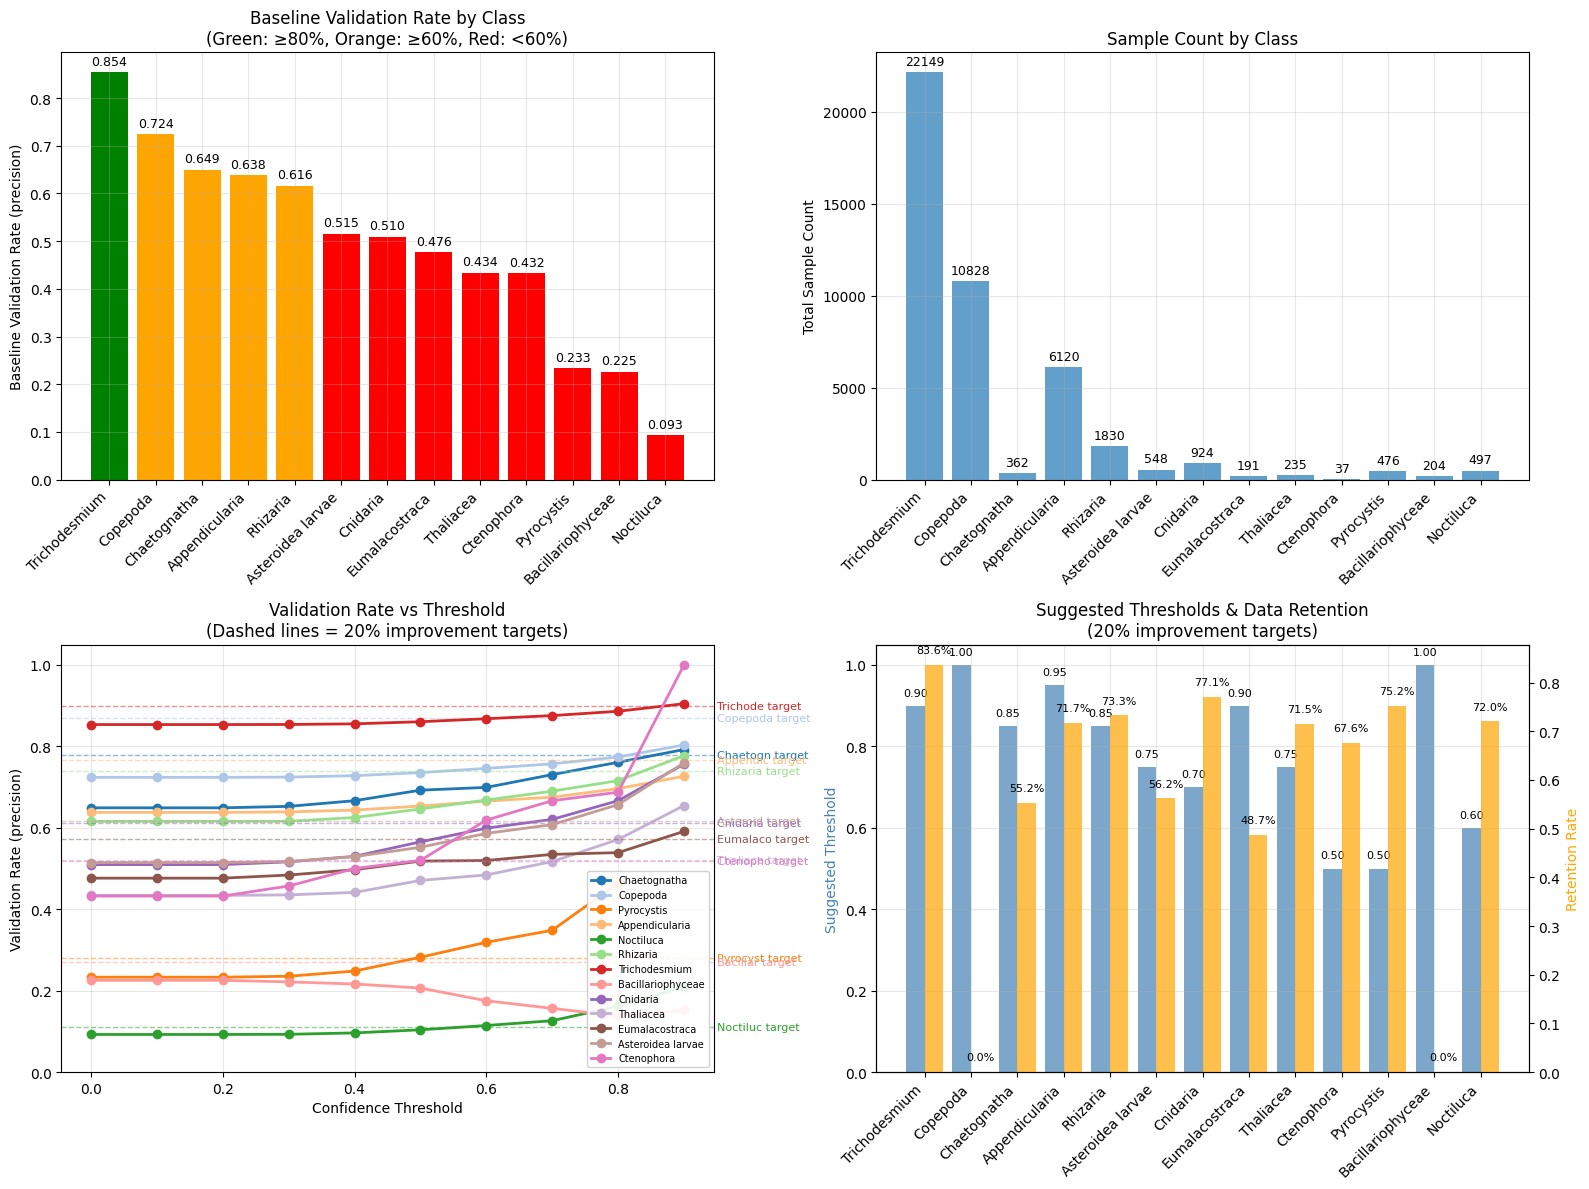


THRESHOLD SELECTION SUMMARY
Class           Baseline  Target    Threshold  Achieved  Retained  Retention 
----------------------------------------------------------------------------------------------------
Trichodesmium   0.854     0.900     0.90       0.905     18518     83.6%    
Copepoda        0.724     0.869     1.00       0.000     0         0.0%     
Chaetognatha    0.649     0.779     0.85       0.785     200       55.2%    
Appendicularia  0.638     0.766     0.95       0.773     4387      71.7%    
Rhizaria        0.616     0.739     0.85       0.743     1341      73.3%    
Asteroidea larvae 0.515     0.618     0.75       0.633     308       56.2%    
Cnidaria        0.510     0.612     0.70       0.621     712       77.1%    
Eumalacostraca  0.476     0.572     0.90       0.591     93        48.7%    
Thaliacea       0.434     0.521     0.75       0.536     168       71.5%    
Ctenophora      0.432     0.519     0.50       0.520     25        67.6%    
Pyrocystis      0.23

In [12]:
def calculate_baseline_rates(df, confidence_col='object_prob_1'):
    """Calculate baseline validation rate for each class (at threshold 0)"""
    baseline_rates = {}
    
    for cls in df['object_annotation_category'].unique():
        class_data = df[df['object_annotation_category'] == cls]
        total = len(class_data)
        validated = (class_data['object_annotation_status'] == 'validated').sum()
        baseline_rate = validated / total if total > 0 else 0
        baseline_rates[cls] = baseline_rate
        
    return baseline_rates

def find_improvement_threshold(df, class_name, improvement_factor=1.2, confidence_col='object_prob_1'):
    """Find threshold where validation rate improves by improvement_factor over baseline"""
    baseline_rates = calculate_baseline_rates(df, confidence_col)
    target_rate = min(0.9, baseline_rates[class_name] * improvement_factor)  # Cap at 95%
    
    thresholds = np.arange(0, 1.01, 0.05)
    
    for thresh in sorted(thresholds):
        filtered = df[(df['object_annotation_category'] == class_name) & 
                     (df[confidence_col] >= thresh)]
        
        if len(filtered) == 0:
            continue
            
        validation_rate = (filtered['object_annotation_status'] == 'validated').sum() / len(filtered)
        
        if validation_rate >= target_rate:
            return thresh, validation_rate, len(filtered), target_rate
    
    return 1.0, 0.0, 0, target_rate

def plot_interactive_threshold_analysis(df, confidence_col='object_prob_1', exclude_classes=['not-living']): #merge_copepods=False)
    """Create comprehensive analysis plots for threshold selection"""
    #combine classes oithona and calanoida with copepoda if merge_copepods is True
    # if merge_copepods:
    #     print("Merging copepod classes: Oithona and Calanoida → Copepoda")
    #     df_working = df.copy()
    #     df_working['object_annotation_category'] = df_working['object_annotation_category'].replace({
    #         'Oithona': 'Copepoda',
    #         'Calanoida': 'Copepoda'
    #     })
    # else:
    #     df_working = df
    df_working = df

    all_classes = df_working['object_annotation_category'].unique()
    classes = [cls for cls in all_classes if cls not in exclude_classes]
    
    print(f"Analyzing {len(classes)} classes (excluded: {exclude_classes})")
    print(f"Classes to analyze: {classes}")
    
    baseline_rates = calculate_baseline_rates(df_working, confidence_col)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot 1: Baseline rates comparison (excluding not-living)
    sorted_classes = sorted(classes, key=lambda x: baseline_rates[x], reverse=True)
    baseline_values = [baseline_rates[cls] for cls in sorted_classes]
    
    bars = axes[0,0].bar(range(len(sorted_classes)), baseline_values, 
                         color=['green' if r >= 0.8 else 'orange' if r >= 0.6 else 'red' for r in baseline_values])
    axes[0,0].set_xticks(range(len(sorted_classes)))
    axes[0,0].set_xticklabels(sorted_classes, rotation=45, ha='right')
    axes[0,0].set_ylabel('Baseline Validation Rate (precision)')
    axes[0,0].set_title('Baseline Validation Rate by Class\n(Green: ≥80%, Orange: ≥60%, Red: <60%)')
    axes[0,0].grid(True, alpha=0.3)
    
    # Add value labels on bars
    for i, (cls, rate) in enumerate(zip(sorted_classes, baseline_values)):
        axes[0,0].text(i, rate + 0.01, f'{rate:.3f}', ha='center', va='bottom', fontsize=9)
    
    # Plot 2: Sample counts (excluding not-living)
    counts = [len(df_working[df_working['object_annotation_category'] == cls]) for cls in sorted_classes]
    axes[0,1].bar(range(len(sorted_classes)), counts, alpha=0.7)
    axes[0,1].set_xticks(range(len(sorted_classes)))
    axes[0,1].set_xticklabels(sorted_classes, rotation=45, ha='right')
    axes[0,1].set_ylabel('Total Sample Count')
    axes[0,1].set_title('Sample Count by Class')
    axes[0,1].grid(True, alpha=0.3)
    
    # Add count labels
    for i, count in enumerate(counts):
        axes[0,1].text(i, count + max(counts)*0.01, str(count), ha='center', va='bottom', fontsize=9)
    
    # Plot 3: Your existing precision curves with improvement targets (excluding not-living)
    thresholds = np.arange(0, 1.01, 0.1)
    cmap = plt.get_cmap('tab20')
    
    for idx, cls in enumerate(classes):
        precisions = []
        counts_at_thresh = []
        for thresh in thresholds:
            filtered = df_working[(df_working['object_annotation_category'] == cls) & (df_working[confidence_col] >= thresh)]
            total_predictions = len(filtered)
            true_positives = (filtered['object_annotation_status'] == 'validated').sum()
            counts_at_thresh.append(total_predictions)
            if total_predictions > 0:
                precisions.append(true_positives / total_predictions)
            else:
                precisions.append(np.nan)
        
        color = cmap(idx % cmap.N)
        axes[1,0].plot(thresholds, precisions, marker='o', label=cls, color=color, linewidth=2)
        
        # Add horizontal line at 20% improvement target
        improvement_target = min(0.9, baseline_rates[cls] * 1.2)
        axes[1,0].axhline(y=improvement_target, color=color, 
                         linestyle='--', alpha=0.5, linewidth=1)
        
        # Add text annotation for target
        axes[1,0].text(0.95, improvement_target, f'{cls[:8]} target', 
                      color=color, fontsize=8, va='center')
    
    axes[1,0].set_xlabel('Confidence Threshold')
    axes[1,0].set_ylabel('Validation Rate (precision)')
    axes[1,0].set_title('Validation Rate vs Threshold\n(Dashed lines = 20% improvement targets)')
    #axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    axes[1,0].legend(loc='lower right', fontsize=7, framealpha=0.9)

    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].set_ylim(0, 1.05)
    
    # Plot 4: Suggested thresholds and their effects (excluding not-living)
    suggested_data = []
    for cls in sorted_classes:
        thresh, rate, count, target = find_improvement_threshold(df_working, cls, 1.2, confidence_col)
        total_samples = len(df_working[df_working['object_annotation_category'] == cls])
        retention = count / total_samples if total_samples > 0 else 0
        suggested_data.append({
            'class': cls,
            'threshold': thresh,
            'achieved_rate': rate,
            'retention': retention,
            'retained_count': count,
            'total_count': total_samples
        })
    
    # Bar plot of suggested thresholds
    thresholds_vals = [d['threshold'] for d in suggested_data]
    retention_vals = [d['retention'] for d in suggested_data]
    
    ax4_twin = axes[1,1].twinx()
    
    bars1 = axes[1,1].bar([i-0.2 for i in range(len(sorted_classes))], thresholds_vals, 
                         width=0.4, label='Suggested Threshold', alpha=0.7, color='steelblue')
    bars2 = ax4_twin.bar([i+0.2 for i in range(len(sorted_classes))], retention_vals, 
                        width=0.4, label='Data Retention Rate', alpha=0.7, color='orange')
    
    axes[1,1].set_xticks(range(len(sorted_classes)))
    axes[1,1].set_xticklabels(sorted_classes, rotation=45, ha='right')
    axes[1,1].set_ylabel('Suggested Threshold', color='steelblue')
    ax4_twin.set_ylabel('Retention Rate', color='orange')
    axes[1,1].set_title('Suggested Thresholds & Data Retention\n(20% improvement targets)')
    
    # Add value labels
    for i, (thresh, ret) in enumerate(zip(thresholds_vals, retention_vals)):
        axes[1,1].text(i-0.2, thresh + 0.02, f'{thresh:.2f}', ha='center', va='bottom', fontsize=8)
        ax4_twin.text(i+0.2, ret + 0.02, f'{ret:.1%}', ha='center', va='bottom', fontsize=8)
    
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed summary table (excluding not-living)
    print("\n" + "="*100)
    print("THRESHOLD SELECTION SUMMARY")
    print("="*100)
    print(f"{'Class':<15} {'Baseline':<9} {'Target':<9} {'Threshold':<10} {'Achieved':<9} {'Retained':<9} {'Retention':<10}")
    print("-" * 100)
    
    for data in suggested_data:
        baseline = baseline_rates[data['class']]
        target_rate = min(0.9, baseline * 1.2)
        print(f"{data['class']:<15} {baseline:<9.3f} {target_rate:<9.3f} {data['threshold']:<10.2f} "
              f"{data['achieved_rate']:<9.3f} {data['retained_count']:<9d} {data['retention']:<9.1%}")
    
    print("\n" + "="*100)
    print("THRESHOLD RECOMMENDATIONS:")
    print("="*100)
    
    # Group classes by quality tiers
    high_quality = [d for d in suggested_data if baseline_rates[d['class']] >= 0.8]
    medium_quality = [d for d in suggested_data if 0.6 <= baseline_rates[d['class']] < 0.8]
    low_quality = [d for d in suggested_data if baseline_rates[d['class']] < 0.6]
    
    if high_quality:
        print("\nHIGH QUALITY CLASSES (baseline ≥ 80%):")
        print("Recommendation: Use moderate thresholds (0.5-0.8) to maintain high validation rates")
        for d in high_quality:
            print(f"  {d['class']}: threshold {d['threshold']:.2f} → {d['achieved_rate']:.1%} validation rate")
    
    if medium_quality:
        print("\nMEDIUM QUALITY CLASSES (baseline 60-80%):")
        print("Recommendation: Use higher thresholds (0.7-0.9) to improve quality")
        for d in medium_quality:
            print(f"  {d['class']}: threshold {d['threshold']:.2f} → {d['achieved_rate']:.1%} validation rate")
    
    if low_quality:
        print("\nLOW QUALITY CLASSES (baseline < 60%):")
        print("Recommendation: Use very high thresholds (0.8+) or consider class-specific model retraining")
        for d in low_quality:
            print(f"  {d['class']}: threshold {d['threshold']:.2f} → {d['achieved_rate']:.1%} validation rate")
    
    return suggested_data



#rename 
df_renamed = M181_5validated_profiles_df.copy()
df_renamed['object_annotation_category'] = df_renamed['object_annotation_category'].replace({
    'Copepoda<Maxillopoda': 'Copepoda', 
    'Cnidaria<Metazoa': 'Cnidaria', 
    'Ctenophora_Metazoa': 'Ctenophora',
    'Noctiluca sp.': 'Noctiluca',
})

# #merge copepods & Trichodesmium classes
# df_renamed['object_annotation_category'] = df_renamed['object_annotation_category'].replace({
#     'Oithona': 'Copepoda',
#     'Calanoida': 'Copepoda',
#     'puff': 'Trichodesmium',
#     'tuft': 'Trichodesmium'
# })

df_renamed['object_prob_1'] = pd.to_numeric(df_renamed['object_prob_1'], errors='coerce')
print(df_renamed['object_prob_1'].dtype)
print("Number of NaNs after conversion:", df_renamed['object_prob_1'].isna().sum())

# Run the interactive analysis excluding 'not-living'
suggested_thresholds = plot_interactive_threshold_analysis(df_renamed, 
                                                           'object_prob_1')
                                                           #, exclude_classes=['not-living', 'Noctiluca sp.', 'Pyrocystis', 'Bacillariophyceae', 'Asteroidea larvae'])

In [30]:
df_renamed['object_annotation_category'].unique()

array(['not-living', 'Chaetognatha', 'Copepoda', 'Pyrocystis',
       'Appendicularia', 'Noctiluca', 'Rhizaria', 'Trichodesmium',
       'Bacillariophyceae', 'Cnidaria', 'Thaliacea', 'Eumalacostraca',
       'Asteroidea larvae', 'Ctenophora'], dtype=object)

In [13]:
print(M181_5validated_profiles_df['object_prob_1'].dtype)
print(df_renamed['object_prob_1'].apply(lambda x: type(x)).value_counts())

object
object_prob_1
<class 'float'>    277797
Name: count, dtype: int64


In [14]:
# Show up to 20 example string values in object_prob_1
string_values = df_renamed[df_renamed['object_prob_1'].apply(lambda x: isinstance(x, str))]['object_prob_1'].unique()
print("Example string values in object_prob_1:", string_values[:20])

Example string values in object_prob_1: []


Loading and preparing unvalidated dataset...
Removed 0 'not-living' samples
Dataset size after removing 'not-living': 556207 samples
Applying class-specific thresholds:
--------------------------------------------------
  Trichodesmium       : 0.90
  Copepoda            : 1.00
  Chaetognatha        : 0.85
  Appendicularia      : 0.95
  Rhizaria            : 0.85
  Asteroidea larvae   : 0.75
  Cnidaria            : 0.70
  Eumalacostraca      : 0.90
  Thaliacea           : 0.75
  Ctenophora          : 0.50
  Pyrocystis          : 0.50
  Bacillariophyceae   : 1.00
  Noctiluca           : 0.60

FILTERING RESULTS SUMMARY
Class                Original   Retained   Retention    Threshold 
----------------------------------------------------------------------
Bacillariophyceae    4381       0          0.0%         1.00      
Appendicularia       63300      41887      66.2%        0.95      
Copepoda             110235     0          0.0%         1.00      
Trichodesmium        326877     27423

/tmp/ipykernel_10906/2783630531.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(classes_in_data, rotation=45, ha='right')


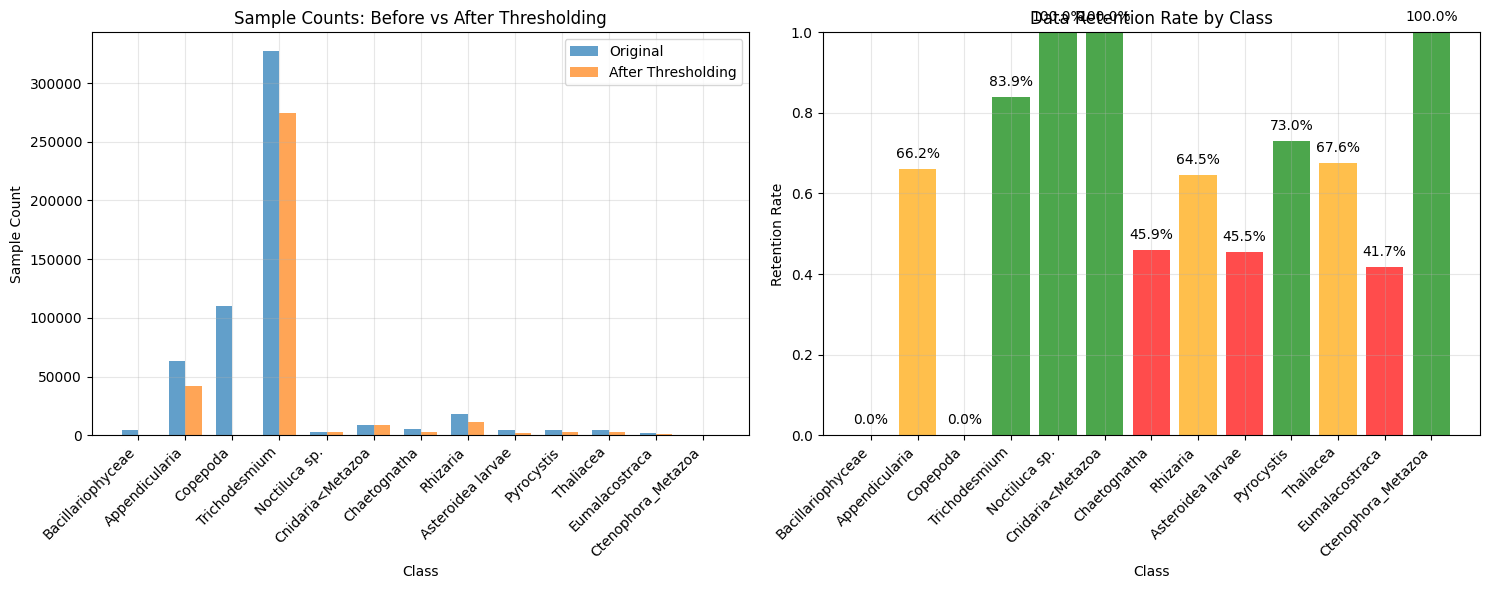

In [ ]:
def apply_thresholds_to_dataset(df_to_filter, suggested_thresholds, confidence_col='object_prob_1'):
    """
    Apply class-specific confidence thresholds to filter a dataset
    
    Parameters:
    - df_to_filter: DataFrame to apply thresholds to
    - suggested_thresholds: Output from plot_interactive_threshold_analysis()
    - confidence_col: Column name containing confidence scores
    
    Returns:
    - filtered_df: DataFrame with only samples meeting threshold criteria
    - filter_stats: Dictionary with filtering statistics
    """
    
    # Create threshold lookup dictionary
    threshold_lookup = {item['class']: item['threshold'] for item in suggested_thresholds}
    
    print("Applying class-specific thresholds:")
    print("-" * 50)
    for cls, thresh in threshold_lookup.items():
        print(f"  {cls:<20}: {thresh:.2f}")
    
    # Initialize results
    filtered_rows = []
    filter_stats = {}
    
    # Process each class
    for cls in df_to_filter['object_annotation_category'].unique():
        class_data = df_to_filter[df_to_filter['object_annotation_category'] == cls]
        original_count = len(class_data)
        
        if cls in threshold_lookup:
            # Apply threshold for this class
            threshold = threshold_lookup[cls]
            filtered_class_data = class_data[class_data[confidence_col] >= threshold]
            retained_count = len(filtered_class_data)
            retention_rate = retained_count / original_count if original_count > 0 else 0
            
            # Add to results
            filtered_rows.append(filtered_class_data)
            
        else:
            # No threshold defined - keep all data
            print(f"Warning: No threshold defined for class '{cls}' - keeping all {original_count} samples")
            filtered_class_data = class_data
            retained_count = original_count
            retention_rate = 1.0
            threshold = 0.0
            
            filtered_rows.append(filtered_class_data)
        
        # Store statistics
        filter_stats[cls] = {
            'original_count': original_count,
            'retained_count': retained_count,
            'retention_rate': retention_rate,
            'threshold_used': threshold
        }
    
    # Combine filtered data
    if filtered_rows:
        filtered_df = pd.concat(filtered_rows, ignore_index=True)
    else:
        filtered_df = pd.DataFrame()
    
    # Print summary
    total_original = len(df_to_filter)
    total_retained = len(filtered_df)
    overall_retention = total_retained / total_original if total_original > 0 else 0
    
    print(f"\n" + "="*70)
    print("FILTERING RESULTS SUMMARY")
    print("="*70)
    print(f"{'Class':<20} {'Original':<10} {'Retained':<10} {'Retention':<12} {'Threshold':<10}")
    print("-" * 70)
    
    for cls, stats in filter_stats.items():
        print(f"{cls:<20} {stats['original_count']:<10} {stats['retained_count']:<10} "
              f"{stats['retention_rate']:<12.1%} {stats['threshold_used']:<10.2f}")
    
    print("-" * 70)
    print(f"{'TOTAL':<20} {total_original:<10} {total_retained:<10} "
          f"{overall_retention:<12.1%} {'N/A':<10}")
    
    return filtered_df, filter_stats

# Apply thresholds to your unvalidated M181 dataset
# First, make sure you have the unvalidated dataset ready
print("Loading and preparing unvalidated dataset...")


# # Apply same class name standardization as you did for validated data
# M181_predicted_df['object_annotation_category'] = M181_predicted_df['object_annotation_category'].replace({
#     'Copepoda<Maxillopoda': 'Copepoda', 
#     'Cnidaria<Metazoa': 'Cnidaria', 
#     'Ctenophora<Metazoa': 'Ctenophora',
#     'Oithona': 'Copepoda',
#     'Calanoida': 'Copepoda'
# })

# Remove 'not-living' class
not_living_count = len(M181_nonvalidated_profiles_df[M181_nonvalidated_profiles_df['object_annotation_category'] == 'not-living'])
M181_nonvalidated_profiles_df = M181_nonvalidated_profiles_df[M181_nonvalidated_profiles_df['object_annotation_category'] != 'not-living'].copy()
print(f"Removed {not_living_count} 'not-living' samples")
print(f"Dataset size after removing 'not-living': {len(M181_nonvalidated_profiles_df)} samples")

# # Remove already validated profiles (from your earlier filtering)
# validated_profiles = df_renamed['sample_id'].unique()
# M181_unvalidated_df = M181_predicted_df[
#     ~M181_predicted_df['sample_id'].isin(validated_profiles)
# ].copy()

# print(f"Unvalidated dataset size: {len(M181_unvalidated_df)} samples")

M181_nonvalidated_profiles_df = M181_nonvalidated_profiles_df[
    ~M181_nonvalidated_profiles_df['object_annotation_category'].isin(['[t]', '[f]', '[other]'])
].copy()
M181_nonvalidated_profiles_df['object_prob_1'] = pd.to_numeric(M181_nonvalidated_profiles_df['object_prob_1'], errors='coerce')

# Apply the determined thresholds
M181_thresholded_df, filtering_stats = apply_thresholds_to_dataset(
    M181_nonvalidated_profiles_df, 
    suggested_thresholds, 
    'object_prob_1'
)

# Save the filtered dataset
output_path = '/home/fanny/ImageProcessing/M181_PISCO2_thresholded_dataset.csv'
M181_thresholded_df.to_csv(output_path, index=False)
print(f"\nFiltered dataset saved to: {output_path}")

# Optional: Create a comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Before/after comparison
classes_in_data = [cls for cls in filtering_stats.keys() if filtering_stats[cls]['original_count'] > 0]
original_counts = [filtering_stats[cls]['original_count'] for cls in classes_in_data]
retained_counts = [filtering_stats[cls]['retained_count'] for cls in classes_in_data]

x = np.arange(len(classes_in_data))
width = 0.35

axes[0].bar(x - width/2, original_counts, width, label='Original', alpha=0.7)
axes[0].bar(x + width/2, retained_counts, width, label='After Thresholding', alpha=0.7)
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Sample Count')
axes[0].set_title('Sample Counts: Before vs After Thresholding')
axes[0].set_xticks(x)
axes[0].set_xticklabels(classes_in_data, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Retention rates
retention_rates = [filtering_stats[cls]['retention_rate'] for cls in classes_in_data]
colors = ['green' if r >= 0.7 else 'orange' if r >= 0.5 else 'red' for r in retention_rates]

axes[1].bar(classes_in_data, retention_rates, color=colors, alpha=0.7)
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Retention Rate')
axes[1].set_title('Data Retention Rate by Class')
axes[1].set_xticklabels(classes_in_data, rotation=45, ha='right')
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim(0, 1)

# Add retention rate labels
for i, rate in enumerate(retention_rates):
    axes[1].text(i, rate + 0.02, f'{rate:.1%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

/tmp/ipykernel_10906/3256915989.py:2: DtypeWarning: Columns (11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  non_living_df = pd.read_csv('/home/fanny/Profiles/non_living_predicted.csv')


Analyzing 2 classes (excluded: ['bubble', 'dark<fluffy', 'aggregates', 'fiber<detritus', 'detritus', 'light<rectangle', 'Copepoda<Maxillopoda', 'not-living', 'aggregate-fluffy-grey-to-compact', 'streak', 'artefact', 'Appendicularia', 'Noctiluca sp.', 'Acantharia', 'Rhizaria', 'Cnidaria<Metazoa', 'Chaetognatha', 'Oithona', 'Bacillariophyceae', 'Ctenophora<Metazoa', 'Thaliacea', 'Eumalacostraca', 'Calanoida', 'Asteroidea larvae', 'Pyrocystis'])
Classes to analyze: ['tuft', 'puff']


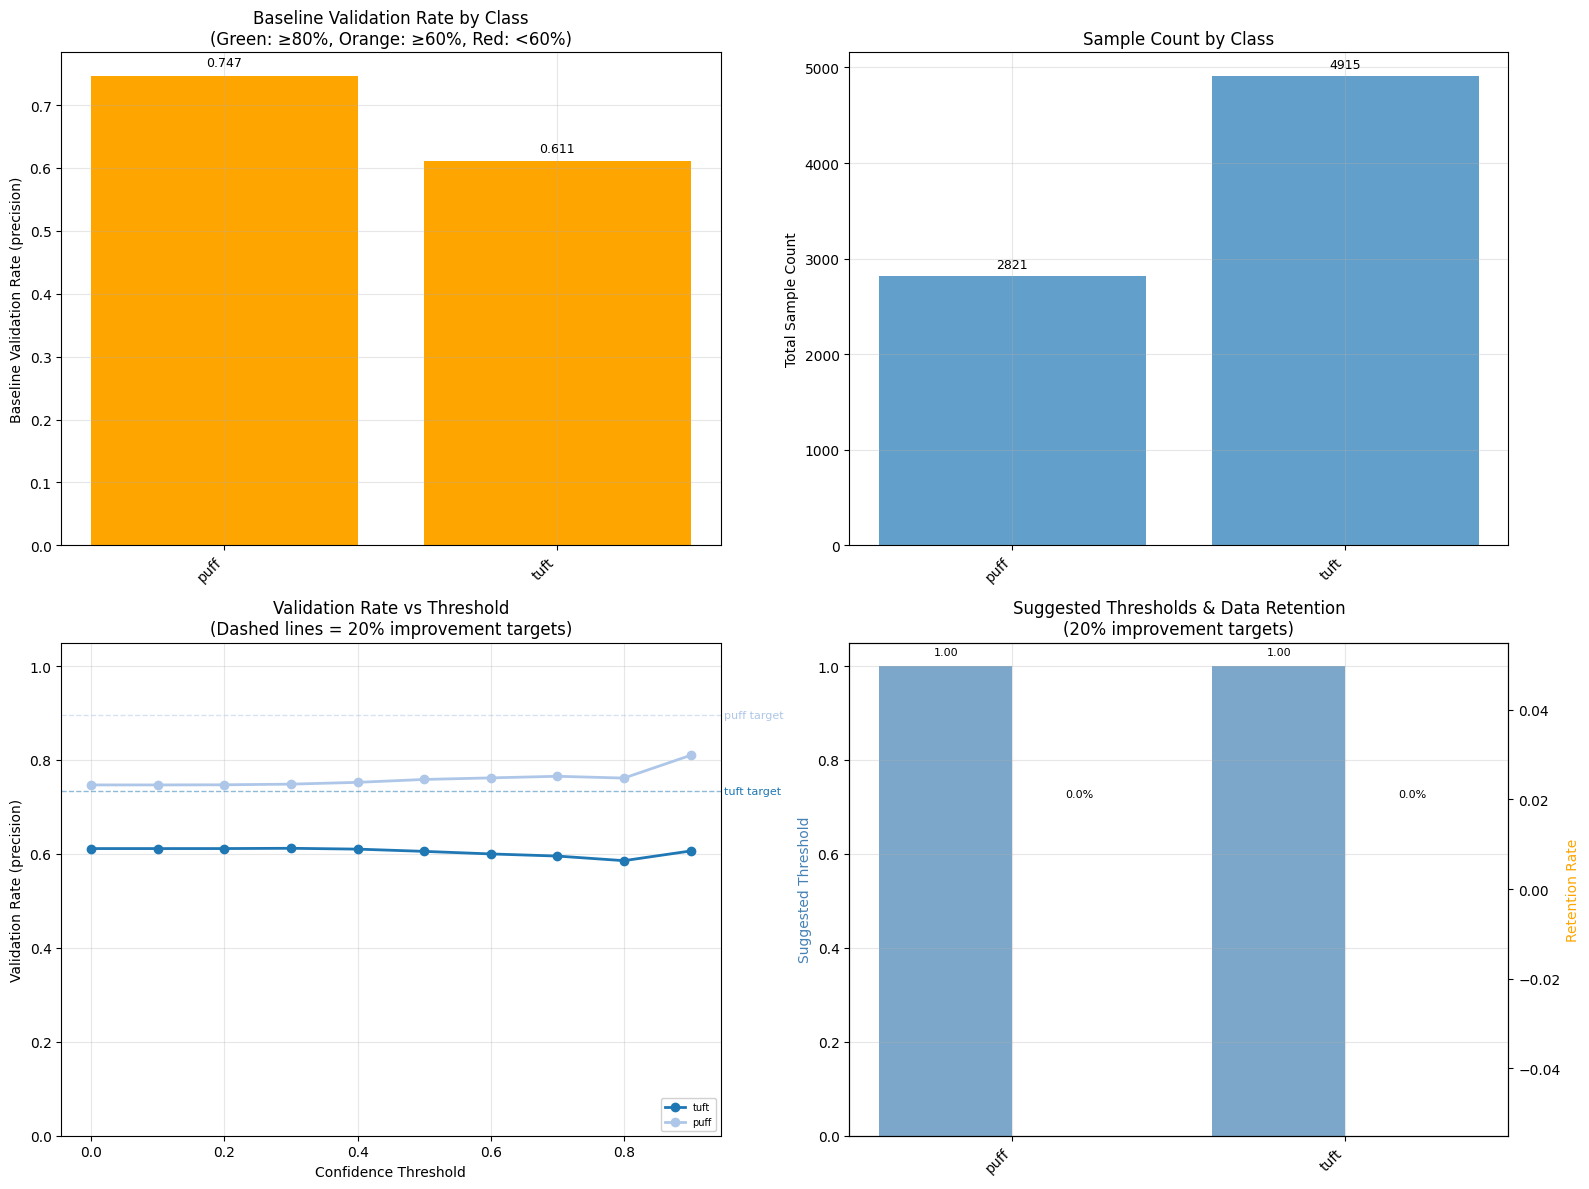


THRESHOLD SELECTION SUMMARY
Class           Baseline  Target    Threshold  Achieved  Retained  Retention 
----------------------------------------------------------------------------------------------------
puff            0.747     0.896     1.00       0.000     0         0.0%     
tuft            0.611     0.734     1.00       0.000     0         0.0%     

THRESHOLD RECOMMENDATIONS:

MEDIUM QUALITY CLASSES (baseline 60-80%):
Recommendation: Use higher thresholds (0.7-0.9) to improve quality
  puff: threshold 1.00 → 0.0% validation rate
  tuft: threshold 1.00 → 0.0% validation rate


In [16]:
#non_living_df = pd.read_csv("/home/fanny/Profiles/Non_living_export__TSV_17907_20250822_1329/ecotaxa_export__TSV_17907_20250822_1329.tsv", sep='\t')
non_living_df = pd.read_csv('/home/fanny/Profiles/non_living_predicted.csv')
non_living_validated_CTD50_df = non_living_df[non_living_df['sample_id'] == 'M181-175-1_CTD-050_00Â°00S-019Â°00W_20220509-0543']
# non_living_validated_CTD50_df ['object_annotation_category'] = non_living_validated_CTD50_df['object_annotation_category'].replace({
#      'puff': 'Trichodesmium',
#      'tuft': 'Trichodesmium'
#  })


# Apply the analysis to your non-living data
suggested_thresholds_nonliving = plot_interactive_threshold_analysis(
    non_living_validated_CTD50_df, 
    'prob1',
    exclude_classes=['bubble', 'dark<fluffy', 'aggregates', 'fiber<detritus', 'detritus',
                     'light<rectangle', 'Copepoda<Maxillopoda', 'not-living',
                     'aggregate-fluffy-grey-to-compact', 'streak', 'artefact',
                     'Appendicularia', 'Noctiluca sp.', 'Acantharia', 'Rhizaria',
                     'Cnidaria<Metazoa', 'Chaetognatha', 'Oithona', 'Bacillariophyceae',
                     'Ctenophora<Metazoa', 'Thaliacea', 'Eumalacostraca', 'Calanoida', 'Asteroidea larvae', 'Pyrocystis']
)

In [17]:
non_living_df['object_annotation_category'].unique()
non_living_df.columns

Index(['img_file_name', 'img_rank', 'object_id', 'object_lat', 'object_lon',
       'object_date', 'object_time', 'object_link', 'object_depth_min',
       'object_depth_max', 'object_annotation_status',
       'object_annotation_person_name', 'object_annotation_person_email',
       'object_annotation_date', 'object_annotation_time',
       'object_annotation_category', 'object_annotation_hierarchy',
       'complement_info', 'object_pressure', 'object_area', 'object_width',
       'object_height', 'object_bound_box_w', 'object_bound_box_h',
       'object_circularity', 'object_area_exc', 'object_area_rprops',
       'object_%area', 'object_major_axis_len', 'object_minor_axis_len',
       'object_centroid_y', 'object_centroid_x', 'object_convex_area',
       'object_min_intensity', 'object_max_intensity', 'object_mean_intensity',
       'object_int_density', 'object_perimeter', 'object_elongation',
       'object_range', 'object_perim_area_excl', 'object_perim_major',
       'object_c

In [18]:
non_living_tricho_data = non_living_df[non_living_df['object_annotation_category'].isin(['puff', 'tuft'])].copy()
non_living_tricho_data['object_annotation_category'] = non_living_tricho_data['object_annotation_category'].replace({
    'puff': 'Trichodesmium',
    'tuft': 'Trichodesmium'
})


apply_thresholds_to_dataset(
    non_living_tricho_data, 
    suggested_thresholds_nonliving,
)

Applying class-specific thresholds:
--------------------------------------------------
  puff                : 1.00
  tuft                : 1.00

FILTERING RESULTS SUMMARY
Class                Original   Retained   Retention    Threshold 
----------------------------------------------------------------------
Trichodesmium        78771      78771      100.0%       0.00      
----------------------------------------------------------------------
TOTAL                78771      78771      100.0%       N/A       


(                                           img_file_name  img_rank  \
 0      export__TSV_17907_20250811_1228/20220504-18152...         0   
 1      export__TSV_17907_20250811_1228/20220504-18155...         0   
 2      export__TSV_17907_20250811_1228/20220504-19262...         0   
 3      export__TSV_17907_20250811_1228/20220504-19315...         0   
 4      export__TSV_17907_20250811_1228/20220504-18124...         0   
 ...                                                  ...       ...   
 78766  export__TSV_17907_20250811_1228/20220519-02360...         0   
 78767  export__TSV_17907_20250811_1228/20220519-02363...         0   
 78768  export__TSV_17907_20250811_1228/20220519-02393...         0   
 78769  export__TSV_17907_20250811_1228/20220519-02410...         0   
 78770  export__TSV_17907_20250811_1228/20220519-02424...         0   
 
             object_id  object_lat  object_lon object_date object_time  \
 0       112-11285_429         0.0   -8.000000  2022-05-04    18:15:22  

In [8]:
def get_all_images(base_folder):
    """
    Load and process image metadata from directories.
    
    Scans through profile folders and extracts metadata from filenames
    including pressure, temperature, and datetime information.
    
    Parameters:
    - base_folder: str, path to the base folder containing profile directories
    
    Returns:
    - all_images_df: DataFrame with columns 'profile_name', 'filename', 'full_path', 
                     'pressure', 'temperature', 'date-time'
    """
    
    all_files = []

    # Iterate through profile folders
    for profile in os.listdir(base_folder):
        profile_path = os.path.join(base_folder, profile)
        if os.path.isdir(profile_path):
            data_folder = os.path.join(profile_path, "Data")
            if os.path.isdir(data_folder):
                for filename in os.listdir(data_folder):
                    file_path = os.path.join(data_folder, filename)
                    if os.path.isfile(file_path):
                        all_files.append({
                            "profile_name": profile,
                            "filename": filename,
                            "full_path": file_path
                        })

    # Convert to DataFrame
    df = pd.DataFrame(all_files)
    
    if df.empty:
        print(f"Warning: No files found in {base_folder}")
        return df

    # Parse filename to extract metadata
    split_df = df['filename'].apply(lambda f: os.path.splitext(f)[0]).str.split('_', expand=True)

    # Assign headers
    split_df.columns = ["date-time", "pressure", "temperature"]

    # Clean and convert numeric values
    split_df['pressure'] = split_df['pressure'].str.replace('bar', '', regex=False).astype(float)
    split_df['pressure'] = split_df['pressure'] * 10  # Convert to dbar
    split_df['temperature'] = split_df['temperature'].str.replace('C', '', regex=False).astype(float)

    # Merge split columns back into df
    all_images_df = pd.concat([df, split_df], axis=1)

    # Extract sample_id from profile_name
    all_images_df['sample_id'] = all_images_df['profile_name'].str.extract(r'(M181-\d+-\d+_CTD-\d+)')
    
    #print(f"Loaded metadata for {len(all_images_df)} images from {len(all_images_df['profile_name'].unique())} profiles")
    
    return all_images_df


all_images_df = get_all_images('/home/fanny/M181_Predictions/M181/')

/tmp/ipykernel_10906/649680755.py:44: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,43,44,45,46,47,49,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)
/tmp/ipykernel_10906/649680755.py:44: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,43,44,45,46,47,49,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)
/tmp/ipykernel_10906/649680755.py:44: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,43,44,45,46,47,49,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)
/tmp/ipykernel_10906/649680755.py:44: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

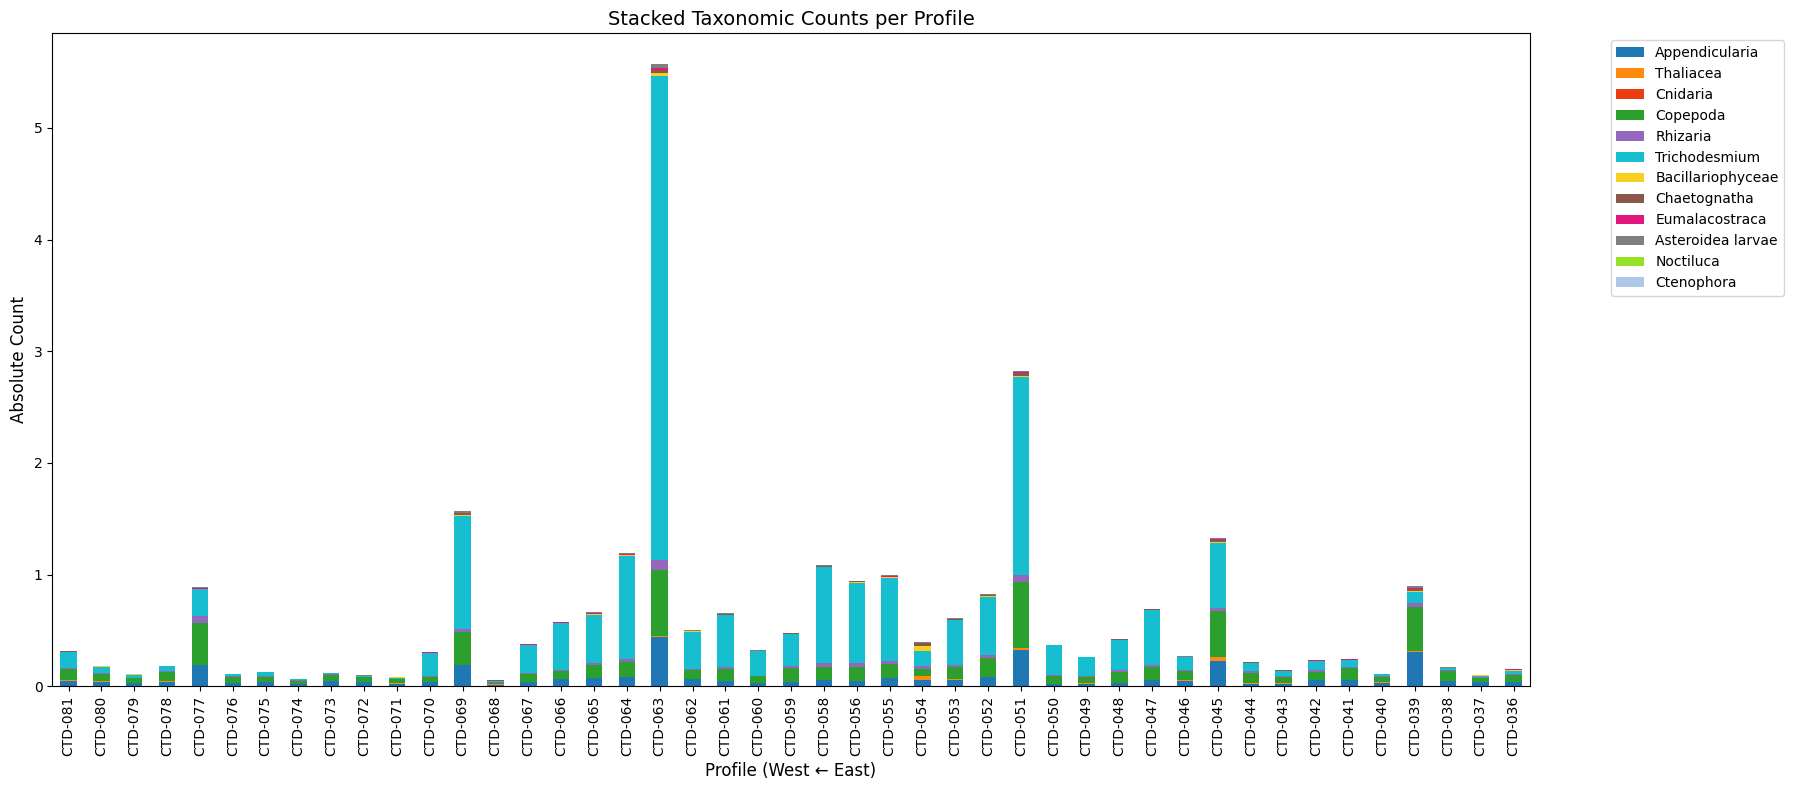

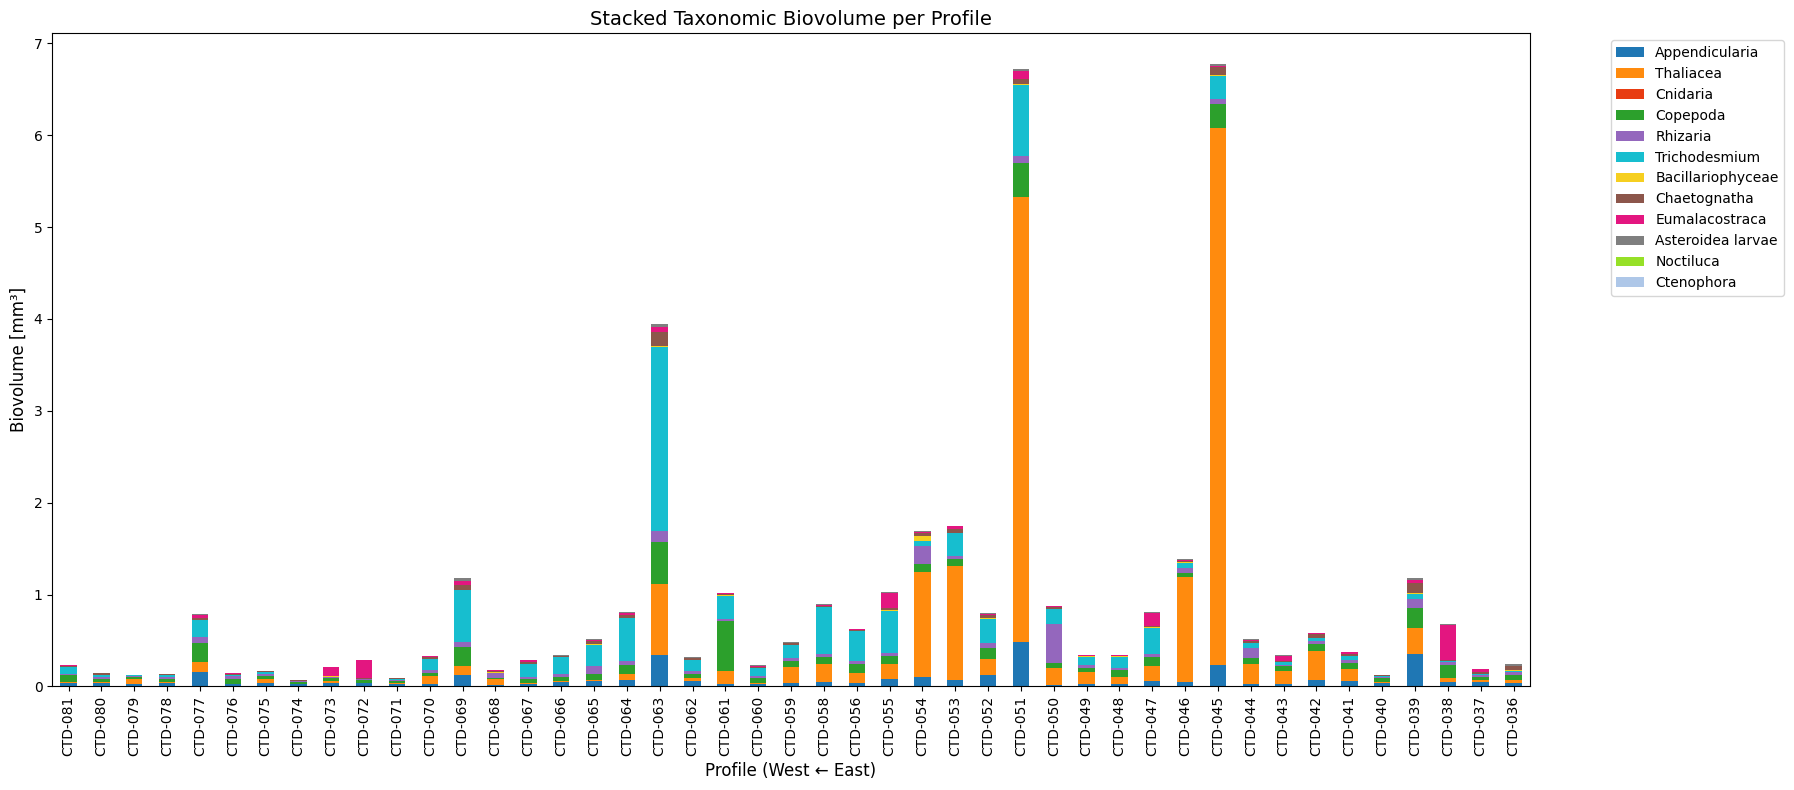

In [115]:
main_groups = [
    "Appendicularia", "Thaliacea", "Cnidaria", 
    "Copepoda", "Rhizaria", "Trichodesmium",
    "Bacillariophyceae", "Chaetognatha",
    "Eumalacostraca", "Asteroidea larvae", 
    "Noctiluca", "Ctenophora"
]
# colors = plt.cm.Set3(np.linspace(0, 1, len(main_groups)))
# color_dict = dict(zip(main_groups, colors))
group_colors = [
"#1f77b4", "#ff8b0e", "#e83c12", "#2ca02c", "#9467bd", "#17becf", "#f6cf20", 
"#8c564b", "#e31680", "#7f7f7f", "#96e027", "#aec7e8"
]
color_dict = dict(zip(main_groups, group_colors))

base_folder = "/home/fanny/M181_Predictions/M181"
profile_labels = []
counts_data = []
biovolume_data = []
all_images_df = get_all_images(base_folder)

for profile_idx, profile_folder in enumerate(sorted(os.listdir(base_folder))):
    profile_path = os.path.join(base_folder, profile_folder)
    if not os.path.isdir(profile_path):
        continue
    eco_folder = os.path.join(profile_path, "EcoTaxa")
    if not os.path.isdir(eco_folder):
        continue

    # Try both possible filenames
    csv_filename_1 = f"{profile_folder}_crops_metadata.csv"
    csv_filename_2 = f"{profile_folder}_crops_metadata_ET.csv"
    csv_path_1 = os.path.join(eco_folder, csv_filename_1)
    csv_path_2 = os.path.join(eco_folder, csv_filename_2)
    if os.path.isfile(csv_path_1):
        csv_path = csv_path_1
    elif os.path.isfile(csv_path_2):
        csv_path = csv_path_2
    else:
        print(f"Warning: File not found: {csv_path_1} or {csv_path_2}")
        continue

    # Load profile data
    df = pd.read_csv(csv_path)
    df['object_esd'] = pd.to_numeric(df['object_esd'], errors='coerce')
    if 'volume_um3' not in df.columns:
        df['volume_um3'] = (4/3) * np.pi * (df['object_esd']/2)**3

    # Get CTD number for x-axis label
    try:
        ctd_num = int(profile_folder.split('CTD-')[1].split('_')[0])
    except Exception:
        ctd_num = profile_idx + 1  # fallback
    profile_labels.append(f"CTD-{ctd_num:03d}")

    # Get sample_id for matching images
    if 'CTD-012-' in profile_folder:
        core_id = profile_folder.split('_')[0] + '_CTD-012'
    else:
        core_id = profile_folder.split('_')[0] + '_' + profile_folder.split('_')[1]

    # Get number of images for this profile
    images_for_profile = all_images_df[all_images_df['sample_id'] == core_id]
    num_images = len(images_for_profile)
    sampled_volume_L = num_images * VOLUME_PER_IMAGE_LITERS
    volume_data.append(sampled_volume_L)    

    # Counts and biovolume for each group
    counts = []
    biovolumes = []
    for group in main_groups:
        group_df = df[df["object_annotation_category"] == group]
        count = len(group_df) / sampled_volume_L if sampled_volume_L > 0 else np.nan
        biovolume = (group_df['volume_um3'].sum() / 1e9) / sampled_volume_L if sampled_volume_L > 0 else np.nan  # mm³/L
        counts.append(count)
        biovolumes.append(biovolume)

    counts_data.append(counts)
    biovolume_data.append(biovolumes)

# Convert to DataFrame for easy stacking
counts_df = pd.DataFrame(counts_data, columns=main_groups, index=profile_labels)
biovolume_df = pd.DataFrame(biovolume_data, columns=main_groups, index=profile_labels)

# Sort profile_labels and data by CTD number DESCENDING (high to low)
ctd_numbers = [int(label.split('-')[1]) for label in profile_labels]
sorted_indices = np.argsort(ctd_numbers)[::-1]  # reverse for descending
profile_labels_sorted = [profile_labels[i] for i in sorted_indices]
counts_df_sorted = counts_df.loc[profile_labels_sorted]
biovolume_df_sorted = biovolume_df.loc[profile_labels_sorted]

# Stacked bar plot for counts (left = west, right = east, CTD low to high)
fig_counts, ax_counts = plt.subplots(figsize=(18, 8))
counts_df_sorted.plot(kind='bar', stacked=True, ax=ax_counts, color=[color_dict[g] for g in main_groups])
ax_counts.set_xlabel('Profile (West ← East)', fontsize=12)
ax_counts.set_ylabel('Absolute Count', fontsize=12)
ax_counts.set_title('Stacked Taxonomic Counts per Profile', fontsize=14)
ax_counts.legend(main_groups, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Stacked bar plot for biovolume
fig_biovolume, ax_biovolume = plt.subplots(figsize=(18, 8))
biovolume_df_sorted.plot(kind='bar', stacked=True, ax=ax_biovolume, color=[color_dict[g] for g in main_groups])
ax_biovolume.set_xlabel('Profile (West ← East)', fontsize=12)
ax_biovolume.set_ylabel('Biovolume [mm³]', fontsize=12)
ax_biovolume.set_title('Stacked Taxonomic Biovolume per Profile', fontsize=14)
ax_biovolume.legend(main_groups, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_10906/204647041.py:66: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,43,44,45,46,47,49,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)
/tmp/ipykernel_10906/204647041.py:66: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,43,44,45,46,47,49,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)
/tmp/ipykernel_10906/204647041.py:66: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,43,44,45,46,47,49,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)
/tmp/ipykernel_10906/204647041.py:66: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,

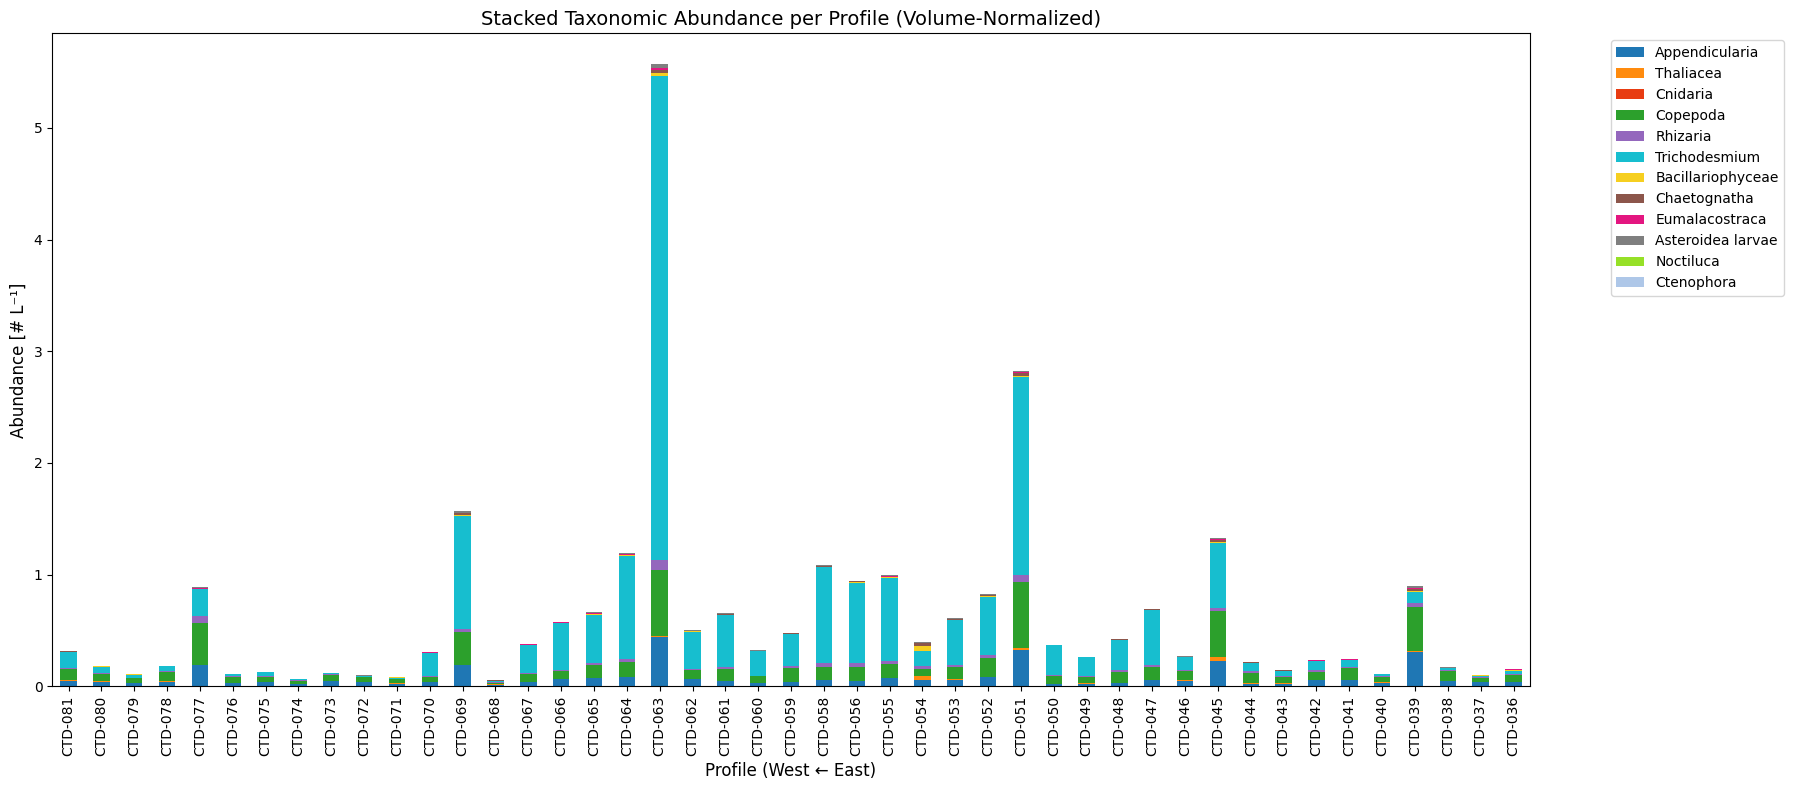

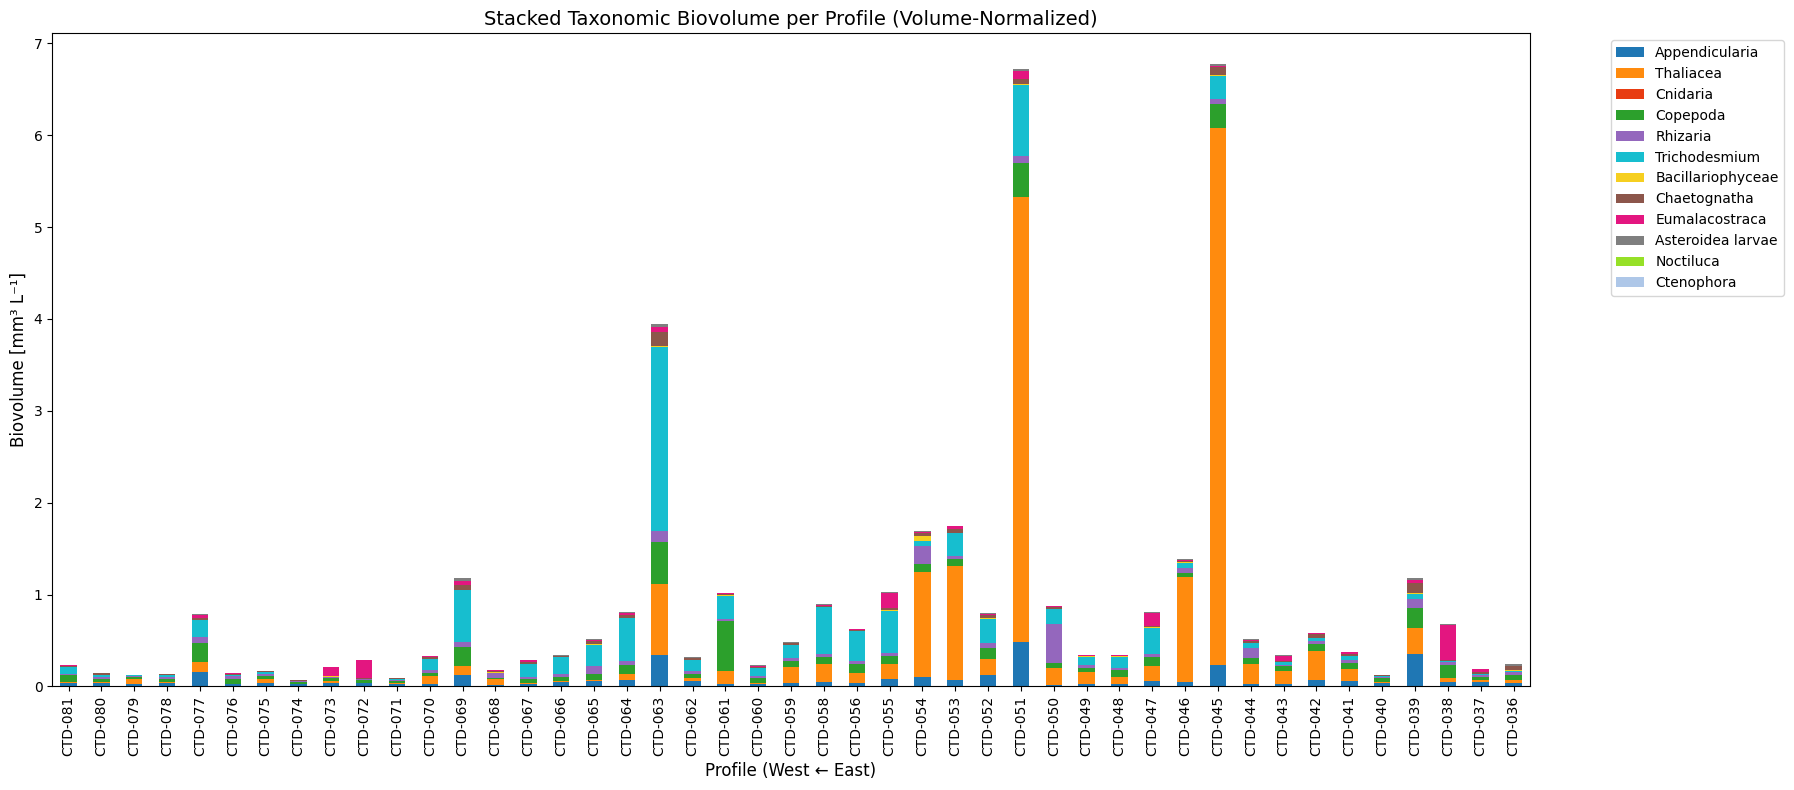

In [114]:
# main_groups = [
#     "Bacillariophyceae", "Chaetognatha", "Appendicularia", "Thaliacea",
#     "Cnidaria", "Copepoda", "Eumalacostraca", "Asteroidea larvae",
#     "Rhizaria", "Trichodesmium", "Noctiluca", "Ctenophora"
# ]

main_groups = [
    "Appendicularia", "Thaliacea", "Cnidaria", 
    "Copepoda", "Rhizaria", "Trichodesmium",
    "Bacillariophyceae", "Chaetognatha",
    "Eumalacostraca", "Asteroidea larvae", 
    "Noctiluca", "Ctenophora"
]

group_colors = [
"#1f77b4", "#ff8b0e", "#e83c12", "#2ca02c", "#9467bd", "#17becf", "#f6cf20", 
"#8c564b", "#e31680", "#7f7f7f", "#96e027", "#aec7e8"
]
color_dict = dict(zip(main_groups, group_colors))

#colors = plt.cm.Set3(np.linspace(0, 1, len(main_groups)))
#color_dict = dict(zip(main_groups, colors))

# Add a mapping for legend display names
legend_name_map = {
    'Cnidaria<Metazoa': 'Cnidaria',
    'Noctiluca sp.': 'Noctiluca',
    'Ctenophora_Metazoa': 'Ctenophora'
}
# Use original name if not in mapping
legend_labels = [legend_name_map.get(g, g) for g in main_groups]


base_folder = "/home/fanny/M181_Predictions/M181"

# Load all image metadata for volume normalization
all_images_df = get_all_images(base_folder)

profile_labels = []
counts_data = []
biovolume_data = []
volume_data = []

for profile_idx, profile_folder in enumerate(sorted(os.listdir(base_folder))):
    profile_path = os.path.join(base_folder, profile_folder)
    if not os.path.isdir(profile_path):
        continue
    eco_folder = os.path.join(profile_path, "EcoTaxa")
    if not os.path.isdir(eco_folder):
        continue

    # Try both possible filenames
    csv_filename_1 = f"{profile_folder}_crops_metadata.csv"
    csv_filename_2 = f"{profile_folder}_crops_metadata_ET.csv"
    csv_path_1 = os.path.join(eco_folder, csv_filename_1)
    csv_path_2 = os.path.join(eco_folder, csv_filename_2)
    if os.path.isfile(csv_path_1):
        csv_path = csv_path_1
    elif os.path.isfile(csv_path_2):
        csv_path = csv_path_2
    else:
        print(f"Warning: File not found: {csv_path_1} or {csv_path_2}")
        continue

    # Load profile data
    df = pd.read_csv(csv_path)
    df['object_esd'] = pd.to_numeric(df['object_esd'], errors='coerce')
    if 'volume_um3' not in df.columns:
        df['volume_um3'] = (4/3) * np.pi * (df['object_esd']/2)**3

    # Get CTD number for x-axis label
    try:
        ctd_num = int(profile_folder.split('CTD-')[1].split('_')[0])
    except Exception:
        ctd_num = profile_idx + 1  # fallback
    profile_labels.append(f"CTD-{ctd_num:03d}")

    # Get sample_id for matching images
    if 'CTD-012-' in profile_folder:
        core_id = profile_folder.split('_')[0] + '_CTD-012'
    else:
        core_id = profile_folder.split('_')[0] + '_' + profile_folder.split('_')[1]

    # Get number of images for this profile
    images_for_profile = all_images_df[all_images_df['sample_id'] == core_id]
    num_images = len(images_for_profile)
    sampled_volume_L = num_images * VOLUME_PER_IMAGE_LITERS
    volume_data.append(sampled_volume_L)

    # Counts and biovolume for each group (normalized)
    counts = []
    biovolumes = []
    for group in main_groups:
        group_df = df[df["object_annotation_category"] == group]
        count = len(group_df) / sampled_volume_L if sampled_volume_L > 0 else np.nan
        biovolume = (group_df['volume_um3'].sum() / 1e9) / sampled_volume_L if sampled_volume_L > 0 else np.nan  # mm³/L
        counts.append(count)
        biovolumes.append(biovolume)

    counts_data.append(counts)
    biovolume_data.append(biovolumes)

# Convert to DataFrame for easy stacking
counts_df = pd.DataFrame(counts_data, columns=main_groups, index=profile_labels)
biovolume_df = pd.DataFrame(biovolume_data, columns=main_groups, index=profile_labels)

# Sort profile_labels and data by CTD number DESCENDING (high to low)
ctd_numbers = [int(label.split('-')[1]) for label in profile_labels]
sorted_indices = np.argsort(ctd_numbers)[::-1]  # reverse for descending
profile_labels_sorted = [profile_labels[i] for i in sorted_indices]
counts_df_sorted = counts_df.loc[profile_labels_sorted]
biovolume_df_sorted = biovolume_df.loc[profile_labels_sorted]

# Stacked bar plot for volume-normalized counts
fig_counts, ax_counts = plt.subplots(figsize=(18, 8))
counts_df_sorted.plot(kind='bar', stacked=True, ax=ax_counts, color=[color_dict[g] for g in main_groups])
ax_counts.set_xlabel('Profile (West ← East)', fontsize=12)
ax_counts.set_ylabel('Abundance [# L⁻¹]', fontsize=12)
ax_counts.set_title('Stacked Taxonomic Abundance per Profile (Volume-Normalized)', fontsize=14)
ax_counts.legend(legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Stacked bar plot for volume-normalized biovolume
fig_biovolume, ax_biovolume = plt.subplots(figsize=(18, 8))
biovolume_df_sorted.plot(kind='bar', stacked=True, ax=ax_biovolume, color=[color_dict[g] for g in main_groups])
ax_biovolume.set_xlabel('Profile (West ← East)', fontsize=12)
ax_biovolume.set_ylabel('Biovolume [mm³ L⁻¹]', fontsize=12)
ax_biovolume.set_title('Stacked Taxonomic Biovolume per Profile (Volume-Normalized)', fontsize=14)
ax_biovolume.legend(legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



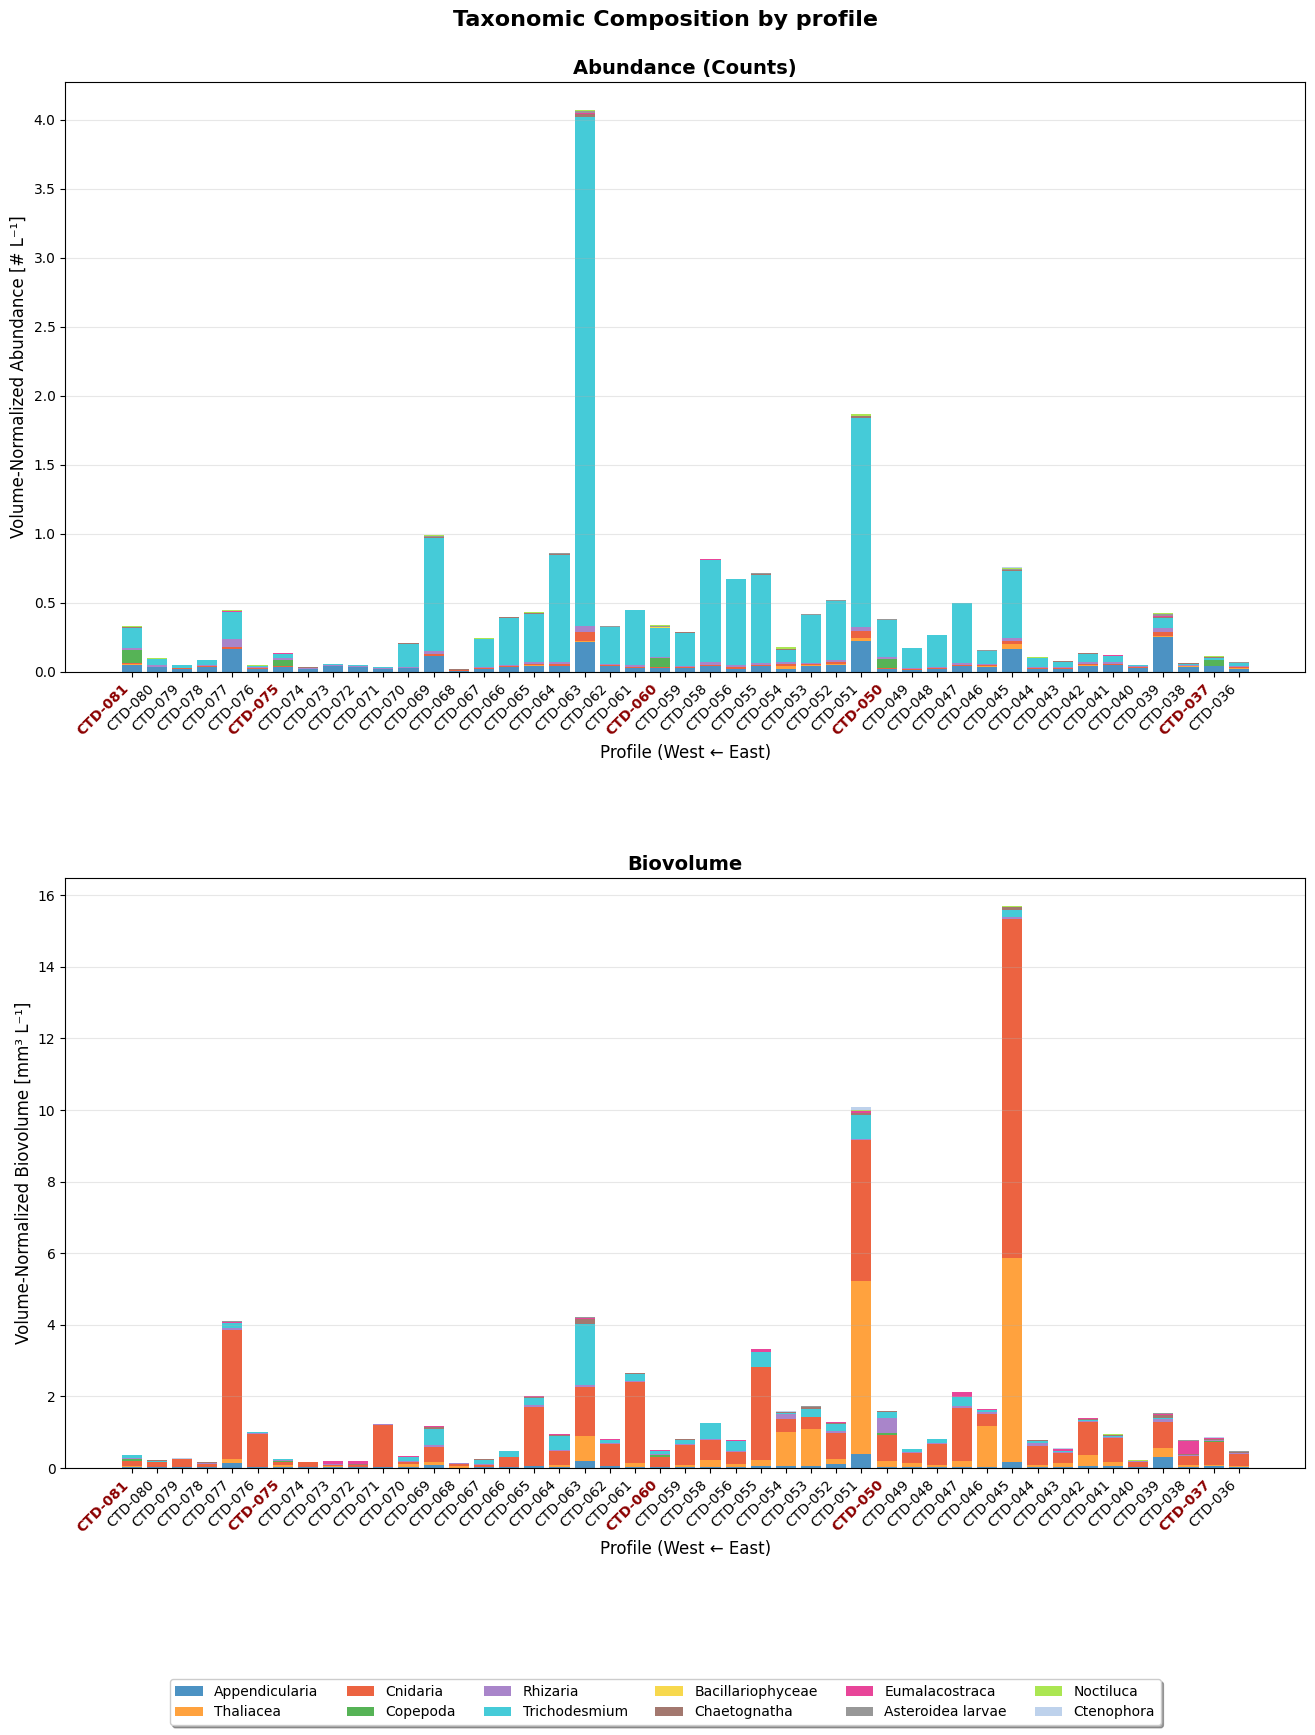

Profile order (West to East):
1. CTD-081: M181-297-1_CTD-081_00°00S-041°50W_20220519-0218
2. CTD-080: M181-295-1_CTD-080_00°00S-041°00W_20220518-2053
3. CTD-079: M181-294-1_CTD-079_00°00S-040°50W_20220518-1608
4. CTD-078: M181-290-1_CTD-078_00°00S-040°00W_20220518-1000
5. CTD-077: M181-288-1_CTD-077_00°00S-040°00W_20220518-0711
6. CTD-076: M181-287-1_CTD-076_00°00S-039°50W_20220518-0209
7. CTD-075: M181-285-1_CTD-075_00°00S-039°00W_20220517-2024
8. CTD-074: M181-283-1_CTD-074_00°00S-038°50W_20220517-1445
9. CTD-073: M181-281-1_CTD-073_00°00S-038°00W_20220517-0828
10. CTD-072: M181-276-1_CTD-072_00°00S-037°00W_20220516-2214
11. CTD-071: M181-272-1_CTD-071_00°00S-036°00W_20220516-1313
12. CTD-070: M181-267-1_CTD-070_00°00S-035°00W_20220516-0335
13. CTD-069: M181-265-1_CTD-069_00°00S-035°00W_20220516-0101
14. CTD-068: M181-261-1_CTD-068_00°00S-034°00W_20220515-1439
15. CTD-067: M181-255-1_CTD-067_00°00S-033°00W_20220515-0504
16. CTD-066: M181-252-1_CTD-066_00°00S-032°00W_20220514-1919
17.

In [117]:
def plot_taxonomic_composition_combined_volume_normalized(df, plot_path):
    """
    Plot taxonomic composition showing both volume-normalized counts and biovolume side by side.
    Uses VOLUME NORMALIZATION for both counts and biovolume
    to match your other analysis functions.
    
    Parameters:
    - df: DataFrame with particle data including 'object_annotation_hierarchy' and 'sample_id'
    - plot_path: str, directory to save the plot
    """

    # Calculate biovolume if not present
    df_with_vol = df.copy()

    # Ensure object_esd is numeric and drop rows with NaN
    df_with_vol['object_esd'] = pd.to_numeric(df_with_vol['object_esd'], errors='coerce')
    df_with_vol = df_with_vol.dropna(subset=['object_esd'])

    if 'volume_um3' not in df_with_vol.columns:
        df_with_vol['volume_um3'] = (4/3) * np.pi * (df_with_vol['object_esd']/2)**3
    
    # Define the main taxonomic groups to analyze
    main_groups = [
        "Appendicularia", "Thaliacea", "Cnidaria", 
        "Copepoda", "Rhizaria", "Trichodesmium",
        "Bacillariophyceae", "Chaetognatha",
        "Eumalacostraca", "Asteroidea larvae", 
        "Noctiluca", "Ctenophora"
    ]
    
    # Get unique profiles and sort by CTD number (west to east)
    profiles = sorted(df_with_vol['sample_id'].unique())
    
    # Extract CTD numbers and sort profiles by CTD number
    profile_ctd_pairs = []
    for profile in profiles:
        try:
            ctd_match = profile.split('_CTD-')[1].split('_')[0]  # Gets '037' part
            ctd_number = int(ctd_match)  # Convert to integer for sorting
            profile_ctd_pairs.append((profile, ctd_number))
        except (IndexError, ValueError):
            # FIXED: Use the same logic as your stacked function
            ctd_match = profile.split('_CTD-')[1].split('-')[0]  # there is a mistake in the name of profile ctd-12, it is followed by - instead of _
            ctd_number = int(ctd_match)  # Convert to integer for sorting
            profile_ctd_pairs.append((profile, ctd_number))
    
    # Sort by CTD number in DESCENDING order (highest to lowest = west to east)
    profile_ctd_pairs.sort(key=lambda x: x[1], reverse=True)
    sorted_profiles = [pair[0] for pair in profile_ctd_pairs]
    sorted_ctd_numbers = [pair[1] for pair in profile_ctd_pairs]
    
    # ============= COLLECT VOLUME-NORMALIZED DATA FOR BOTH PLOTS =============
    
    # For volume-normalized counts
    composition_data_normalized = {}
    for profile in sorted_profiles:
        profile_df = df_with_vol[df_with_vol['sample_id'] == profile]
        
        # Extract core ID for image matching
        core_id = profile.split('_')[0] + '_' + profile.split('_')[1]  # e.g., 'M181-027-1_CTD-012'
        
        # Find matching image metadata for this specific profile
        profile_images = all_images_df[all_images_df['sample_id'] == core_id]
        
        if profile_images.empty:
            print(f"Warning: No matching images found for profile {profile} (core: {core_id})")
            continue
        
        # Count images per pressure bin & calculate sampled volume (SAME AS YOUR OTHER FUNCTIONS)
        profile_images = profile_images.copy()
        profile_images['pressure_bin'] = np.digitize(profile_images['pressure'], 
                                                   np.arange(0, profile_images['pressure'].max() + 50, 50))
        
        image_counts = profile_images.groupby('pressure_bin').size().reset_index(name='image_count')
        image_counts['sampled_volume_L'] = image_counts['image_count'] * VOLUME_PER_IMAGE_LITERS
        
        # Calculate total sampling volume for this profile
        total_sampling_volume_L = image_counts['sampled_volume_L'].sum()
        
        if total_sampling_volume_L == 0:
            print(f"Warning: Zero sampling volume for profile {profile}")
            continue
        
        profile_composition_normalized = {}
        
        # Count particles for each main group and NORMALIZE BY VOLUME
        for group in main_groups:
            group_df = profile_df[
                profile_df["object_annotation_category"].str.contains(group, na=False)
            ]
            count = len(group_df)
            # NORMALIZE by total sampling volume (same approach as your other functions)
            count_normalized = count / total_sampling_volume_L
            profile_composition_normalized[group] = count_normalized
        
        composition_data_normalized[profile] = profile_composition_normalized
        
        total_particles = len(profile_df)
        classified_count = sum(len(profile_df[profile_df["object_annotation_category"].str.contains(group, na=False)]) for group in main_groups)
        #print(f"{profile}: {total_particles} total particles, {classified_count} classified, {total_sampling_volume_L:.2f}L sampled, normalized by volume")
    
    composition_df_normalized = pd.DataFrame(composition_data_normalized).T.fillna(0)
    
    # For volume-normalized biovolume
    biovolume_data_normalized = {}
    for profile in sorted_profiles:
        profile_df = df_with_vol[df_with_vol['sample_id'] == profile]
        
        # Extract core ID for image matching
        core_id = profile.split('_')[0] + '_' + profile.split('_')[1]
        
        # Find matching image metadata for this specific profile
        profile_images = all_images_df[all_images_df['sample_id'] == core_id]
        
        if profile_images.empty:
            continue
        
        # Count images per pressure bin & calculate sampled volume
        profile_images = profile_images.copy()
        profile_images['pressure_bin'] = np.digitize(profile_images['pressure'], 
                                                   np.arange(0, profile_images['pressure'].max() + 50, 50))
        
        image_counts = profile_images.groupby('pressure_bin').size().reset_index(name='image_count')
        image_counts['sampled_volume_L'] = image_counts['image_count'] * VOLUME_PER_IMAGE_LITERS
        
        # Calculate total sampling volume for this profile
        total_sampling_volume_L = image_counts['sampled_volume_L'].sum()
        
        if total_sampling_volume_L == 0:
            continue
        
        profile_biovolume_normalized = {}
        
        # Sum biovolume for each main group and NORMALIZE BY VOLUME
        for group in main_groups:
            group_df = profile_df[
                profile_df["object_annotation_category"].str.contains(group, na=False)
            ]
            biovolume_sum = group_df['volume_um3'].sum()
            # NORMALIZE by total sampling volume
            biovolume_normalized = biovolume_sum / total_sampling_volume_L
            profile_biovolume_normalized[group] = biovolume_normalized
        
        biovolume_data_normalized[profile] = profile_biovolume_normalized
    
    biovolume_df_normalized = pd.DataFrame(biovolume_data_normalized).T.fillna(0)
    biovolume_df_normalized_mm3_per_L = biovolume_df_normalized / 1e9  # Convert from μm³/L to mm³/L
    
    # FILTER TO ONLY PROFILES WITH DATA - FIXED!
    profiles_with_data = list(composition_df_normalized.index)
    
    # Filter sorted profiles to only include those with actual data
    filtered_sorted_profiles = [p for p in sorted_profiles if p in profiles_with_data]
    filtered_sorted_ctd_numbers = []
    
    # Get corresponding CTD numbers for filtered profiles
    for profile in filtered_sorted_profiles:
        for p, ctd_num in profile_ctd_pairs:
            if p == profile:
                filtered_sorted_ctd_numbers.append(ctd_num)
                break
    
    # ============= CREATE COMBINED PLOT =============
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 18))
    
    # Define colors for each group (consistent across both plots)
    # colors = plt.cm.Set3(np.linspace(0, 1, len(main_groups)))
    # color_dict = dict(zip(main_groups, colors))
    group_colors = [
    "#1f77b4", "#ff8b0e","#e83c12", "#2ca02c", "#9467bd", "#17becf", "#f6cf20", 
    "#8c564b", "#e31680", "#7f7f7f", "#96e027", "#aec7e8"
    ]
    color_dict = dict(zip(main_groups, group_colors))
    
    # Extract CTD numbers for x-axis labels - USE FILTERED DATA
    profile_labels = [f"CTD-{ctd:03d}" for ctd in filtered_sorted_ctd_numbers]
    
    
    # ============= LEFT PLOT: VOLUME-NORMALIZED COUNTS =============
    
    bottom1 = np.zeros(len(filtered_sorted_profiles))
    
    for group in main_groups:
        if group in composition_df_normalized.columns:
            values = composition_df_normalized.loc[filtered_sorted_profiles, group].values
            ax1.bar(range(len(filtered_sorted_profiles)), values, bottom=bottom1, 
                   label=group, color=color_dict[group], alpha=0.8)
            bottom1 += values
    
    # # Add count labels for major contributors (>0.5 particles/L)
    # for i, profile in enumerate(filtered_sorted_profiles):
    #     cumulative = 0
    #     for group in main_groups:
    #         if group in composition_df_normalized.columns:
    #             value = composition_df_normalized.loc[profile, group]
    #             if value > 0.5:
    #                 y_pos = cumulative + value/2
    #                 ax1.text(i, y_pos, f'{value:.1f}', 
    #                        ha='center', va='center', fontsize=8, fontweight='bold')
    #             cumulative += value
    
    ax1.set_xlabel('Profile (West ← East)', fontsize=12)
    ax1.set_ylabel('Volume-Normalized Abundance [# L⁻¹]', fontsize=12)
    ax1.set_title('Abundance (Counts)', fontsize=14, fontweight='bold')
    ax1.set_xticks(range(len(filtered_sorted_profiles)))
    ax1.set_xticklabels(profile_labels, rotation=45, ha='right', fontsize=10)
    ax1.grid(True, alpha=0.3, axis='y')


    # # Get validated profile sample_ids (adjust variable name if needed)
    # validated_profiles = set(M181_5validated_profiles_df['sample_id'].unique())

    # fig.canvas.draw()  # Ensure tick labels are created
    # # Highlight validated profiles on x-axis
    # for ax in [ax1, ax2]:
    #     for i, profile in enumerate(filtered_sorted_profiles):
    #         label = ax.get_xticklabels()[i]
    #         if profile in validated_profiles:
    #             label.set_color('darkred')
    #             label.set_fontweight('bold')
    #         else:
    #             label.set_color('black')
    #             label.set_fontweight('normal')
    
    # ============= RIGHT PLOT: VOLUME-NORMALIZED BIOVOLUME =============
    
    bottom2 = np.zeros(len(filtered_sorted_profiles))
    
    for group in main_groups:
        if group in biovolume_df_normalized_mm3_per_L.columns:
            values = biovolume_df_normalized_mm3_per_L.loc[filtered_sorted_profiles, group].values
            ax2.bar(range(len(filtered_sorted_profiles)), values, bottom=bottom2, 
                   label=group, color=color_dict[group], alpha=0.8)
            bottom2 += values
    
    # # IMPROVED BIOVOLUME LABELING for normalized values
    # for i, profile in enumerate(filtered_sorted_profiles):
    #     cumulative = 0
    #     for group in main_groups:
    #         if group in biovolume_df_normalized_mm3_per_L.columns:
    #             value = biovolume_df_normalized_mm3_per_L.loc[profile, group]
    #             segment_height = value
                
    #             # Only label segments that are significant contributors (>0.01 mm³/L OR >10% of profile total)
    #             total_height = biovolume_df_normalized_mm3_per_L.loc[profile].sum()
    #             percentage_of_total = (value / total_height * 100) if total_height > 0 else 0
                
    #             if value > 0.01 and percentage_of_total > 10:
    #                 y_pos = cumulative + segment_height/2
                    
    #                 # Format the value for normalized biovolume
    #                 if value > 1:
    #                     label_text = f'{value:.1f}'    # Show as "2.7"
    #                 elif value > 0.1:
    #                     label_text = f'{value:.2f}'    # Show as "0.45" 
    #                 else:
    #                     label_text = f'{value:.3f}'    # Show as "0.025"
                    
    #                 ax2.text(i, y_pos, label_text, 
    #                        ha='center', va='center', fontsize=8, fontweight='bold')
                
    #             cumulative += segment_height
    
    ax2.set_xlabel('Profile (West ← East)', fontsize=12)
    ax2.set_ylabel('Volume-Normalized Biovolume [mm³ L⁻¹]', fontsize=12)
    ax2.set_title('Biovolume', fontsize=14, fontweight='bold')
    ax2.set_xticks(range(len(filtered_sorted_profiles)))
    ax2.set_xticklabels(profile_labels, rotation=45, ha='right', fontsize=10)
    ax2.grid(True, alpha=0.3, axis='y')

    #Get validated profile sample_ids (adjust variable name if needed)
    validated_profiles = set(M181_5validated_profiles_df['sample_id'].unique())
    
    fig.canvas.draw()  # Ensure tick labels are created
    # Highlight validated profiles on x-axis
    for ax in [ax1, ax2]:
        ticklabels = ax.get_xticklabels()
        for i, profile in enumerate(filtered_sorted_profiles):
            if i < len(ticklabels):
                label = ticklabels[i]
                if profile in validated_profiles:
                    label.set_color('darkred')
                    label.set_fontweight('bold')
                else:
                    label.set_color('black')
                    label.set_fontweight('normal')


    # ============= SINGLE SHARED LEGEND =============
    
    # Create legend between the two plots
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, 0.02), 
              ncol=6, fontsize=10, frameon=True, fancybox=True, shadow=True)
    
    # Add overall title with more space above subheaders
    plt.suptitle('Taxonomic Composition by profile', 
                 fontsize=16, fontweight='bold', y=0.96)
    
    # Adjust layout to accommodate legend, indicators, and better spacing
    plt.subplots_adjust(bottom=0.15, top=0.92, hspace=0.35)
    
    # Save plot
    plt.savefig(os.path.join(plot_path, 'taxonomic_composition_combined_volume_normalized_west_east.png'), 
                dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
    # Print sorting information (updated) - USE FILTERED DATA
    print("Profile order (West to East):")
    for i, (profile, ctd_num) in enumerate(zip(filtered_sorted_profiles, filtered_sorted_ctd_numbers)):
        print(f"{i+1}. CTD-{ctd_num:03d}: {profile}")
    
    return composition_df_normalized.loc[filtered_sorted_profiles], biovolume_df_normalized_mm3_per_L.loc[filtered_sorted_profiles]


#combine thresholded dataset with validated profiles
combined_profiles_df = pd.concat([M181_thresholded_df, df_renamed], ignore_index=True)

# Generate the volume-normalized combined plot for your thresholded dataset
composition_counts_normalized_df, composition_biovolume_normalized_df = plot_taxonomic_composition_combined_volume_normalized(
    combined_profiles_df, plot_path='/home/fanny/plots')

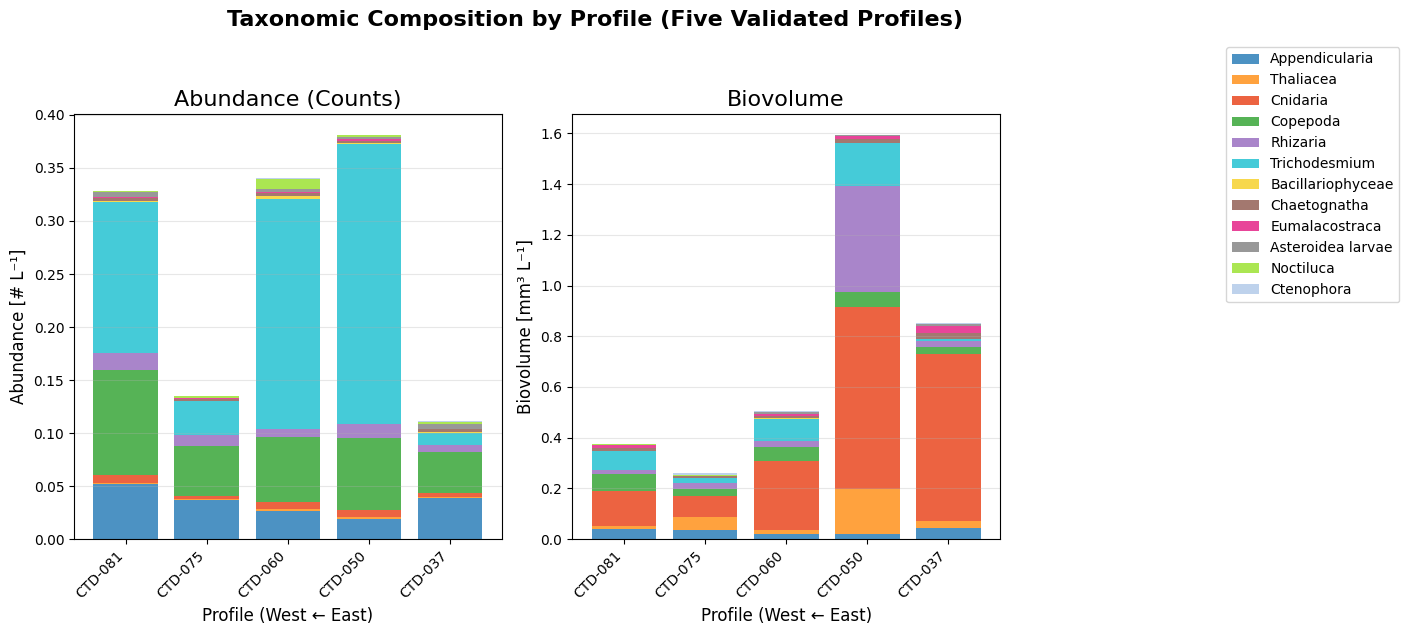

Profile order (West to East):
1. CTD-081: M181-297-1_CTD-081_00°00S-041°50W_20220519-0218
2. CTD-075: M181-285-1_CTD-075_00°00S-039°00W_20220517-2024
3. CTD-060: M181-227-1_CTD-060_00°00S-027°00W_20220512-1748
4. CTD-050: M181-175-1_CTD-050_00°00S-019°00W_20220509-0543
5. CTD-037: M181-112-1_CTD-037_00°00S-008°00W_20220504-1758


In [112]:
def plot_taxonomic_composition_5_profiles(df, plot_path):
    """
    Plot taxonomic composition showing both volume-normalized counts and biovolume side by side.
    Uses VOLUME NORMALIZATION for both counts and biovolume
    to match your other analysis functions.
    
    Parameters:
    - df: DataFrame with particle data including 'object_annotation_hierarchy' and 'sample_id'
    - plot_path: str, directory to save the plot
    """

    # Calculate biovolume if not present
    df_with_vol = df.copy()

    # Ensure object_esd is numeric and drop rows with NaN
    df_with_vol['object_esd'] = pd.to_numeric(df_with_vol['object_esd'], errors='coerce')
    df_with_vol = df_with_vol.dropna(subset=['object_esd'])

    if 'volume_um3' not in df_with_vol.columns:
        df_with_vol['volume_um3'] = (4/3) * np.pi * (df_with_vol['object_esd']/2)**3
    
    # Define the main taxonomic groups to analyze
    main_groups = [
        "Appendicularia", "Thaliacea", "Cnidaria", 
        "Copepoda", "Rhizaria", "Trichodesmium",
        "Bacillariophyceae", "Chaetognatha",
        "Eumalacostraca", "Asteroidea larvae", 
        "Noctiluca", "Ctenophora"
    ]
    
    # Get unique profiles and sort by CTD number (west to east)
    profiles = sorted(df_with_vol['sample_id'].unique())
    
    # Extract CTD numbers and sort profiles by CTD number
    profile_ctd_pairs = []
    for profile in profiles:
        try:
            ctd_match = profile.split('_CTD-')[1].split('_')[0]  # Gets '037' part
            ctd_number = int(ctd_match)  # Convert to integer for sorting
            profile_ctd_pairs.append((profile, ctd_number))
        except (IndexError, ValueError):
            # FIXED: Use the same logic as your stacked function
            ctd_match = profile.split('_CTD-')[1].split('-')[0]  # there is a mistake in the name of profile ctd-12, it is followed by - instead of _
            ctd_number = int(ctd_match)  # Convert to integer for sorting
            profile_ctd_pairs.append((profile, ctd_number))
    
    # Sort by CTD number in DESCENDING order (highest to lowest = west to east)
    profile_ctd_pairs.sort(key=lambda x: x[1], reverse=True)
    sorted_profiles = [pair[0] for pair in profile_ctd_pairs]
    sorted_ctd_numbers = [pair[1] for pair in profile_ctd_pairs]
    
    # ============= COLLECT VOLUME-NORMALIZED DATA FOR BOTH PLOTS =============
    
    # For volume-normalized counts
    composition_data_normalized = {}
    for profile in sorted_profiles:
        profile_df = df_with_vol[df_with_vol['sample_id'] == profile]
        
        # Extract core ID for image matching
        core_id = profile.split('_')[0] + '_' + profile.split('_')[1]  # e.g., 'M181-027-1_CTD-012'
        
        # Find matching image metadata for this specific profile
        profile_images = all_images_df[all_images_df['sample_id'] == core_id]
        
        if profile_images.empty:
            print(f"Warning: No matching images found for profile {profile} (core: {core_id})")
            continue
        
        # Count images per pressure bin & calculate sampled volume (SAME AS YOUR OTHER FUNCTIONS)
        profile_images = profile_images.copy()
        profile_images['pressure_bin'] = np.digitize(profile_images['pressure'], 
                                                   np.arange(0, profile_images['pressure'].max() + 50, 50))
        
        image_counts = profile_images.groupby('pressure_bin').size().reset_index(name='image_count')
        image_counts['sampled_volume_L'] = image_counts['image_count'] * VOLUME_PER_IMAGE_LITERS
        
        # Calculate total sampling volume for this profile
        total_sampling_volume_L = image_counts['sampled_volume_L'].sum()
        
        if total_sampling_volume_L == 0:
            print(f"Warning: Zero sampling volume for profile {profile}")
            continue
        
        profile_composition_normalized = {}
        
        # Count particles for each main group and NORMALIZE BY VOLUME
        for group in main_groups:
            group_df = profile_df[
                profile_df["object_annotation_category"].str.contains(group, na=False)
            ]
            count = len(group_df)
            # NORMALIZE by total sampling volume (same approach as your other functions)
            count_normalized = count / total_sampling_volume_L
            profile_composition_normalized[group] = count_normalized
        
        composition_data_normalized[profile] = profile_composition_normalized
        
        total_particles = len(profile_df)
        classified_count = sum(len(profile_df[profile_df["object_annotation_category"].str.contains(group, na=False)]) for group in main_groups)
        #print(f"{profile}: {total_particles} total particles, {classified_count} classified, {total_sampling_volume_L:.2f}L sampled, normalized by volume")
    
    composition_df_normalized = pd.DataFrame(composition_data_normalized).T.fillna(0)
    
    # For volume-normalized biovolume
    biovolume_data_normalized = {}
    for profile in sorted_profiles:
        profile_df = df_with_vol[df_with_vol['sample_id'] == profile]
        
        # Extract core ID for image matching
        core_id = profile.split('_')[0] + '_' + profile.split('_')[1]
        
        # Find matching image metadata for this specific profile
        profile_images = all_images_df[all_images_df['sample_id'] == core_id]
        
        if profile_images.empty:
            continue
        
        # Count images per pressure bin & calculate sampled volume
        profile_images = profile_images.copy()
        profile_images['pressure_bin'] = np.digitize(profile_images['pressure'], 
                                                   np.arange(0, profile_images['pressure'].max() + 50, 50))
        
        image_counts = profile_images.groupby('pressure_bin').size().reset_index(name='image_count')
        image_counts['sampled_volume_L'] = image_counts['image_count'] * VOLUME_PER_IMAGE_LITERS
        
        # Calculate total sampling volume for this profile
        total_sampling_volume_L = image_counts['sampled_volume_L'].sum()
        
        if total_sampling_volume_L == 0:
            continue
        
        profile_biovolume_normalized = {}
        
        # Sum biovolume for each main group and NORMALIZE BY VOLUME
        for group in main_groups:
            group_df = profile_df[
                profile_df["object_annotation_category"].str.contains(group, na=False)
            ]
            biovolume_sum = group_df['volume_um3'].sum()
            # NORMALIZE by total sampling volume
            biovolume_normalized = biovolume_sum / total_sampling_volume_L
            profile_biovolume_normalized[group] = biovolume_normalized
        
        biovolume_data_normalized[profile] = profile_biovolume_normalized
    
    biovolume_df_normalized = pd.DataFrame(biovolume_data_normalized).T.fillna(0)
    biovolume_df_normalized_mm3_per_L = biovolume_df_normalized / 1e9  # Convert from μm³/L to mm³/L
    
    # FILTER TO ONLY PROFILES WITH DATA - FIXED!
    profiles_with_data = list(composition_df_normalized.index)
    
    # Filter sorted profiles to only include those with actual data
    filtered_sorted_profiles = [p for p in sorted_profiles if p in profiles_with_data]
    filtered_sorted_ctd_numbers = []
    
    # Get corresponding CTD numbers for filtered profiles
    for profile in filtered_sorted_profiles:
        for p, ctd_num in profile_ctd_pairs:
            if p == profile:
                filtered_sorted_ctd_numbers.append(ctd_num)
                break
    
    # ============= CREATE COMBINED PLOT =============
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Define colors for each group (consistent across both plots)
    # colors = plt.cm.Set3(np.linspace(0, 1, len(main_groups)))
    # color_dict = dict(zip(main_groups, colors))
    group_colors = [
    "#1f77b4", "#ff8b0e", "#e83c12","#2ca02c", "#9467bd", "#17becf", "#f6cf20", 
    "#8c564b", "#e31680", "#7f7f7f", "#96e027", "#aec7e8"
    ]
    color_dict = dict(zip(main_groups, group_colors))
    
    # Extract CTD numbers for x-axis labels - USE FILTERED DATA
    profile_labels = [f"CTD-{ctd:03d}" for ctd in filtered_sorted_ctd_numbers]
    
    
    # ============= LEFT PLOT: VOLUME-NORMALIZED COUNTS =============
    
    bottom1 = np.zeros(len(filtered_sorted_profiles))
    
    for group in main_groups:
        if group in composition_df_normalized.columns:
            values = composition_df_normalized.loc[filtered_sorted_profiles, group].values
            ax1.bar(range(len(filtered_sorted_profiles)), values, bottom=bottom1, 
                   label=group, color=color_dict[group], alpha=0.8)
            bottom1 += values
    
    # # Add count labels for major contributors (>0.5 particles/L)
    # for i, profile in enumerate(filtered_sorted_profiles):
    #     cumulative = 0
    #     for group in main_groups:
    #         if group in composition_df_normalized.columns:
    #             value = composition_df_normalized.loc[profile, group]
    #             if value > 0.5:
    #                 y_pos = cumulative + value/2
    #                 ax1.text(i, y_pos, f'{value:.1f}', 
    #                        ha='center', va='center', fontsize=8, fontweight='bold')
    #             cumulative += value
    
    ax1.set_xlabel('Profile (West ← East)', fontsize=12)
    ax1.set_ylabel('Abundance [# L⁻¹]', fontsize=12)
    ax1.set_title('Abundance (Counts)', fontsize=16,)
    ax1.set_xticks(range(len(filtered_sorted_profiles)))
    ax1.set_xticklabels(profile_labels, rotation=45, ha='right', fontsize=10)
    ax1.grid(True, alpha=0.3, axis='y')


    # # Get validated profile sample_ids (adjust variable name if needed)
    # validated_profiles = set(M181_5validated_profiles_df['sample_id'].unique())

    # fig.canvas.draw()  # Ensure tick labels are created
    # # Highlight validated profiles on x-axis
    # for ax in [ax1, ax2]:
    #     for i, profile in enumerate(filtered_sorted_profiles):
    #         label = ax.get_xticklabels()[i]
    #         if profile in validated_profiles:
    #             label.set_color('darkred')
    #             label.set_fontweight('bold')
    #         else:
    #             label.set_color('black')
    #             label.set_fontweight('normal')
    
    # ============= RIGHT PLOT: VOLUME-NORMALIZED BIOVOLUME =============
    
    bottom2 = np.zeros(len(filtered_sorted_profiles))
    
    for group in main_groups:
        if group in biovolume_df_normalized_mm3_per_L.columns:
            values = biovolume_df_normalized_mm3_per_L.loc[filtered_sorted_profiles, group].values
            ax2.bar(range(len(filtered_sorted_profiles)), values, bottom=bottom2, 
                   label=group, color=color_dict[group], alpha=0.8)
            bottom2 += values
    
    # # IMPROVED BIOVOLUME LABELING for normalized values
    # for i, profile in enumerate(filtered_sorted_profiles):
    #     cumulative = 0
    #     for group in main_groups:
    #         if group in biovolume_df_normalized_mm3_per_L.columns:
    #             value = biovolume_df_normalized_mm3_per_L.loc[profile, group]
    #             segment_height = value
                
    #             # Only label segments that are significant contributors (>0.01 mm³/L OR >10% of profile total)
    #             total_height = biovolume_df_normalized_mm3_per_L.loc[profile].sum()
    #             percentage_of_total = (value / total_height * 100) if total_height > 0 else 0
                
    #             if value > 0.01 and percentage_of_total > 10:
    #                 y_pos = cumulative + segment_height/2
                    
    #                 # Format the value for normalized biovolume
    #                 if value > 1:
    #                     label_text = f'{value:.1f}'    # Show as "2.7"
    #                 elif value > 0.1:
    #                     label_text = f'{value:.2f}'    # Show as "0.45" 
    #                 else:
    #                     label_text = f'{value:.3f}'    # Show as "0.025"
                    
    #                 ax2.text(i, y_pos, label_text, 
    #                        ha='center', va='center', fontsize=8, fontweight='bold')
                
    #             cumulative += segment_height
    
    ax2.set_xlabel('Profile (West ← East)', fontsize=12)
    ax2.set_ylabel('Biovolume [mm³ L⁻¹]', fontsize=12)
    ax2.set_title('Biovolume', fontsize=16)
    ax2.set_xticks(range(len(filtered_sorted_profiles)))
    ax2.set_xticklabels(profile_labels, rotation=45, ha='right', fontsize=10)
    ax2.grid(True, alpha=0.3, axis='y')

    # Get validated profile sample_ids (adjust variable name if needed)
    # validated_profiles = set(M181_5validated_profiles_df['sample_id'].unique())
    
    # fig.canvas.draw()  # Ensure tick labels are created
    # # Highlight validated profiles on x-axis
    # for ax in [ax1, ax2]:
    #     ticklabels = ax.get_xticklabels()
    #     for i, profile in enumerate(filtered_sorted_profiles):
    #         if i < len(ticklabels):
    #             label = ticklabels[i]
    #             if profile in validated_profiles:
    #                 label.set_color('darkred')
    #                 label.set_fontweight('bold')
    #             else:
    #                 label.set_color('black')
    #                 label.set_fontweight('normal')


    # ============= SINGLE SHARED LEGEND =============
    # Main header above both plots
    fig.suptitle('Taxonomic Composition by Profile (Five Validated Profiles)', fontsize=16, fontweight='bold', y=1.05)

    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.02, 1), ncol=1, fontsize=10, frameon=True)

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave space for legend
    plt.show()
    plt.close()
    
    # Print sorting information (updated) - USE FILTERED DATA
    print("Profile order (West to East):")
    for i, (profile, ctd_num) in enumerate(zip(filtered_sorted_profiles, filtered_sorted_ctd_numbers)):
        print(f"{i+1}. CTD-{ctd_num:03d}: {profile}")
    
    return composition_df_normalized.loc[filtered_sorted_profiles], biovolume_df_normalized_mm3_per_L.loc[filtered_sorted_profiles]



# Generate the volume-normalized combined plot for your thresholded dataset
composition_counts_normalized_df, composition_biovolume_normalized_df = plot_taxonomic_composition_5_profiles(
    df_renamed, plot_path='/home/fanny/plots')

In [31]:
# Filter to only validated objects
validated_df = df_renamed[df_renamed['object_annotation_status'] == 'validated'].copy()

# Ensure biovolume column exists
validated_df['object_esd'] = pd.to_numeric(validated_df['object_esd'], errors='coerce')
if 'volume_um3' not in validated_df.columns:
    validated_df['volume_um3'] = (4/3) * np.pi * (validated_df['object_esd']/2)**3

# Get sampled volume per profile
profile_volumes = {}
for profile in validated_df['sample_id'].unique():
    core_id = profile.split('_')[0] + '_' + profile.split('_')[1]
    images_for_profile = all_images_df[all_images_df['sample_id'] == core_id]
    sampled_volume_L = len(images_for_profile) * VOLUME_PER_IMAGE_LITERS
    profile_volumes[profile] = sampled_volume_L

# Calculate volume-normalized biovolume per class per profile
biovolume_per_class_profile = []
for profile in validated_df['sample_id'].unique():
    sampled_volume_L = profile_volumes.get(profile, np.nan)
    profile_df = validated_df[validated_df['sample_id'] == profile]
    for cls in profile_df['object_annotation_category'].unique():
        class_df = profile_df[profile_df['object_annotation_category'] == cls]
        biovolume_sum = class_df['volume_um3'].sum()
        biovolume_norm = biovolume_sum / sampled_volume_L if sampled_volume_L > 0 else np.nan
        biovolume_per_class_profile.append({
            'profile': profile,
            'class': cls,
            'biovolume_norm_mm3_per_L': biovolume_norm / 1e9  # μm³/L to mm³/L
        })

biovolume_df = pd.DataFrame(biovolume_per_class_profile)
# biovolume_df['class'] = biovolume_df['class'].replace({'puff': 'Trichodesmium', 'tuft': 'Trichodesmium'})

mean_biovolume_per_class = biovolume_df.groupby('class')['biovolume_norm_mm3_per_L'].mean().sort_values(ascending=False)

print("Mean volume-normalized biovolume per class (mm³/L) for validated objects across five profiles:")
print(mean_biovolume_per_class)



total_biovolume = mean_biovolume_per_class.sum()
mean_biovolume_percent = (mean_biovolume_per_class / total_biovolume * 100).sort_values(ascending=False)

print("\nPercentage contribution of each class to total mean biovolume (validated only):")
print(mean_biovolume_percent.round(2))

Mean volume-normalized biovolume per class (mm³/L) for validated objects across five profiles:
class
Cnidaria             0.248908
Rhizaria             0.093405
Trichodesmium        0.059735
Thaliacea            0.041435
Copepoda             0.035321
Appendicularia       0.022011
Chaetognatha         0.011236
Eumalacostraca       0.009057
Ctenophora           0.003030
Asteroidea larvae    0.001847
Pyrocystis           0.000691
Bacillariophyceae    0.000273
Noctiluca            0.000151
Name: biovolume_norm_mm3_per_L, dtype: float64

Percentage contribution of each class to total mean biovolume (validated only):
class
Cnidaria             47.22
Rhizaria             17.72
Trichodesmium        11.33
Thaliacea             7.86
Copepoda              6.70
Appendicularia        4.18
Chaetognatha          2.13
Eumalacostraca        1.72
Ctenophora            0.57
Asteroidea larvae     0.35
Pyrocystis            0.13
Bacillariophyceae     0.05
Noctiluca             0.03
Name: biovolume_norm_mm3

In [44]:
# Create a summary table
summary_table = pd.DataFrame({
    'Mean Biovolume (mm³/L)': mean_biovolume_per_class,
    'Percent of Total (%)': mean_biovolume_percent.round(2)
})

print("\nSummary table of mean biovolume and percent contribution (validated only):")
print(summary_table)

# Save as CSV for easy import into Word/Excel
summary_table.to_csv('/home/fanny/ImageProcessing/mean_biovolume_summary_validated.csv')
print("Summary table saved as CSV.")


# Get the 6 largest groups by mean biovolume
top6_groups = mean_biovolume_per_class.head(6).index.tolist()
print("Top 6 groups by biovolume:", top6_groups)

# Filter to only validated objects in the top 6 groups
top6_validated_df = df_renamed[
    (df_renamed['object_annotation_category'].isin(top6_groups)) &
    (df_renamed['object_annotation_status'] == 'validated')
].copy()
print(f"Filtered dataset shape (top 6 groups, validated only): {top6_validated_df.shape}")

# Save to CSV
top6_validated_df.to_csv('/home/fanny/ImageProcessing/top6_biovolume_groups_validated_only.csv', index=False)
print("Saved top 6 biovolume groups (validated only) dataset.")


Summary table of mean biovolume and percent contribution (validated only):
                   Mean Biovolume (mm³/L)  Percent of Total (%)
class                                                          
Cnidaria                         0.248908                 47.22
Rhizaria                         0.093405                 17.72
Trichodesmium                    0.059735                 11.33
Thaliacea                        0.041435                  7.86
Copepoda                         0.035321                  6.70
Appendicularia                   0.022011                  4.18
Chaetognatha                     0.011236                  2.13
Eumalacostraca                   0.009057                  1.72
Ctenophora                       0.003030                  0.57
Asteroidea larvae                0.001847                  0.35
Pyrocystis                       0.000691                  0.13
Bacillariophyceae                0.000273                  0.05
Noctiluca                   

Plotted Cnidaria with 5 profiles
Plotted Rhizaria with 5 profiles
Plotted Trichodesmium with 5 profiles
Plotted Thaliacea with 5 profiles
Plotted Copepoda with 5 profiles
Plotted Appendicularia with 5 profiles


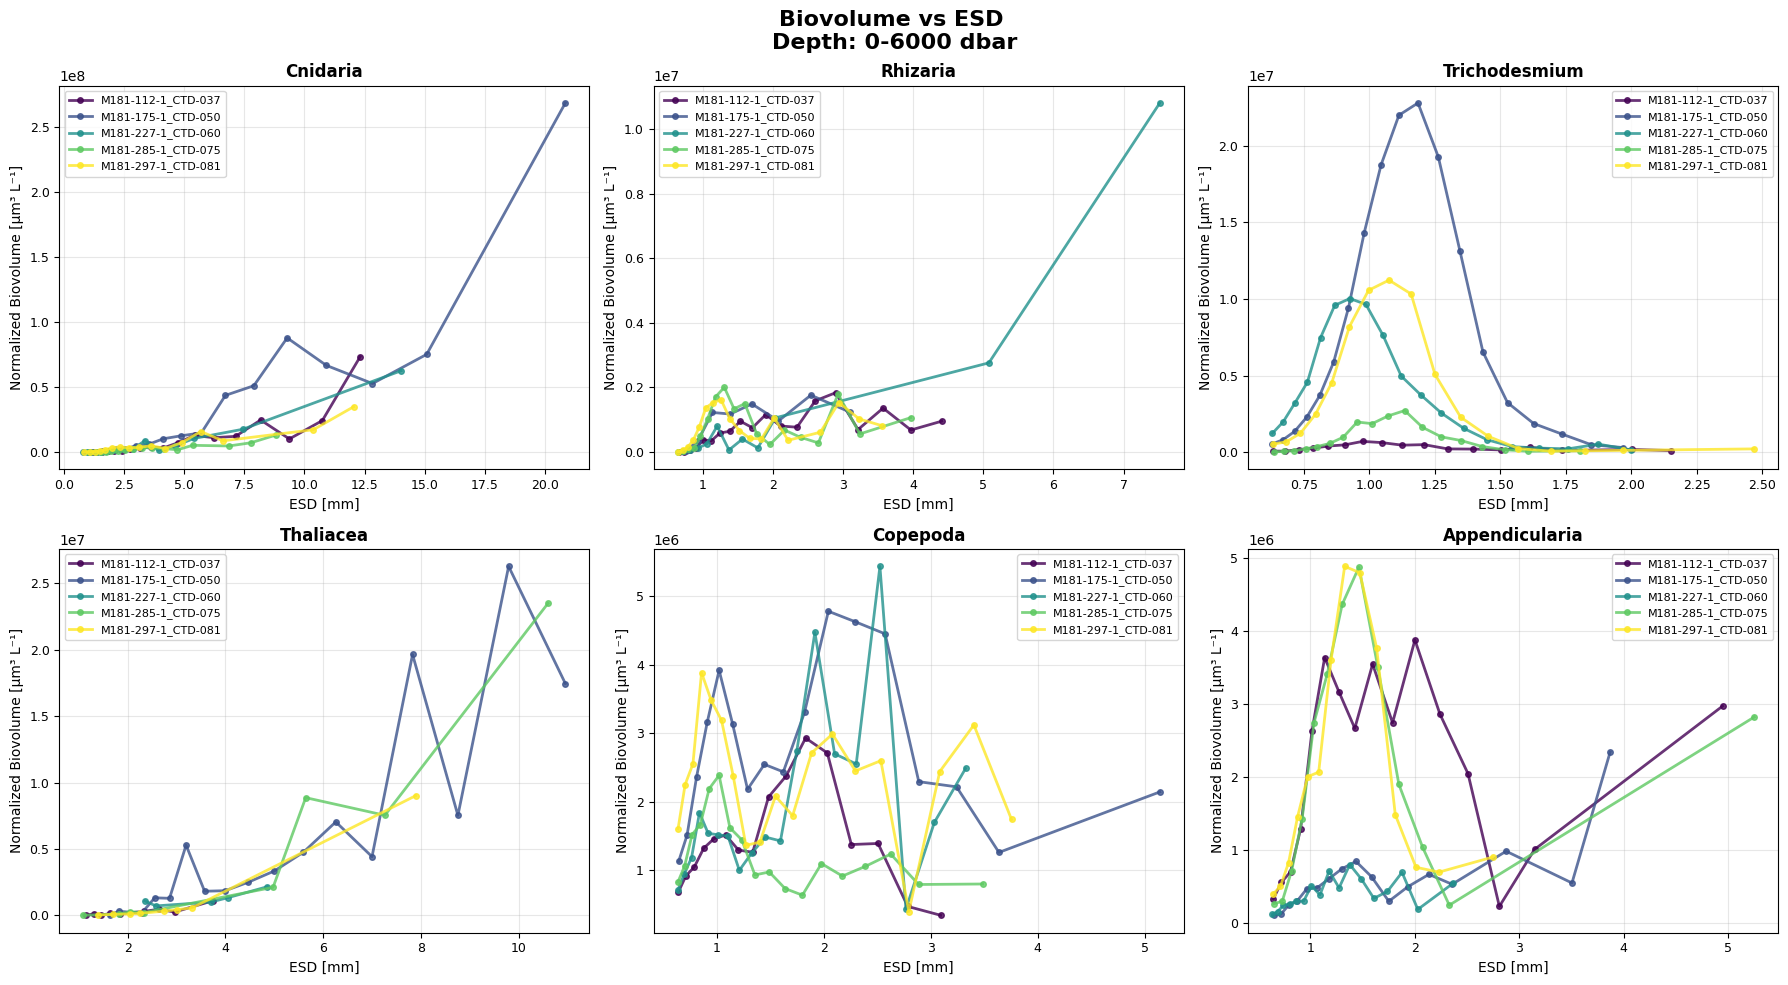

In [124]:
def plot_biovolume_vs_esd_multi_profile_top6(df, all_images_df, depth_range, plot_path, top6_groups):
    """
    Plot biovolume vs ESD for the top 6 biovolume groups in a multi-panel subplot.
    Each group gets its own subplot with different lines for each profile.
    Volume is normalized per profile and depth range.
    """
    pressure_min, pressure_max = depth_range

    # Extract and sort profiles by CTD number for consistent coloring
    profile_ctd_pairs = []
    for profile_id in df['sample_id'].unique():
        try:
            ctd_match = profile_id.split('_CTD-')[1].split('_')[0]
            ctd_number = int(ctd_match)
            profile_ctd_pairs.append((profile_id, ctd_number))
        except (IndexError, ValueError):
            profile_ctd_pairs.append((profile_id, 9999))
    profile_ctd_pairs.sort(key=lambda x: x[1])
    sorted_profiles = [pair[0] for pair in profile_ctd_pairs]
    #colors = plt.cm.Greens(np.linspace(0, 1, len(sorted_profiles)))
    colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_profiles)))

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    for group_idx, taxonomic_group in enumerate(top6_groups):
        ax = axes[group_idx]
        group_df = df[df["object_annotation_category"] == taxonomic_group]

        # Ensure object_pressure is numeric
        group_df = group_df.copy()
        group_df['object_pressure'] = pd.to_numeric(group_df['object_pressure'], errors='coerce')

        if group_df.empty:
            ax.text(0.5, 0.5, f'No data for\n{taxonomic_group}', 
                    transform=ax.transAxes, ha='center', va='center', fontsize=12)
            ax.set_title(f'{taxonomic_group}', fontsize=12, fontweight='bold')
            continue

        profiles_plotted = 0
        for i, (profile_id, color) in enumerate(zip(sorted_profiles, colors)):
            profile_data = group_df[
                (group_df['sample_id'] == profile_id) &
                (group_df['object_pressure'] >= pressure_min) & 
                (group_df['object_pressure'] < pressure_max)
            ]
            if len(profile_data) == 0:
                continue

            core_id = profile_id.split('_')[0] + '_' + profile_id.split('_')[1]
            profile_images = all_images_df[all_images_df['sample_id'] == core_id]
            profile_images_depth = profile_images[
                (profile_images['pressure'] >= pressure_min) & 
                (profile_images['pressure'] < pressure_max)
            ]
            sampling_volume_L = len(profile_images_depth) * VOLUME_PER_IMAGE_LITERS
            if sampling_volume_L == 0:
                continue

            if 'volume_um3' not in profile_data.columns:
                profile_data = profile_data.copy()
                profile_data['object_esd'] = pd.to_numeric(profile_data['object_esd'], errors='coerce')  # <-- add this line
                profile_data['volume_um3'] = (4/3) * np.pi * (profile_data['object_esd']/2)**3

            esd_min = profile_data['object_esd'].min()
            esd_max = profile_data['object_esd'].max()
            esd_bins_log = np.logspace(np.log10(esd_min), np.log10(esd_max), num=20)
            esd_bin_indices = np.digitize(profile_data['object_esd'], esd_bins_log)

            bin_centers = []
            biovolumes_normalized = []
            for bin_idx in range(1, len(esd_bins_log)):
                particles_in_bin = profile_data[esd_bin_indices == bin_idx]
                if len(particles_in_bin) > 0:
                    bin_center_um = np.sqrt(esd_bins_log[bin_idx-1] * esd_bins_log[bin_idx])
                    bin_center_mm = bin_center_um / 1000
                    total_biovolume = particles_in_bin['volume_um3'].sum()
                    bin_centers.append(bin_center_mm)
                    biovolumes_normalized.append(total_biovolume / sampling_volume_L)

            if len(bin_centers) > 0:
                non_zero_mask = np.array(biovolumes_normalized) > 0
                if np.any(non_zero_mask):
                    bin_centers_filtered = np.array(bin_centers)[non_zero_mask]
                    biovolumes_filtered = np.array(biovolumes_normalized)[non_zero_mask]
                    label = profile_id[:18]
                    ax.plot(bin_centers_filtered, biovolumes_filtered,
                            'o-', color=color, label=label,
                            linewidth=2, markersize=4, alpha=0.8)
                    profiles_plotted += 1

        ax.set_xlabel('ESD [mm]', fontsize=10)
        ax.set_ylabel('Normalized Biovolume [μm³ L⁻¹]', fontsize=10)
        ax.set_title(f'{taxonomic_group}', fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.tick_params(labelsize=9)
        if profiles_plotted > 0 and profiles_plotted <= 8:
            ax.legend(fontsize=8, loc='best')
        elif profiles_plotted > 8:
            ax.text(0.02, 0.98, f'{profiles_plotted} profiles\n(colored by CTD#)', 
                    transform=ax.transAxes, va='top', ha='left', 
                    fontsize=8, bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
        print(f"Plotted {taxonomic_group} with {profiles_plotted} profiles")

    for idx in range(len(top6_groups), len(axes)):
        axes[idx].set_visible(False)

    plt.suptitle(f'Biovolume vs ESD \nDepth: {pressure_min}-{pressure_max} dbar', 
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    filename = f'biovolume_vs_esd_top6_groups_{pressure_min}-{pressure_max}dbar_multiprofile_comparison.png'
    plt.savefig(os.path.join(plot_path, filename), dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

# Usage example:
plot_biovolume_vs_esd_multi_profile_top6(
    top6_validated_df, all_images_df,
    depth_range=(0, 6000),
    plot_path='/home/fanny/plots',
    top6_groups=top6_groups
)

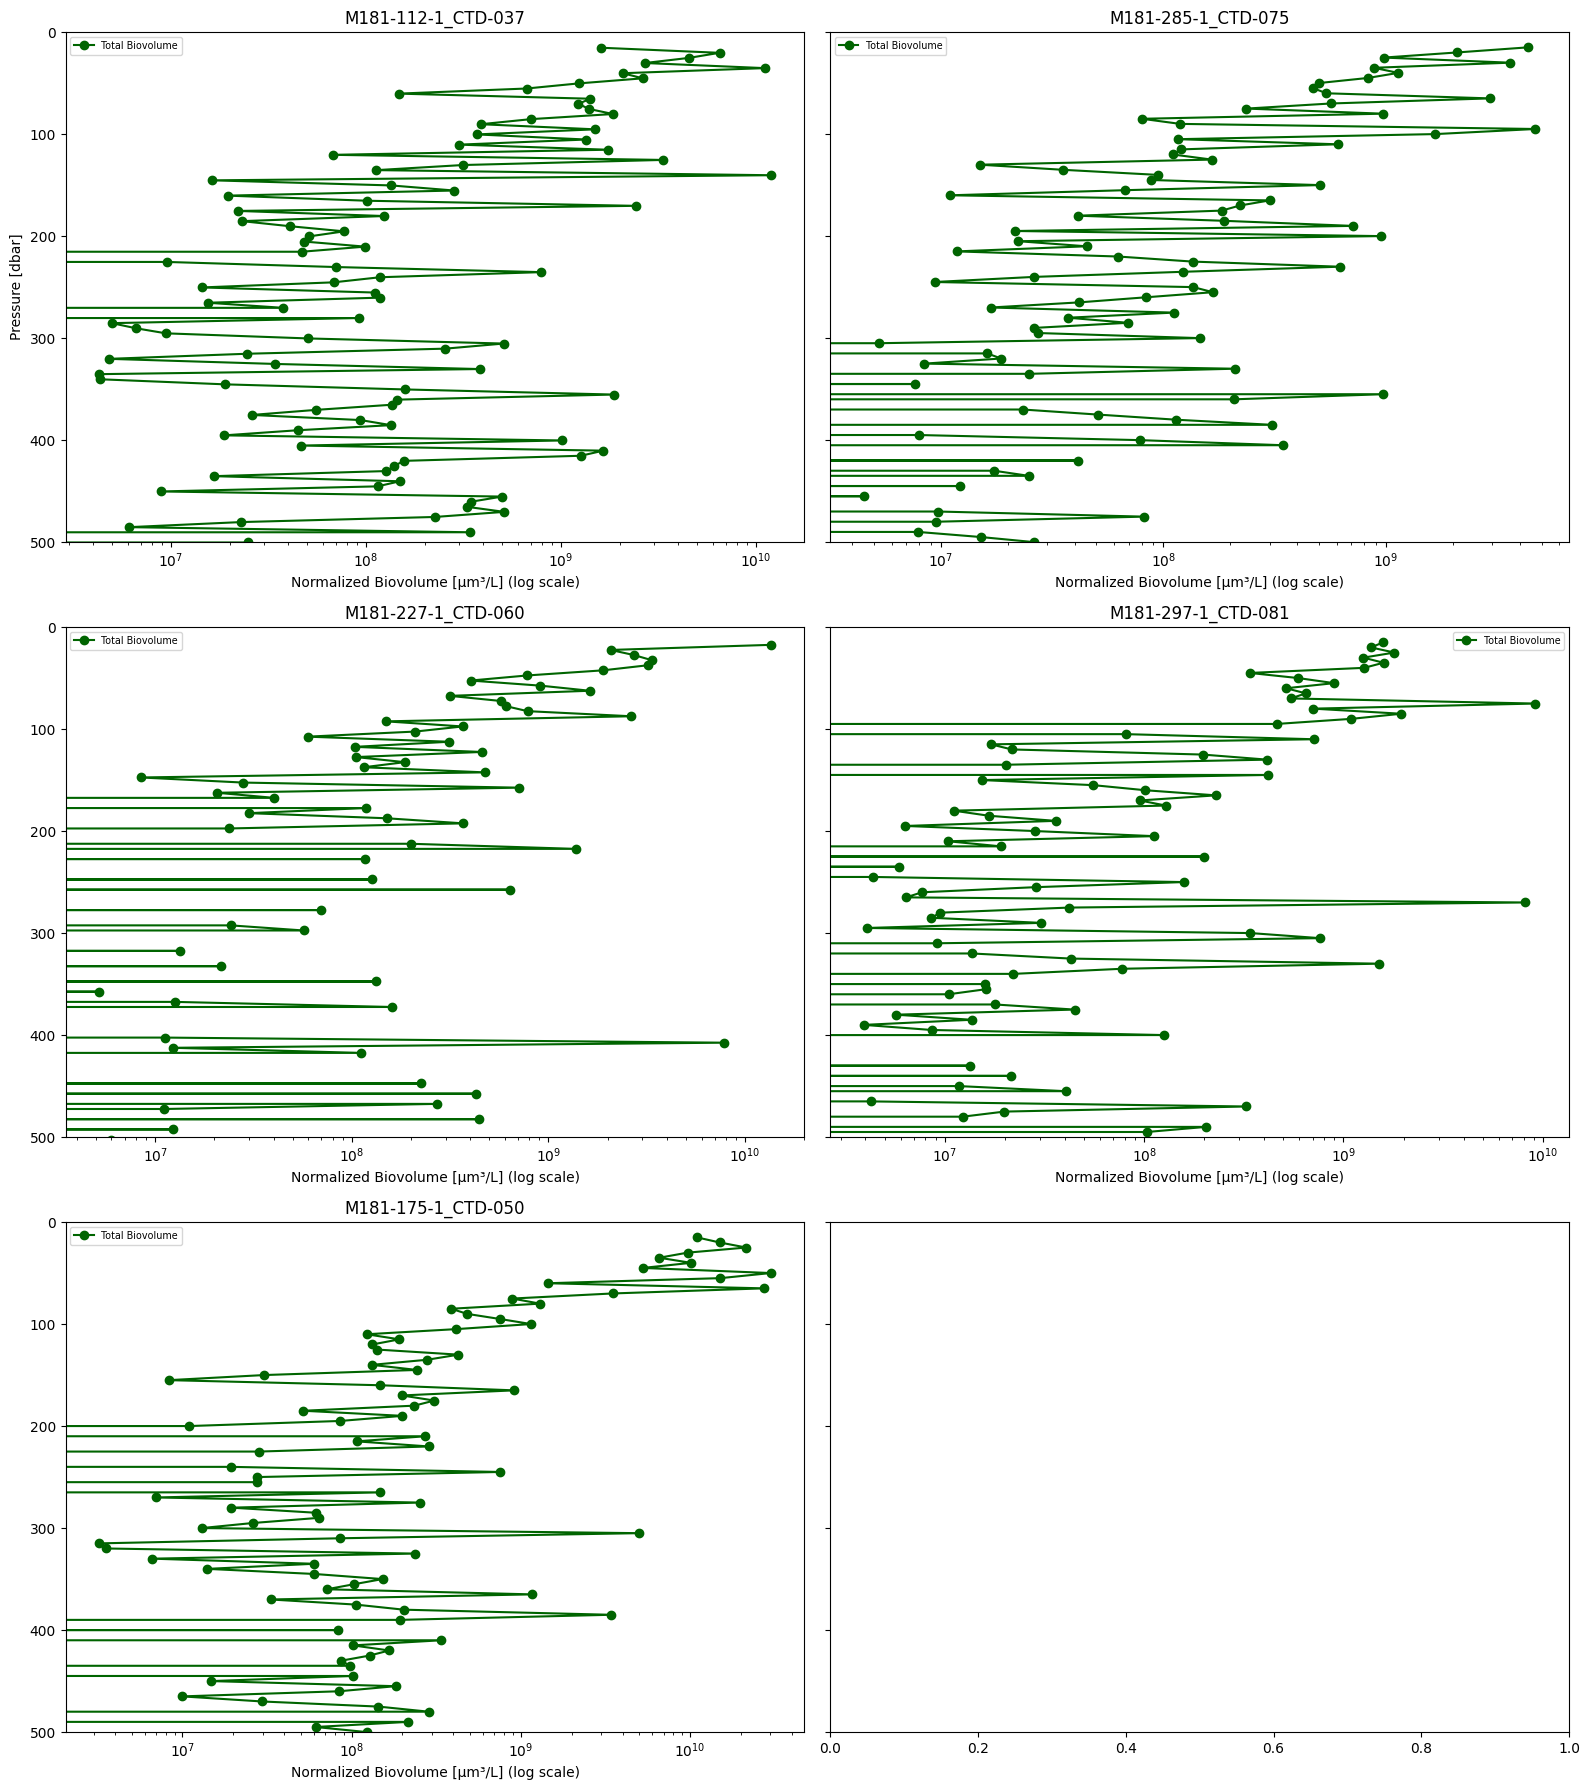

In [68]:
import numpy as np

def plot_total_biovolume_vs_pressure_multi_panel(df, all_images_df, depth_bin_size=5, max_depth=500, plot_path=None):
    import numpy as np
    import matplotlib.pyplot as plt

    profiles = list(df['sample_id'].unique())
    n_profiles = len(profiles)
    n_cols = 2  # You can change this to 3 or any number of columns you prefer
    n_rows = int(np.ceil(n_profiles / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8*n_cols, 6*n_rows), sharey=True)
    axes = axes.flatten() if n_profiles > 1 else [axes]

    for j, profile_name in enumerate(profiles):
        profile_df = df[df['sample_id'] == profile_name].copy()
        # Ensure object_pressure and object_esd are numeric and drop NaNs
        profile_df['object_pressure'] = pd.to_numeric(profile_df['object_pressure'], errors='coerce')
        profile_df['object_esd'] = pd.to_numeric(profile_df['object_esd'], errors='coerce')
        profile_df = profile_df.dropna(subset=['object_pressure', 'object_esd'])
        if not profile_df.empty:
            # Calculate biovolume if not present
            if 'volume_um3' not in profile_df.columns:
                profile_df['volume_um3'] = (4/3) * np.pi * (profile_df['object_esd']/2)**3

            # Bin by pressure
            min_p = profile_df['object_pressure'].min()
            max_p = min(max_depth, profile_df['object_pressure'].max())
            pressure_bins = np.arange(min_p, max_p + depth_bin_size, depth_bin_size)
            profile_df['pressure_bin'] = np.digitize(profile_df['object_pressure'], pressure_bins)

            # Get sampled volume per bin using image metadata
            core_id = profile_name.split('_')[0] + '_' + profile_name.split('_')[1]
            images_for_profile = all_images_df[all_images_df['sample_id'] == core_id].copy()
            images_for_profile['pressure_bin'] = np.digitize(images_for_profile['pressure'], pressure_bins)
            images_per_bin = images_for_profile.groupby('pressure_bin').size().reindex(range(1, len(pressure_bins)), fill_value=0)
            sampled_volume_L = images_per_bin * VOLUME_PER_IMAGE_LITERS

            # Sum biovolume per bin (all particles)
            biovolume_per_bin = profile_df.groupby('pressure_bin')['volume_um3'].sum().reindex(range(1, len(pressure_bins)), fill_value=0)
            biovolume_norm = biovolume_per_bin / sampled_volume_L.replace(0, np.nan)  # Avoid division by zero

            ax = axes[j] if n_profiles > 1 else axes
            #ax.plot(biovolume_norm, pressure_bins[1:], color='darkgreen', marker='o', label='Total Biovolume')
            ax.semilogx(biovolume_norm, pressure_bins[1:], color='darkgreen', marker='o', label='Total Biovolume')
            ax.invert_yaxis()
            ax.set_title(f"{profile_name[:18]}")
            ax.set_ylim(top=0, bottom=max_depth)
            ax.set_xlabel('Normalized Biovolume [μm³/L] (log scale)')
            if j == 0:
                ax.set_ylabel('Pressure [dbar]')
            ax.legend(fontsize='x-small')

    plt.tight_layout()
    if plot_path:
        plt.savefig(os.path.join(plot_path, 'total_biovolume_vs_pressure_multi_panel.png'), dpi=300, bbox_inches='tight')
    plt.show()


plot_total_biovolume_vs_pressure_multi_panel(
    top6_validated_df, all_images_df,
    depth_bin_size=5, max_depth=500,
    plot_path='/home/fanny/plots'
)

Profile M181-112-1_CTD-037_00°00S-008°00W_20220504-1758: min pressure = 10.34, max pressure = 5277.5
Profile M181-285-1_CTD-075_00°00S-039°00W_20220517-2024: min pressure = 10.009999999999998, max pressure = 4114.99
Profile M181-227-1_CTD-060_00°00S-027°00W_20220512-1748: min pressure = 12.43, max pressure = 3338.12
Profile M181-297-1_CTD-081_00°00S-041°50W_20220519-0218: min pressure = 9.97, max pressure = 3934.65
Profile M181-175-1_CTD-050_00°00S-019°00W_20220509-0543: min pressure = 9.97, max pressure = 4445.46


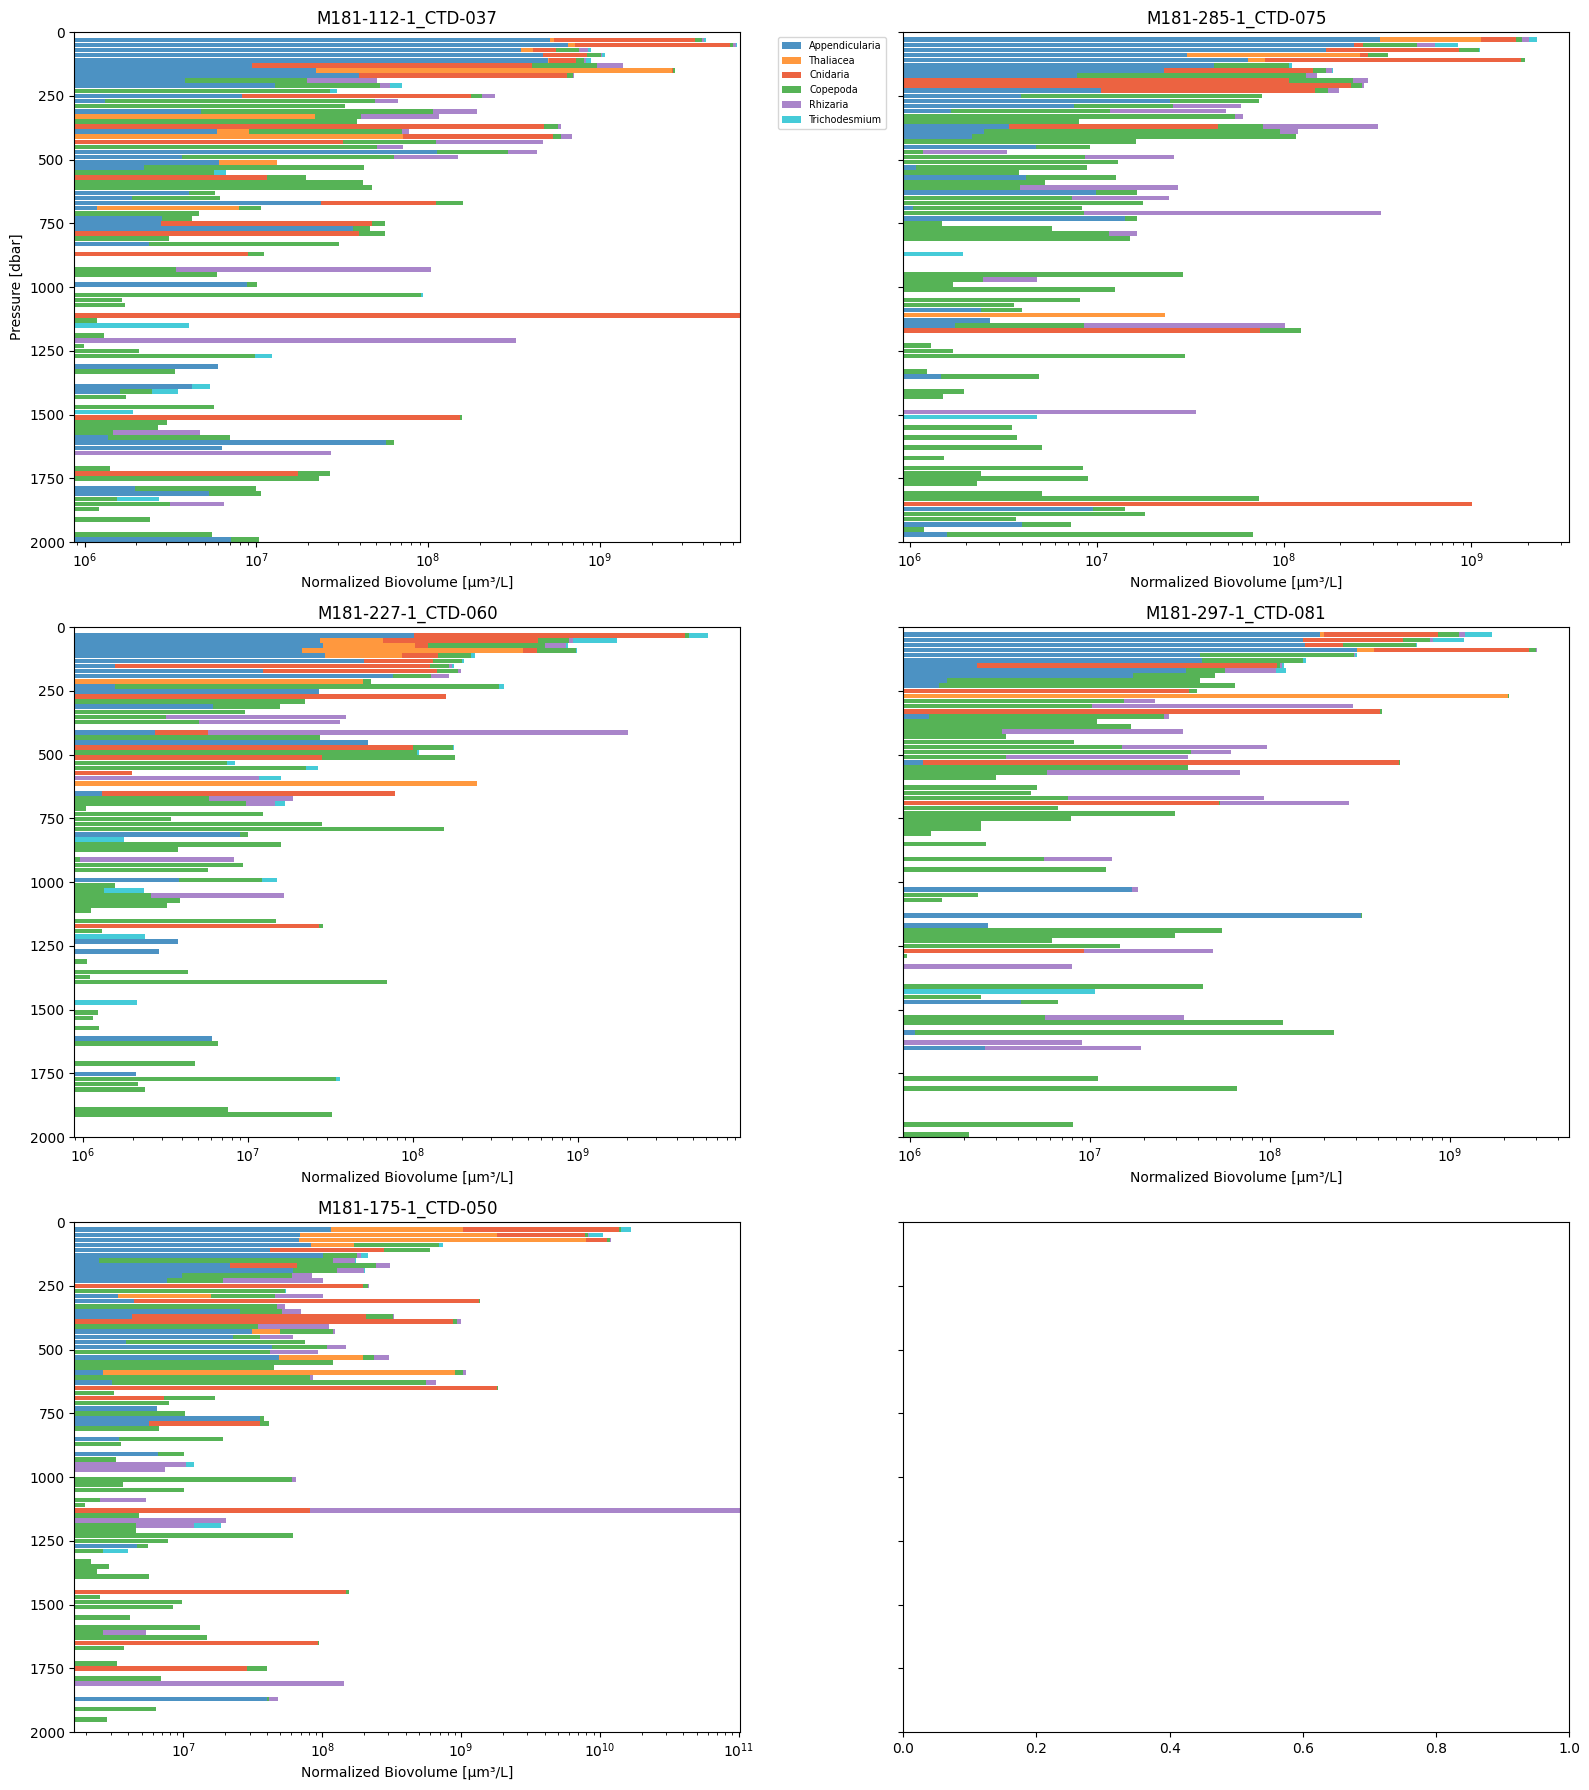

In [172]:
def plot_total_biovolume_vs_pressure_stacked(df, all_images_df, depth_bin_size=20, max_depth=2000, plot_path=None):
    import numpy as np
    import matplotlib.pyplot as plt

    # Define your main taxonomic groups (adjust as needed)
    main_groups = [
        "Appendicularia", "Thaliacea",
        "Cnidaria", "Copepoda",
        "Rhizaria", "Trichodesmium"
    ]
    # colors = plt.cm.Set3(np.linspace(0, 1, len(main_groups)))
    # color_dict = dict(zip(main_groups, colors))
    group_colors = [
        "#1f77b4", "#ff7f0e", "#e83c12", "#2ca02c", "#9467bd", "#17becf"
    ]
    color_dict = dict(zip(main_groups, group_colors))

    profiles = list(df['sample_id'].unique())
    n_profiles = len(profiles)
    n_cols = 2
    n_rows = int(np.ceil(n_profiles / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8*n_cols, 6*n_rows), sharey=True)
    axes = axes.flatten() if n_profiles > 1 else [axes]

    for j, profile_name in enumerate(profiles):
        profile_df = df[df['sample_id'] == profile_name].copy()
        profile_df['object_pressure'] = pd.to_numeric(profile_df['object_pressure'], errors='coerce')
        profile_df['object_esd'] = pd.to_numeric(profile_df['object_esd'], errors='coerce')
        profile_df = profile_df.dropna(subset=['object_pressure', 'object_esd'])
        if not profile_df.empty:
            if 'volume_um3' not in profile_df.columns:
                profile_df['volume_um3'] = (4/3) * np.pi * (profile_df['object_esd']/2)**3

            min_p = profile_df['object_pressure'].min()
            print(f"Profile {profile_name}: min pressure = {min_p}, max pressure = {profile_df['object_pressure'].max()}")
            max_p = min(max_depth, profile_df['object_pressure'].max())
            pressure_bins = np.arange(min_p, max_p + depth_bin_size, depth_bin_size)
            profile_df['pressure_bin'] = np.digitize(profile_df['object_pressure'], pressure_bins)

            core_id = profile_name.split('_')[0] + '_' + profile_name.split('_')[1]
            images_for_profile = all_images_df[all_images_df['sample_id'] == core_id].copy()
            images_for_profile['pressure_bin'] = np.digitize(images_for_profile['pressure'], pressure_bins)
            images_per_bin = images_for_profile.groupby('pressure_bin').size().reindex(range(1, len(pressure_bins)), fill_value=0)
            sampled_volume_L = images_per_bin * VOLUME_PER_IMAGE_LITERS

            # Prepare stacked data for each group
            stacked_data = []
            for group in main_groups:
                group_bin_sum = profile_df[profile_df['object_annotation_category'] == group].groupby('pressure_bin')['volume_um3'].sum().reindex(range(1, len(pressure_bins)), fill_value=0)
                group_norm = group_bin_sum / sampled_volume_L.replace(0, np.nan)
                stacked_data.append(group_norm.values)

            ax = axes[j] if n_profiles > 1 else axes
            # Stacked horizontal bar plot
            bottom = np.zeros(len(pressure_bins)-1)
            for idx, group in enumerate(main_groups):
                values = stacked_data[idx]
                ax.barh(pressure_bins[1:], values, left=bottom, height=depth_bin_size*0.9, color=color_dict[group], label=group, alpha=0.8)
                bottom += np.nan_to_num(values)

            ax.set_xscale('log')  # Logarithmic scale for biovolume
            ax.invert_yaxis()
            ax.set_title(f"{profile_name[:18]}")
            ax.set_ylim(top=0, bottom=max_depth)
            ax.set_xlabel('Normalized Biovolume [μm³/L]')
            if j == 0:
                ax.set_ylabel('Pressure [dbar]')
            if j == 0:
                ax.legend(fontsize='x-small', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    if plot_path:
        plt.savefig(os.path.join(plot_path, 'total_biovolume_vs_pressure_stacked_multi_panel.png'), dpi=300, bbox_inches='tight')
    plt.show()

# Usage:
plot_total_biovolume_vs_pressure_stacked(
    top6_validated_df, all_images_df,
    depth_bin_size=20, max_depth=2000,
    plot_path='/home/fanny/plots'
)

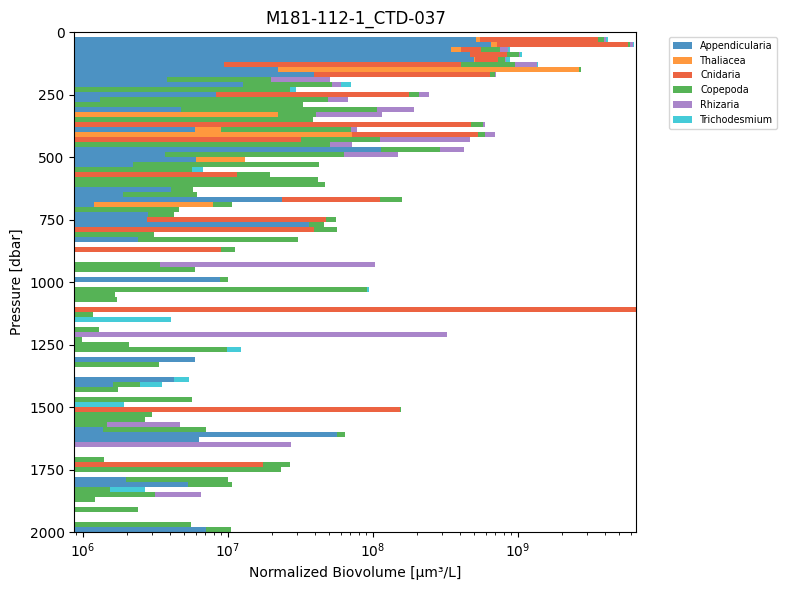

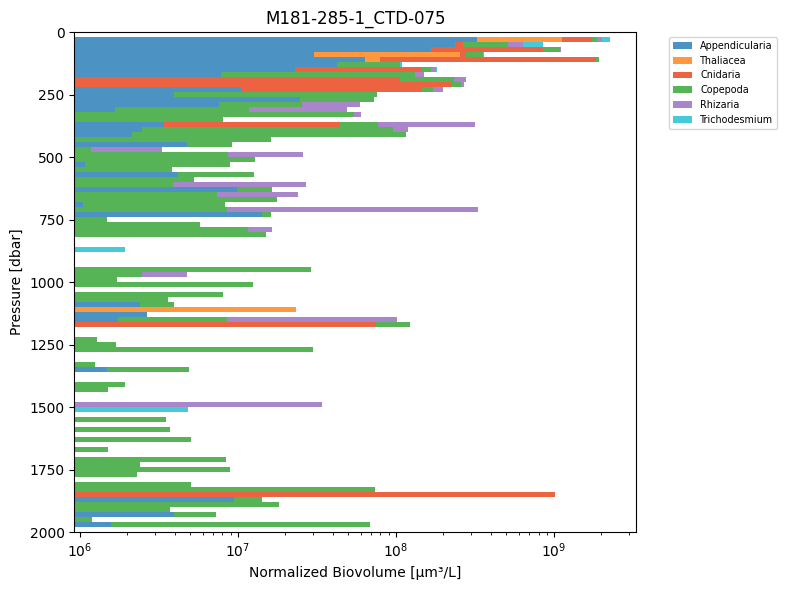

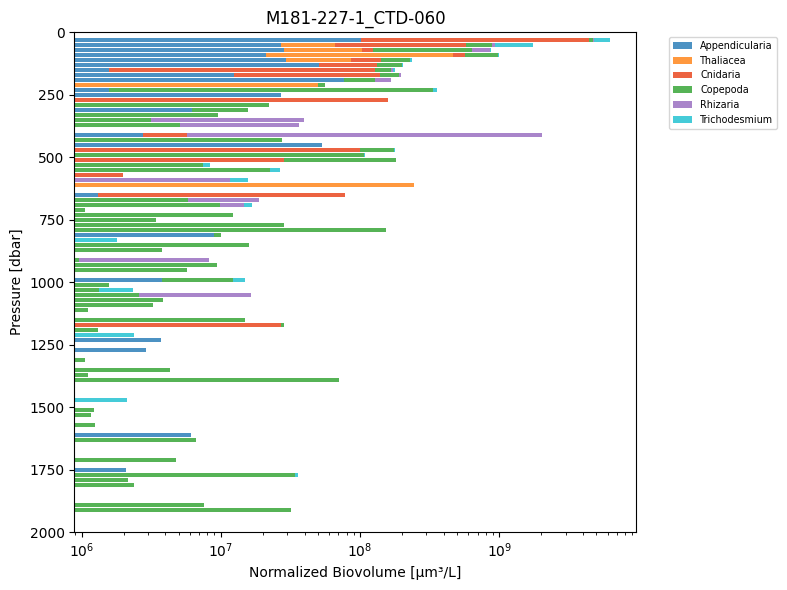

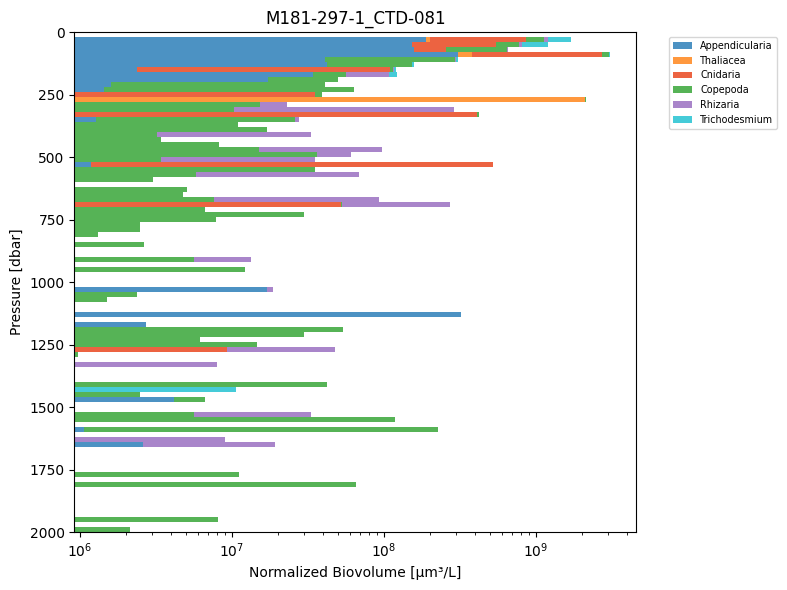

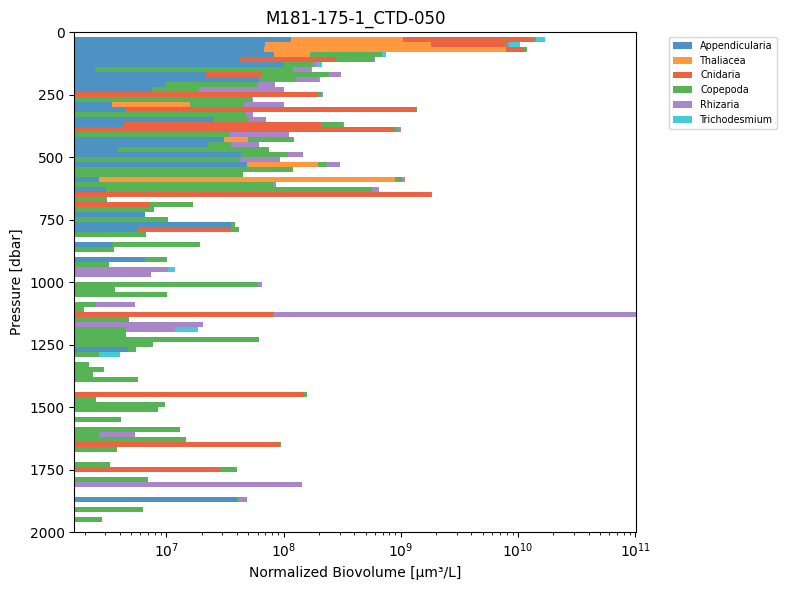

In [168]:
def plot_total_biovolume_vs_pressure_stacked_individual(df, all_images_df, depth_bin_size=20, max_depth=2000, plot_path=None):
    import numpy as np
    import matplotlib.pyplot as plt

    main_groups = [
        "Appendicularia", "Thaliacea",
        "Cnidaria", "Copepoda",
        "Rhizaria", "Trichodesmium"
    ]
    group_colors = [
        "#1f77b4", "#ff7f0e", "#e83c12", "#2ca02c", "#9467bd", "#17becf"
    ]
    color_dict = dict(zip(main_groups, group_colors))

    profiles = list(df['sample_id'].unique())

    for profile_name in profiles:
        profile_df = df[df['sample_id'] == profile_name].copy()
        profile_df['object_pressure'] = pd.to_numeric(profile_df['object_pressure'], errors='coerce')
        profile_df['object_esd'] = pd.to_numeric(profile_df['object_esd'], errors='coerce')
        profile_df = profile_df.dropna(subset=['object_pressure', 'object_esd'])
        if not profile_df.empty:
            if 'volume_um3' not in profile_df.columns:
                profile_df['volume_um3'] = (4/3) * np.pi * (profile_df['object_esd']/2)**3

            min_p = profile_df['object_pressure'].min()
            max_p = min(max_depth, profile_df['object_pressure'].max())
            pressure_bins = np.arange(min_p, max_p + depth_bin_size, depth_bin_size)
            profile_df['pressure_bin'] = np.digitize(profile_df['object_pressure'], pressure_bins)

            core_id = profile_name.split('_')[0] + '_' + profile_name.split('_')[1]
            images_for_profile = all_images_df[all_images_df['sample_id'] == core_id].copy()
            images_for_profile['pressure_bin'] = np.digitize(images_for_profile['pressure'], pressure_bins)
            images_per_bin = images_for_profile.groupby('pressure_bin').size().reindex(range(1, len(pressure_bins)), fill_value=0)
            sampled_volume_L = images_per_bin * VOLUME_PER_IMAGE_LITERS

            # Prepare stacked data for each group
            stacked_data = []
            for group in main_groups:
                group_bin_sum = profile_df[profile_df['object_annotation_category'] == group].groupby('pressure_bin')['volume_um3'].sum().reindex(range(1, len(pressure_bins)), fill_value=0)
                group_norm = group_bin_sum / sampled_volume_L.replace(0, np.nan)
                stacked_data.append(group_norm.values)

            # Create a new figure for each profile
            fig, ax = plt.subplots(figsize=(8, 6))
            bottom = np.zeros(len(pressure_bins)-1)
            for idx, group in enumerate(main_groups):
                values = stacked_data[idx]
                ax.barh(pressure_bins[1:], values, left=bottom, height=depth_bin_size*0.9, color=color_dict[group], label=group, alpha=0.8)
                bottom += np.nan_to_num(values)

            ax.set_xscale('log')
            ax.invert_yaxis()
            ax.set_title(f"{profile_name[:18]}")
            ax.set_ylim(top=0, bottom=max_depth)
            ax.set_xlabel('Normalized Biovolume [μm³/L]')
            ax.set_ylabel('Pressure [dbar]')
            ax.legend(fontsize='x-small', bbox_to_anchor=(1.05, 1), loc='upper left')

            plt.tight_layout()
            if plot_path:
                filename = f"total_biovolume_vs_pressure_stacked_{profile_name[:18]}.png"
                plt.savefig(os.path.join(plot_path, filename), dpi=300, bbox_inches='tight')
            plt.show()
            plt.close()


plot_total_biovolume_vs_pressure_stacked_individual(
    top6_validated_df, all_images_df,
    depth_bin_size=20, max_depth=2000,
    plot_path='/home/fanny/plots'
)

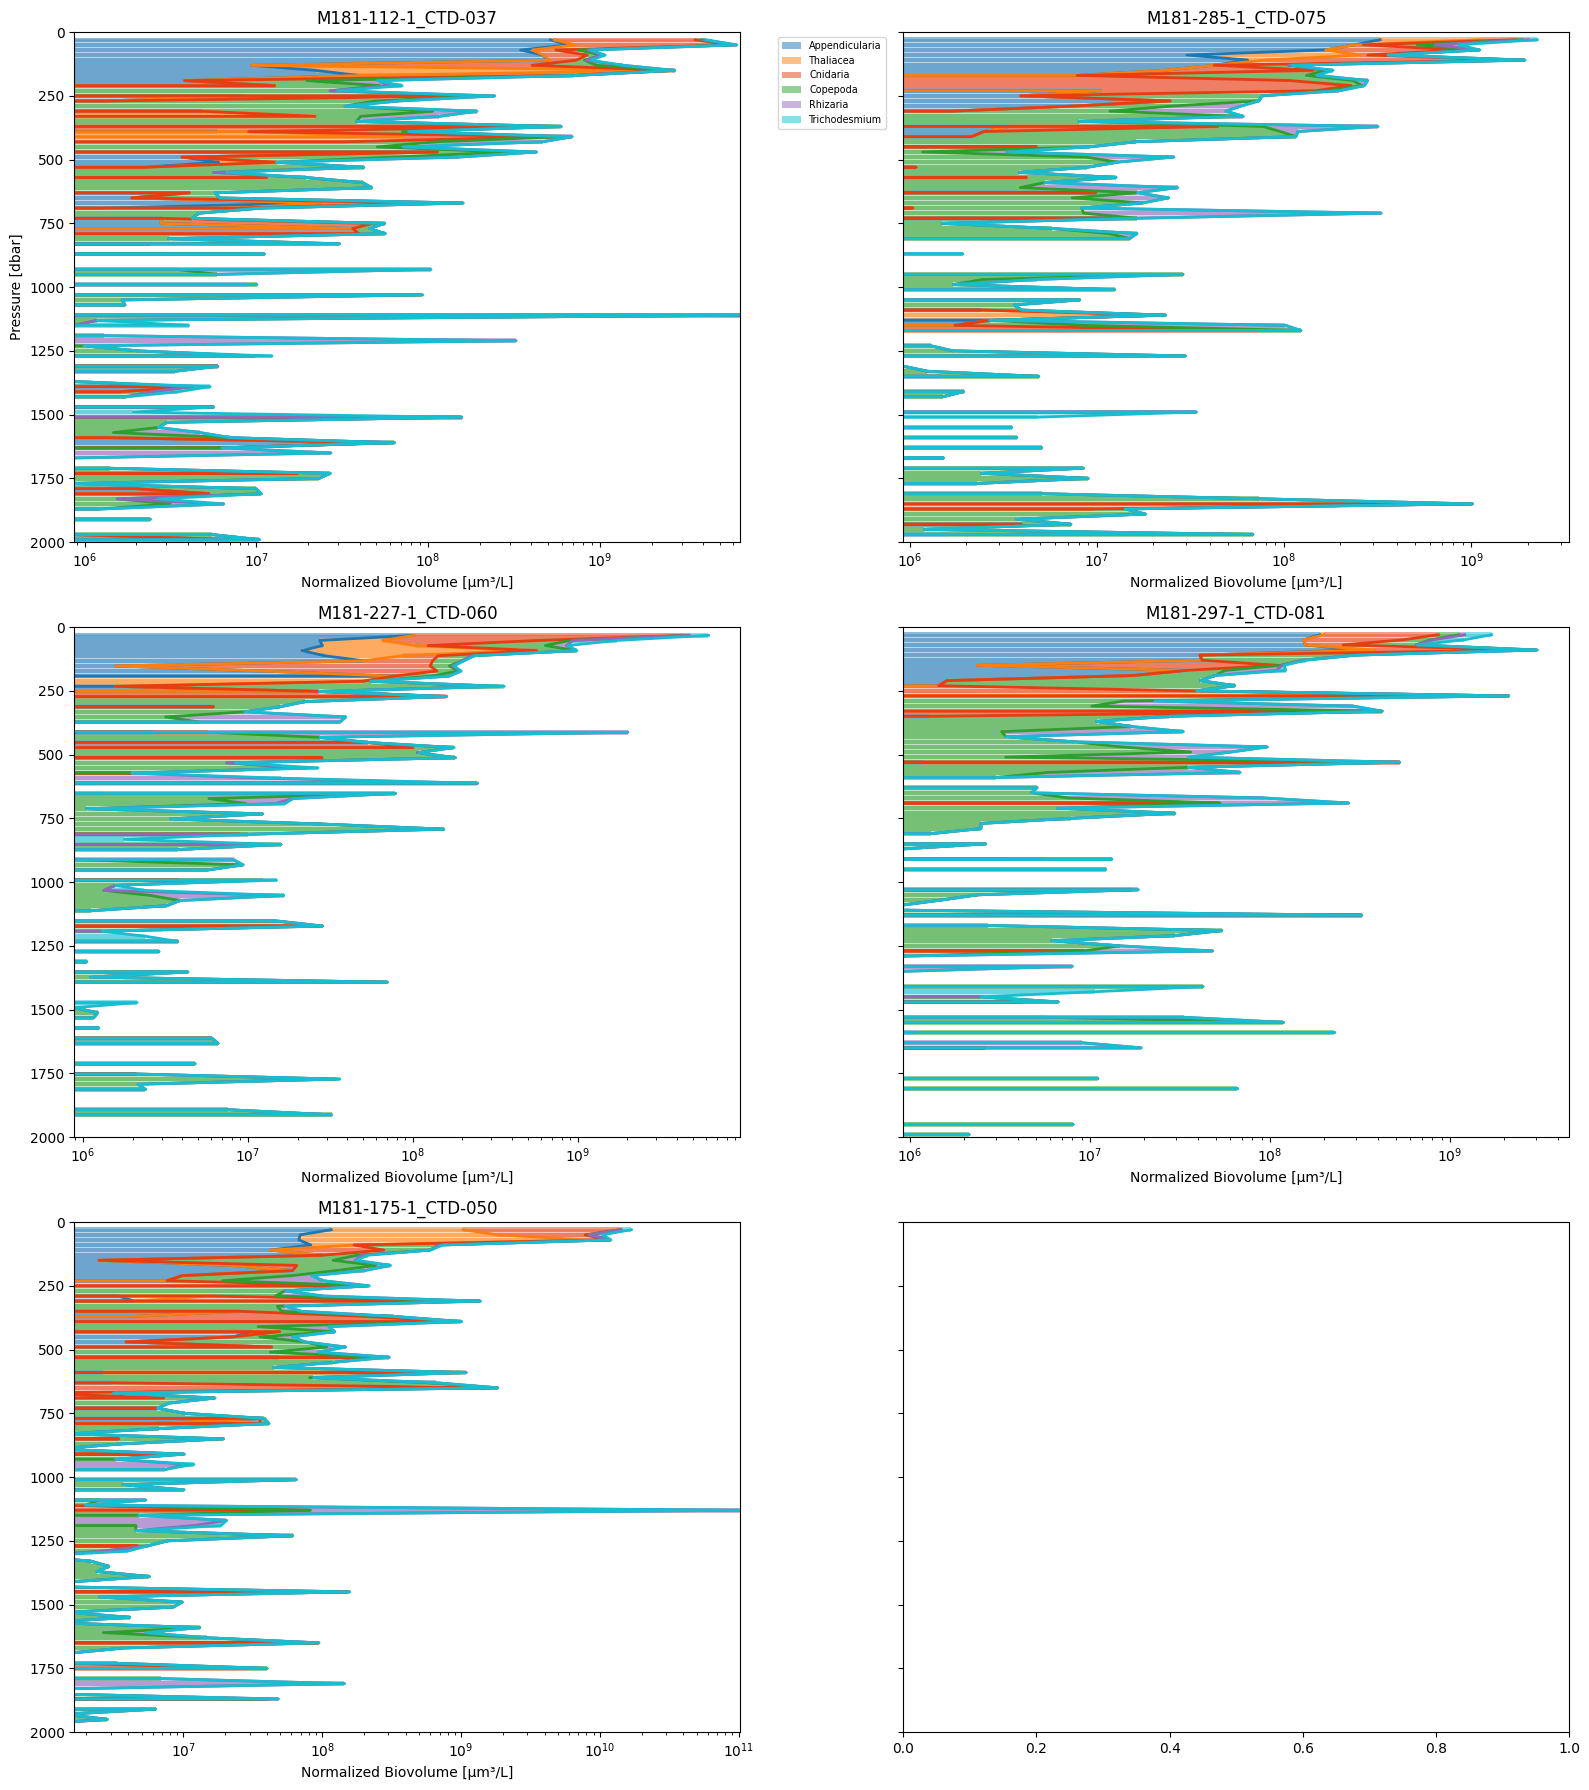

In [122]:
def plot_total_biovolume_vs_pressure_stacked_overlay(df, all_images_df, main_groups, color_dict, depth_bin_size=20, max_depth=2000, plot_path=None):
    import numpy as np
    import matplotlib.pyplot as plt

    profiles = list(df['sample_id'].unique())
    n_profiles = len(profiles)
    n_cols = 2
    n_rows = int(np.ceil(n_profiles / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8*n_cols, 6*n_rows), sharey=True)
    axes = axes.flatten() if n_profiles > 1 else [axes]

    for j, profile_name in enumerate(profiles):
        profile_df = df[df['sample_id'] == profile_name].copy()
        profile_df['object_pressure'] = pd.to_numeric(profile_df['object_pressure'], errors='coerce')
        profile_df['object_esd'] = pd.to_numeric(profile_df['object_esd'], errors='coerce')
        profile_df = profile_df.dropna(subset=['object_pressure', 'object_esd'])
        if not profile_df.empty:
            if 'volume_um3' not in profile_df.columns:
                profile_df['volume_um3'] = (4/3) * np.pi * (profile_df['object_esd']/2)**3

            min_p = profile_df['object_pressure'].min()
            max_p = min(max_depth, profile_df['object_pressure'].max())
            pressure_bins = np.arange(min_p, max_p + depth_bin_size, depth_bin_size)
            profile_df['pressure_bin'] = np.digitize(profile_df['object_pressure'], pressure_bins)

            core_id = profile_name.split('_')[0] + '_' + profile_name.split('_')[1]
            images_for_profile = all_images_df[all_images_df['sample_id'] == core_id].copy()
            images_for_profile['pressure_bin'] = np.digitize(images_for_profile['pressure'], pressure_bins)
            images_per_bin = images_for_profile.groupby('pressure_bin').size().reindex(range(1, len(pressure_bins)), fill_value=0)
            sampled_volume_L = images_per_bin * VOLUME_PER_IMAGE_LITERS

            # Prepare stacked data for each group
            stacked_data = []
            for group in main_groups:
                group_bin_sum = profile_df[profile_df['object_annotation_category'] == group].groupby('pressure_bin')['volume_um3'].sum().reindex(range(1, len(pressure_bins)), fill_value=0)
                group_norm = group_bin_sum / sampled_volume_L.replace(0, np.nan)
                stacked_data.append(group_norm.values)

            ax = axes[j] if n_profiles > 1 else axes
            # Stacked horizontal bar plot
            bottom = np.zeros(len(pressure_bins)-1)
            for idx, group in enumerate(main_groups):
                values = stacked_data[idx]
                ax.barh(pressure_bins[1:], values, left=bottom, height=depth_bin_size*0.9, color=color_dict[group], label=group, alpha=0.5)
                bottom += np.nan_to_num(values)

            # Overlay stacked lines/areas
            bottom_line = np.zeros(len(pressure_bins)-1)
            for idx, group in enumerate(main_groups):
                values = stacked_data[idx]
                ax.plot(values + bottom_line, pressure_bins[1:], color=color_dict[group], linewidth=2)
                ax.fill_betweenx(pressure_bins[1:], bottom_line, bottom_line + values, color=color_dict[group], alpha=0.3)
                bottom_line += np.nan_to_num(values)

            ax.set_xscale('log')
            ax.invert_yaxis()
            ax.set_title(f"{profile_name[:18]}")
            ax.set_ylim(top=0, bottom=max_depth)
            ax.set_xlabel('Normalized Biovolume [μm³/L]')
            if j == 0:
                ax.set_ylabel('Pressure [dbar]')
            if j == 0:
                ax.legend(fontsize='x-small', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    if plot_path:
        plt.savefig(os.path.join(plot_path, 'total_biovolume_vs_pressure_stacked_overlay_multi_panel.png'), dpi=300, bbox_inches='tight')
    plt.show()

# Usage:
main_groups = [
    "Appendicularia", "Thaliacea",
    "Cnidaria", "Copepoda",
    "Rhizaria", "Trichodesmium"
]
group_colors = [
    "#1f77b4", "#ff7f0e", "#e83c12", "#2ca02c", "#9467bd", "#17becf"
]
color_dict = dict(zip(main_groups, group_colors))

plot_total_biovolume_vs_pressure_stacked_overlay(
    top6_validated_df, all_images_df,
    main_groups, color_dict,
    depth_bin_size=20, max_depth=2000,
    plot_path='/home/fanny/plots'
)

In [166]:
def plot_total_biovolume_vs_depth_stacked_individual_uvp5(df, depth_bin_size=20, max_depth=2000, plot_path=None):
    
    df = df[df['object_annotation_status'] == 'validated'].copy()
    main_groups = [
        "Appendicularia", "Thaliacea",
        "Cnidaria<Metazoa", "Copepoda<Maxillopoda",
        "Rhizaria", "Trichodesmium"
    ]
    group_colors = [
        "#1f77b4", "#ff7f0e", "#e83c12", "#2ca02c", "#9467bd", "#17becf"
    ]
    color_dict = dict(zip(main_groups, group_colors))

    profiles = list(df['sample_id'].unique())

    for profile_name in profiles:
        profile_df = df[df['sample_id'] == profile_name].copy()
        profile_df['object_depth_min'] = pd.to_numeric(profile_df['object_depth_min'], errors='coerce')
        profile_df['object_depth_max'] = pd.to_numeric(profile_df['object_depth_max'], errors='coerce')
        profile_df['object_esd'] = pd.to_numeric(profile_df['object_esd'], errors='coerce')
        profile_df = profile_df.dropna(subset=['object_depth_min', 'object_depth_max', 'object_esd'])
        if not profile_df.empty:
            if 'volume_um3' not in profile_df.columns:
                profile_df['volume_um3'] = (4/3) * np.pi * (profile_df['object_esd']/2)**3

            min_depth = profile_df['object_depth_min'].min()
            max_depth_actual = min(max_depth, profile_df['object_depth_max'].max())
            depth_bins = np.arange(min_depth, max_depth_actual + depth_bin_size, depth_bin_size)
            profile_df['depth_bin'] = np.digitize(profile_df['object_depth_min'], depth_bins)

            # Prepare stacked data for each group (already normalized)
            stacked_data = []
            for group in main_groups:
                group_bin_sum = profile_df[profile_df['object_annotation_category'] == group] \
                    .groupby('depth_bin')['volume_um3'].sum().reindex(range(1, len(depth_bins)), fill_value=0)
                stacked_data.append(group_bin_sum.values)

            # Create a new figure for each profile
            fig, ax = plt.subplots(figsize=(8, 6))
            bottom = np.zeros(len(depth_bins)-1)
            for idx, group in enumerate(main_groups):
                values = stacked_data[idx]
                ax.barh(depth_bins[1:], values, left=bottom, height=depth_bin_size*0.9,
                        color=color_dict[group], label=group, alpha=0.8)
                bottom += np.nan_to_num(values)

            ax.set_xscale('log')
            ax.invert_yaxis()
            ax.set_title(f"{profile_name[:18]}")
            ax.set_ylim(top=0, bottom=max_depth)
            ax.set_xlabel('Biovolume [μm³/L]')
            ax.set_ylabel('Depth [m]')
            ax.legend(fontsize='x-small', bbox_to_anchor=(1.05, 1), loc='upper left')

            plt.tight_layout()
            if plot_path:
                filename = f"biovolume_vs_depth_stacked_{profile_name[:18]}.png"
                plt.savefig(os.path.join(plot_path, filename), dpi=300, bbox_inches='tight')
            plt.show()
            plt.close()

In [137]:
uvp5_columns_list = uvp5_df.columns.tolist()
print(uvp5_columns_list)

['object_id', 'object_lat', 'object_lon', 'object_date', 'object_time', 'object_link', 'object_depth_min', 'object_depth_max', 'object_annotation_status', 'object_annotation_person_name', 'object_annotation_person_email', 'object_annotation_date', 'object_annotation_time', 'object_annotation_category', 'object_annotation_hierarchy', 'complement_info', 'object_area', 'object_mean', 'object_stddev', 'object_mode', 'object_min', 'object_max', 'object_x', 'object_y', 'object_xm', 'object_ym', 'object_perim.', 'object_bx', 'object_by', 'object_width', 'object_height', 'object_major', 'object_minor', 'object_angle', 'object_circ.', 'object_feret', 'object_intden', 'object_median', 'object_skew', 'object_kurt', 'object_%area', 'object_xstart', 'object_ystart', 'object_area_exc', 'object_fractal', 'object_skelarea', 'object_slope', 'object_histcum1', 'object_histcum2', 'object_histcum3', 'object_xmg5', 'object_ymg5', 'object_nb1', 'object_nb2', 'object_nb3', 'object_compentropy', 'object_compm

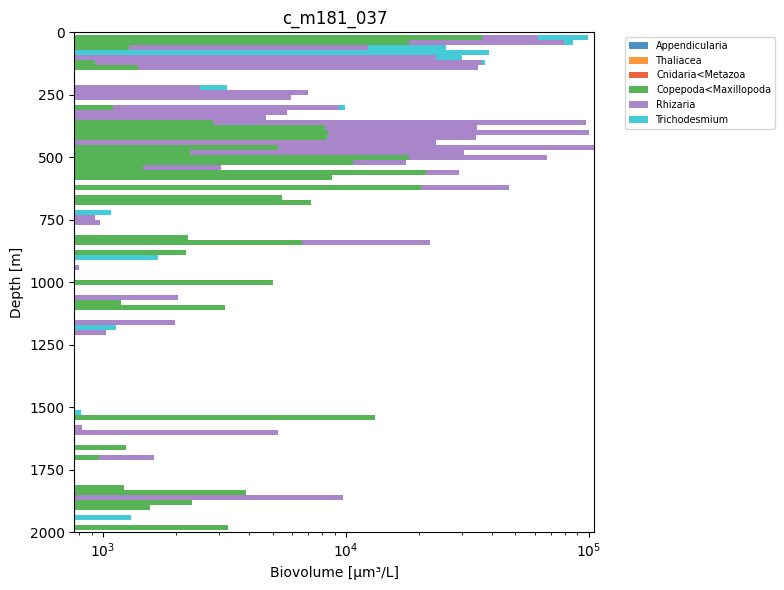

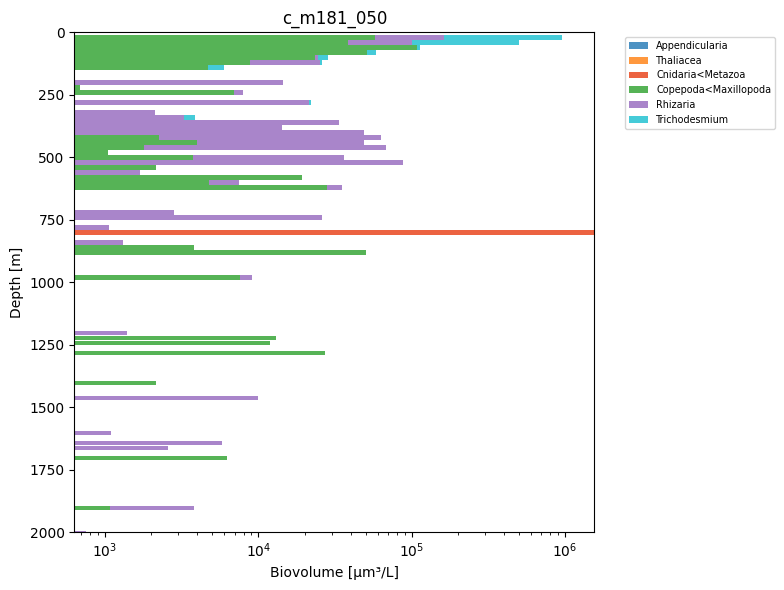

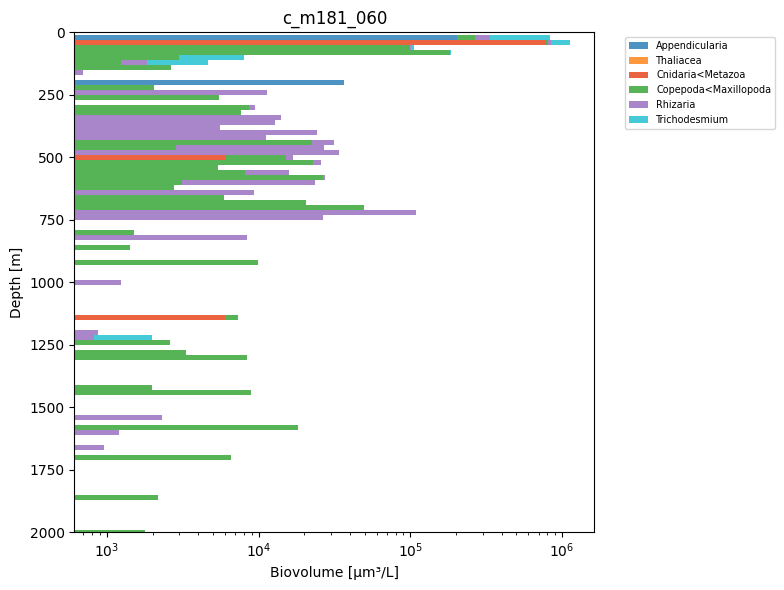

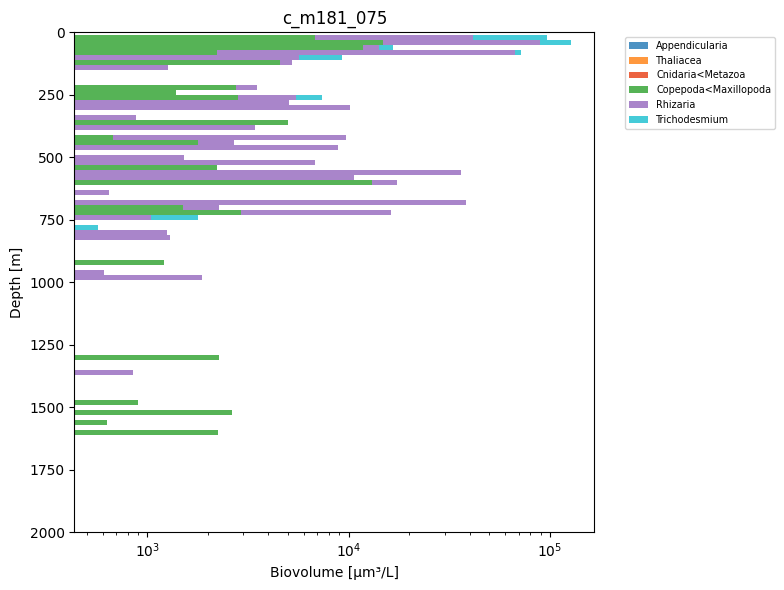

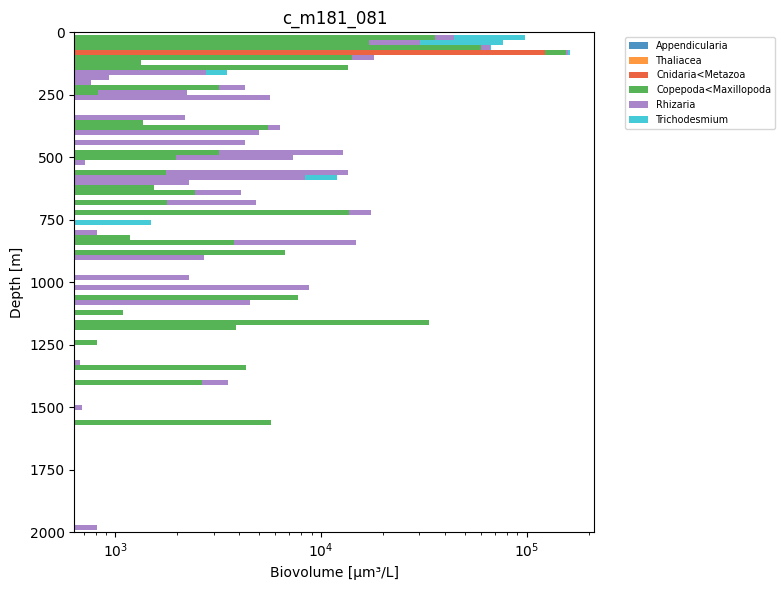

In [176]:
uvp5_df = pd.read_csv('/home/fanny/Profiles/UVP5_export__TSV_17905_20250826_1223/ecotaxa_export__TSV_17905_20250826_1223.tsv', sep='\t')
#combine 
uvp5_df['object_annotation_category'] = uvp5_df['object_annotation_category'].replace({
    'Calanoida': 'Copepoda<Maxillopoda',
})

#plot_taxonomic_composition_5_profiles_uvp5(uvp5_df, plot_path='/home/fanny/plots')

plot_total_biovolume_vs_depth_stacked_individual_uvp5(
    uvp5_df,
    depth_bin_size=20, max_depth=2000,
    plot_path='/home/fanny/plots'
)

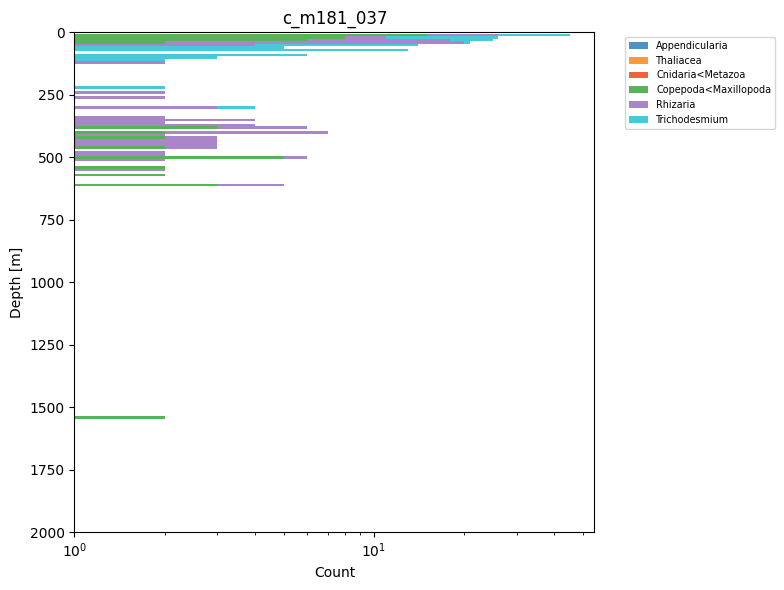

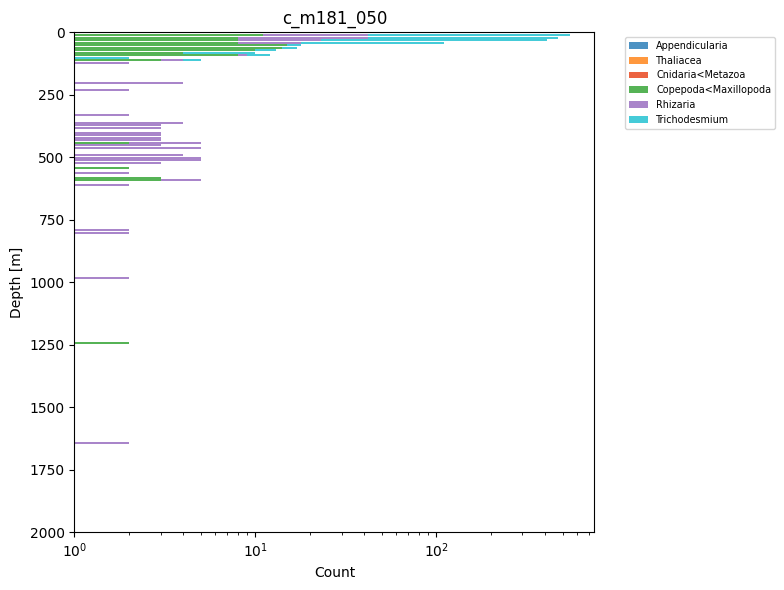

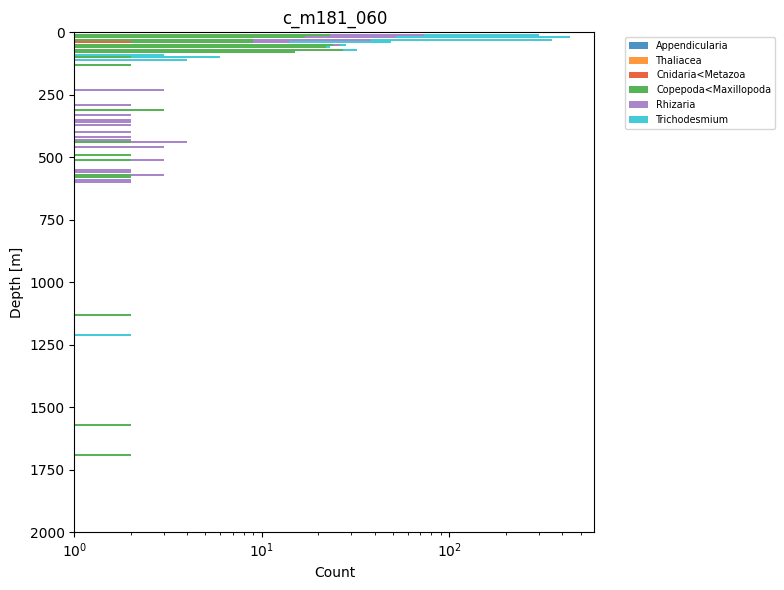

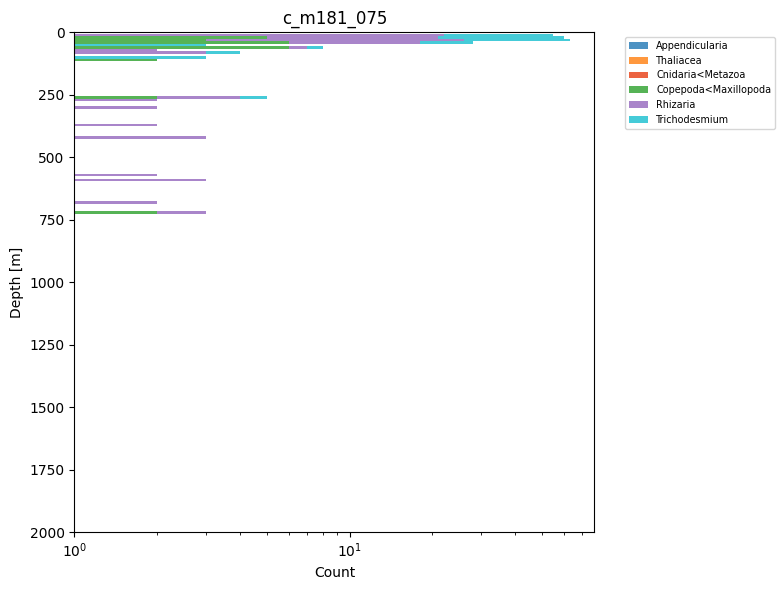

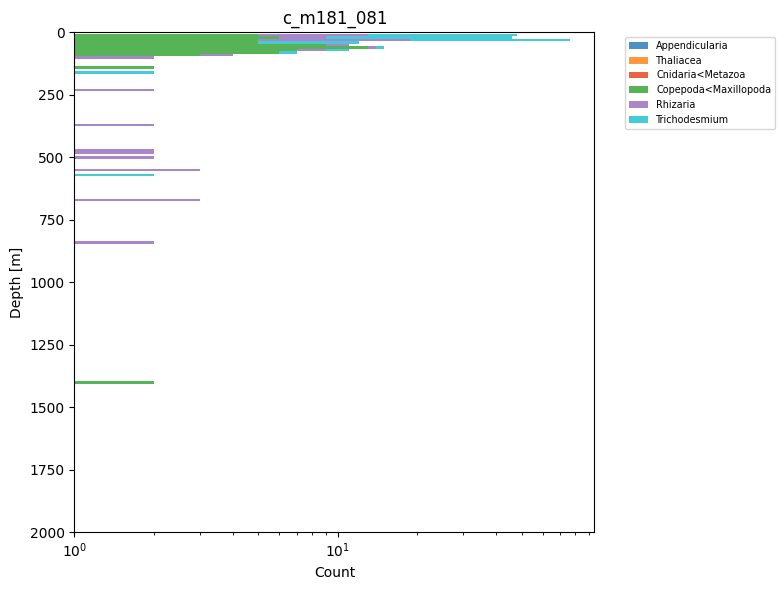

In [177]:
def plot_total_counts_vs_depth_stacked_individual_uvp5(df, depth_bin_size=10, max_depth=2000, plot_path=None):

    # Only keep validated objects
    df = df[df['object_annotation_status'] == 'validated'].copy()

    main_groups = [
        "Appendicularia", "Thaliacea",
        "Cnidaria<Metazoa", "Copepoda<Maxillopoda",
        "Rhizaria", "Trichodesmium"
    ]
    group_colors = [
        "#1f77b4", "#ff7f0e", "#e83c12", "#2ca02c", "#9467bd", "#17becf"
    ]
    color_dict = dict(zip(main_groups, group_colors))

    profiles = list(df['sample_id'].unique())

    for profile_name in profiles:
        profile_df = df[df['sample_id'] == profile_name].copy()
        profile_df['object_depth_min'] = pd.to_numeric(profile_df['object_depth_min'], errors='coerce')
        profile_df['object_depth_max'] = pd.to_numeric(profile_df['object_depth_max'], errors='coerce')
        profile_df = profile_df.dropna(subset=['object_depth_min', 'object_depth_max'])
        if not profile_df.empty:
            min_depth = profile_df['object_depth_min'].min()
            max_depth_actual = min(max_depth, profile_df['object_depth_max'].max())
            depth_bins = np.arange(min_depth, max_depth_actual + depth_bin_size, depth_bin_size)
            profile_df['depth_bin'] = np.digitize(profile_df['object_depth_min'], depth_bins)

            # Prepare stacked data for each group (already normalized)
            stacked_counts = []
            for group in main_groups:
                group_bin_count = profile_df[profile_df['object_annotation_category'] == group] \
                    .groupby('depth_bin').size().reindex(range(1, len(depth_bins)), fill_value=0)
                stacked_counts.append(group_bin_count.values)

            # Create a new figure for each profile
            fig, ax = plt.subplots(figsize=(8, 6))
            bottom = np.zeros(len(depth_bins)-1)
            for idx, group in enumerate(main_groups):
                values = stacked_counts[idx]
                ax.barh(depth_bins[1:], values, left=bottom, height=depth_bin_size*0.9,
                        color=color_dict[group], label=group, alpha=0.8)
                bottom += np.nan_to_num(values)

            ax.set_xscale('log')
            ax.invert_yaxis()
            ax.set_title(f"{profile_name[:18]}")
            ax.set_ylim(top=0, bottom=max_depth)
            ax.set_xlabel('Count')
            ax.set_ylabel('Depth [m]')
            ax.legend(fontsize='x-small', bbox_to_anchor=(1.05, 1), loc='upper left')

            plt.tight_layout()
            if plot_path:
                filename = f"counts_vs_depth_stacked_{profile_name[:18]}.png"
                plt.savefig(os.path.join(plot_path, filename), dpi=300, bbox_inches='tight')
            plt.show()
            plt.close()



plot_total_counts_vs_depth_stacked_individual_uvp5(uvp5_df, plot_path='/home/fanny/plots')

In [178]:
validated_counts = (
    uvp5_df[uvp5_df['object_annotation_status'] == 'validated']
    .groupby('object_annotation_category')
    .size()
    .reset_index(name='validated_count')
)
print(validated_counts)

   object_annotation_category  validated_count
0              Appendicularia                2
1                Chaetognatha               24
2            Cnidaria<Metazoa                9
3        Copepoda<Maxillopoda              573
4                   Crustacea               35
5                       Flota                1
6                    Rhizaria              721
7               Trichodesmium             2796
8                      bubble                1
9                    detritus                2
10             fiber<detritus                3
11              like<Copepoda               12
12               othertocheck              196
13                shrimp-like               12
14                       t002                1
15                       t003               14
16                       t006                3
17                       t008               24
18                       t009              177
19                       t010               10
20           

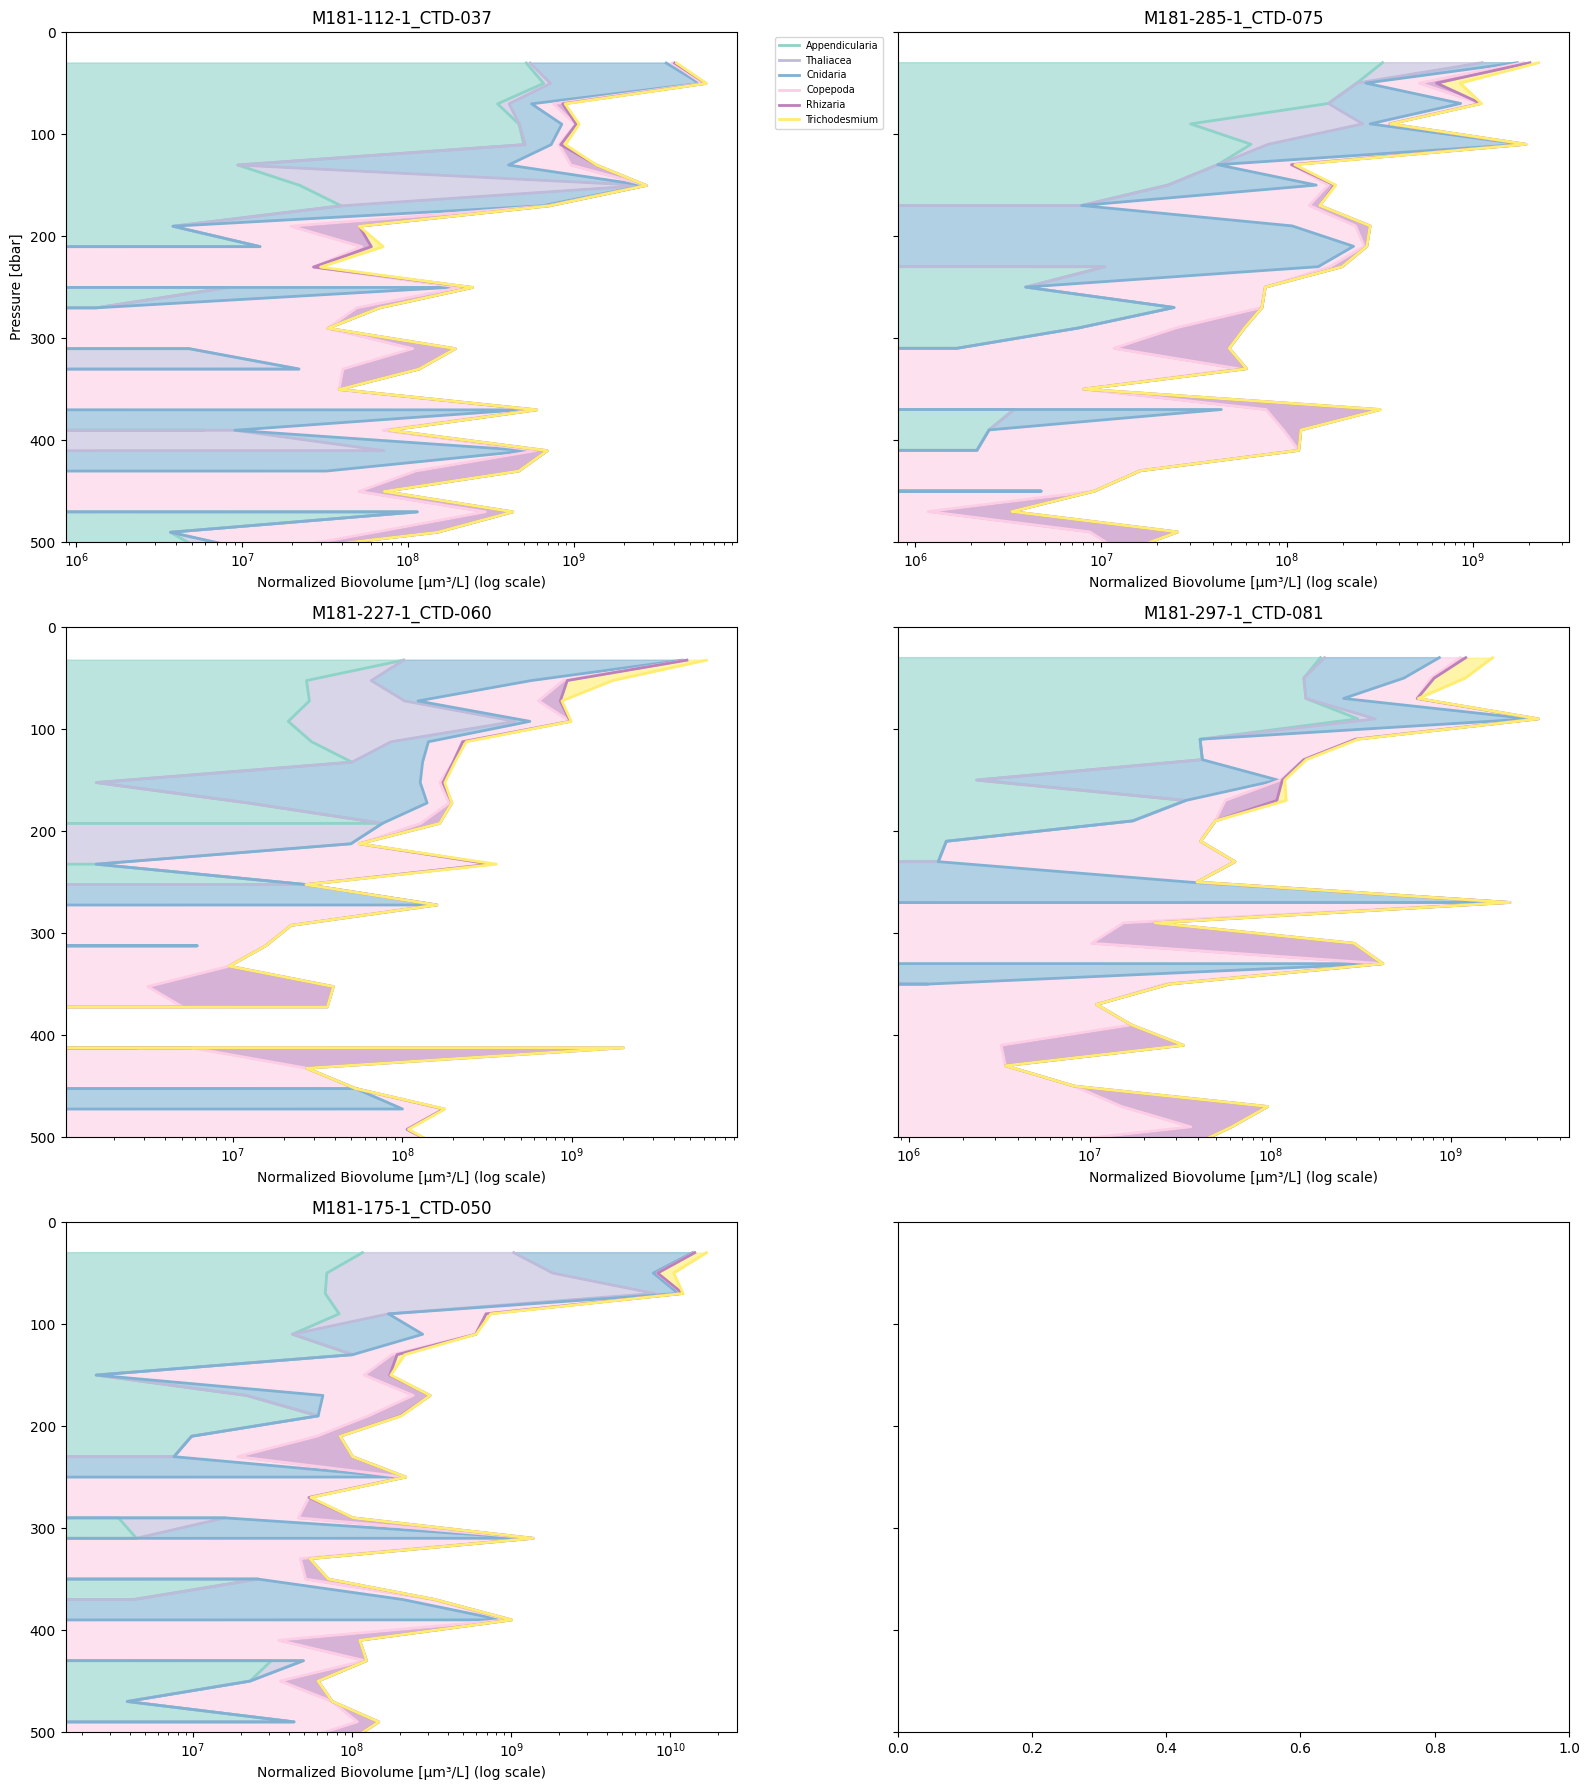

In [79]:
def plot_total_biovolume_vs_pressure_stacked_lines(df, all_images_df, depth_bin_size=5, max_depth=500, plot_path=None):
    import numpy as np
    import matplotlib.pyplot as plt

    main_groups = [
        "Appendicularia", "Thaliacea",
        "Cnidaria", "Copepoda",
        "Rhizaria", "Trichodesmium"
    ]
    colors = plt.cm.Set3(np.linspace(0, 1, len(main_groups)))
    color_dict = dict(zip(main_groups, colors))

    profiles = list(df['sample_id'].unique())
    n_profiles = len(profiles)
    n_cols = 2
    n_rows = int(np.ceil(n_profiles / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8*n_cols, 6*n_rows), sharey=True)
    axes = axes.flatten() if n_profiles > 1 else [axes]

    for j, profile_name in enumerate(profiles):
        profile_df = df[df['sample_id'] == profile_name].copy()
        profile_df['object_pressure'] = pd.to_numeric(profile_df['object_pressure'], errors='coerce')
        profile_df['object_esd'] = pd.to_numeric(profile_df['object_esd'], errors='coerce')
        profile_df = profile_df.dropna(subset=['object_pressure', 'object_esd'])
        if not profile_df.empty:
            if 'volume_um3' not in profile_df.columns:
                profile_df['volume_um3'] = (4/3) * np.pi * (profile_df['object_esd']/2)**3

            min_p = profile_df['object_pressure'].min()
            max_p = min(max_depth, profile_df['object_pressure'].max())
            pressure_bins = np.arange(min_p, max_p + depth_bin_size, depth_bin_size)
            profile_df['pressure_bin'] = np.digitize(profile_df['object_pressure'], pressure_bins)

            core_id = profile_name.split('_')[0] + '_' + profile_name.split('_')[1]
            images_for_profile = all_images_df[all_images_df['sample_id'] == core_id].copy()
            images_for_profile['pressure_bin'] = np.digitize(images_for_profile['pressure'], pressure_bins)
            images_per_bin = images_for_profile.groupby('pressure_bin').size().reindex(range(1, len(pressure_bins)), fill_value=0)
            sampled_volume_L = images_per_bin * VOLUME_PER_IMAGE_LITERS

            # Prepare stacked data for each group
            stacked_data = []
            for group in main_groups:
                group_bin_sum = profile_df[profile_df['object_annotation_category'] == group].groupby('pressure_bin')['volume_um3'].sum().reindex(range(1, len(pressure_bins)), fill_value=0)
                group_norm = group_bin_sum / sampled_volume_L.replace(0, np.nan)
                stacked_data.append(group_norm.values)

            ax = axes[j] if n_profiles > 1 else axes
            # Stacked area plot (lines + fill)
            bottom = np.zeros(len(pressure_bins)-1)
            for idx, group in enumerate(main_groups):
                values = stacked_data[idx]
                # Plot line
                ax.plot(values + bottom, pressure_bins[1:], color=color_dict[group], label=group, linewidth=2)
                # Fill area
                ax.fill_betweenx(pressure_bins[1:], bottom, bottom + values, color=color_dict[group], alpha=0.6)
                bottom += np.nan_to_num(values)

            ax.set_xscale('log')  # Logarithmic scale for biovolume
            ax.invert_yaxis()
            ax.set_title(f"{profile_name[:18]}")
            ax.set_ylim(top=0, bottom=max_depth)
            ax.set_xlabel('Normalized Biovolume [μm³/L] (log scale)')
            if j == 0:
                ax.set_ylabel('Pressure [dbar]')
            if j == 0:
                ax.legend(fontsize='x-small', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    if plot_path:
        plt.savefig(os.path.join(plot_path, 'total_biovolume_vs_pressure_stacked_lines_multi_panel.png'), dpi=300, bbox_inches='tight')
    plt.show()

# Usage:
plot_total_biovolume_vs_pressure_stacked_lines(
    top6_validated_df, all_images_df,
    depth_bin_size=20, max_depth=500,
    plot_path='/home/fanny/plots'
)